In [ ]:
# FIGURES FOR Sunburned plankton: Ultraviolet radiation inhibition of phytoplankton photosynthesis in the Community Earth System Model version 2
# J COUPE - FOR QUERIES CONTACT COUPEWX@GMAIL.COM

In [1]:
# FIGURE 1
# import statements
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # set dpi to 300, which is minimum required for GMD submission


In [6]:
#Figure 1}. BWFs showing the biological efficiency for damage to phytoplankton photosynthesis by ultraviolet (UV) light as a function of wavelength. 
#Depicted here are diatoms (Cullen et al., 1992), coccolithophores (Lorenzo et al, 2019), small phytoplankton and diazotrophs (Neale and Thomas, 2017).

file={}
file['diatom_damage']='/glade/work/jcoupe/misc_files/phaeo_dataextended.bio' # this file can be found on GLADE file systems or in Zenodo as "phaeo_dataextended.bio"

dataset=[]
dataset_dino=[]

num_ind = -6 #index for number
band1_ind=-5 #index for start of wavelength band
band2_ind=-4 #index for end of wavelength band
Einh_ind=-1 #index for epsilon

# These are lists that will store all of the information in the plain text file

indices=[] # indices used by the model for # of wavelength band 
band1=[] # the beginning of the wavelength band
band2=[] # the end of the wavelength band
midpoint_band12=[] # we are going to calculate the midpoint of the wavelength band for easy plotting
Einh=[] # the actual damage function for the wavelengths between band1 and band2

# Using an equation for small phytoplankton and coccolithophores

Einh_neale_thomas = [] # creating a new list for Neale and Thomas (2017)
midpoint_band12_neale_thomas=np.linspace(280,400,100) # going to construct our own spectral band here, valid from 290 nm to 400 nm with 100 intervals
for wavelength in midpoint_band12_neale_thomas: # this for loop goes through all the wavelengths in midpoint_band12_neale_thomas
    Einh_neale_thomas.append(-3.10572006e-15 *wavelength**6 + 6.2728452e-12 *wavelength**5 - 5.22236845e-09*wavelength**4 + 2.28848111e-06*wavelength**3 - 0.000554843743*wavelength**2 + 0.0702209062*wavelength - 3.59639531)

Einh_lorenzo_UVB = [] 
midpoint_band12_lorenzo_UVB=np.linspace(280,320,100)
for wavelength in midpoint_band12_lorenzo_UVB:
        Einh_lorenzo_UVB.append(-1.40530706e-12*wavelength**6 + 2.39353416e-09*wavelength**5 - 1.68928198e-06*wavelength**4 + 6.31865068e-04*wavelength**3 - 1.31975456e-01*wavelength**2 + 1.45753274e+01*wavelength - 6.63797953e+02)

Einh_lorenzo_UVA = [] 
midpoint_band12_lorenzo_UVA=np.linspace(320,400,100)
for wavelength in midpoint_band12_lorenzo_UVA:
        Einh_lorenzo_UVA.append(8.89581784e-15*wavelength**6 - 1.93953328e-11*wavelength**5 + 1.76199028e-08*wavelength**4 - 8.53798419e-06*wavelength**3 + 2.32766669e-03*wavelength**2 - 3.38550975e-01*wavelength + 2.05261692e+01)

# The below block of code reads in the file as if it is a csv file

with open(file['diatom_damage'], newline='') as csvfile:
    datareader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in datareader:
        dataset.append(row)
        indices.append(int(row[num_ind]))
        band1.append(float(row[band1_ind]))
        band2.append(float(row[band2_ind]))
        midpoint_band12.append(np.mean([float(row[band1_ind]),float(row[band2_ind])])) # calculates the mean wavelength
        Einh.append(float(row[Einh_ind]))


# And this code just reads in the csv file

#midpoint_band12_lorenzo,Einh_lorenzo=np.loadtxt('Lorenzo/Data_from_WebPlotDigitizer_lorenzo.csv', delimiter=',',unpack=True)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


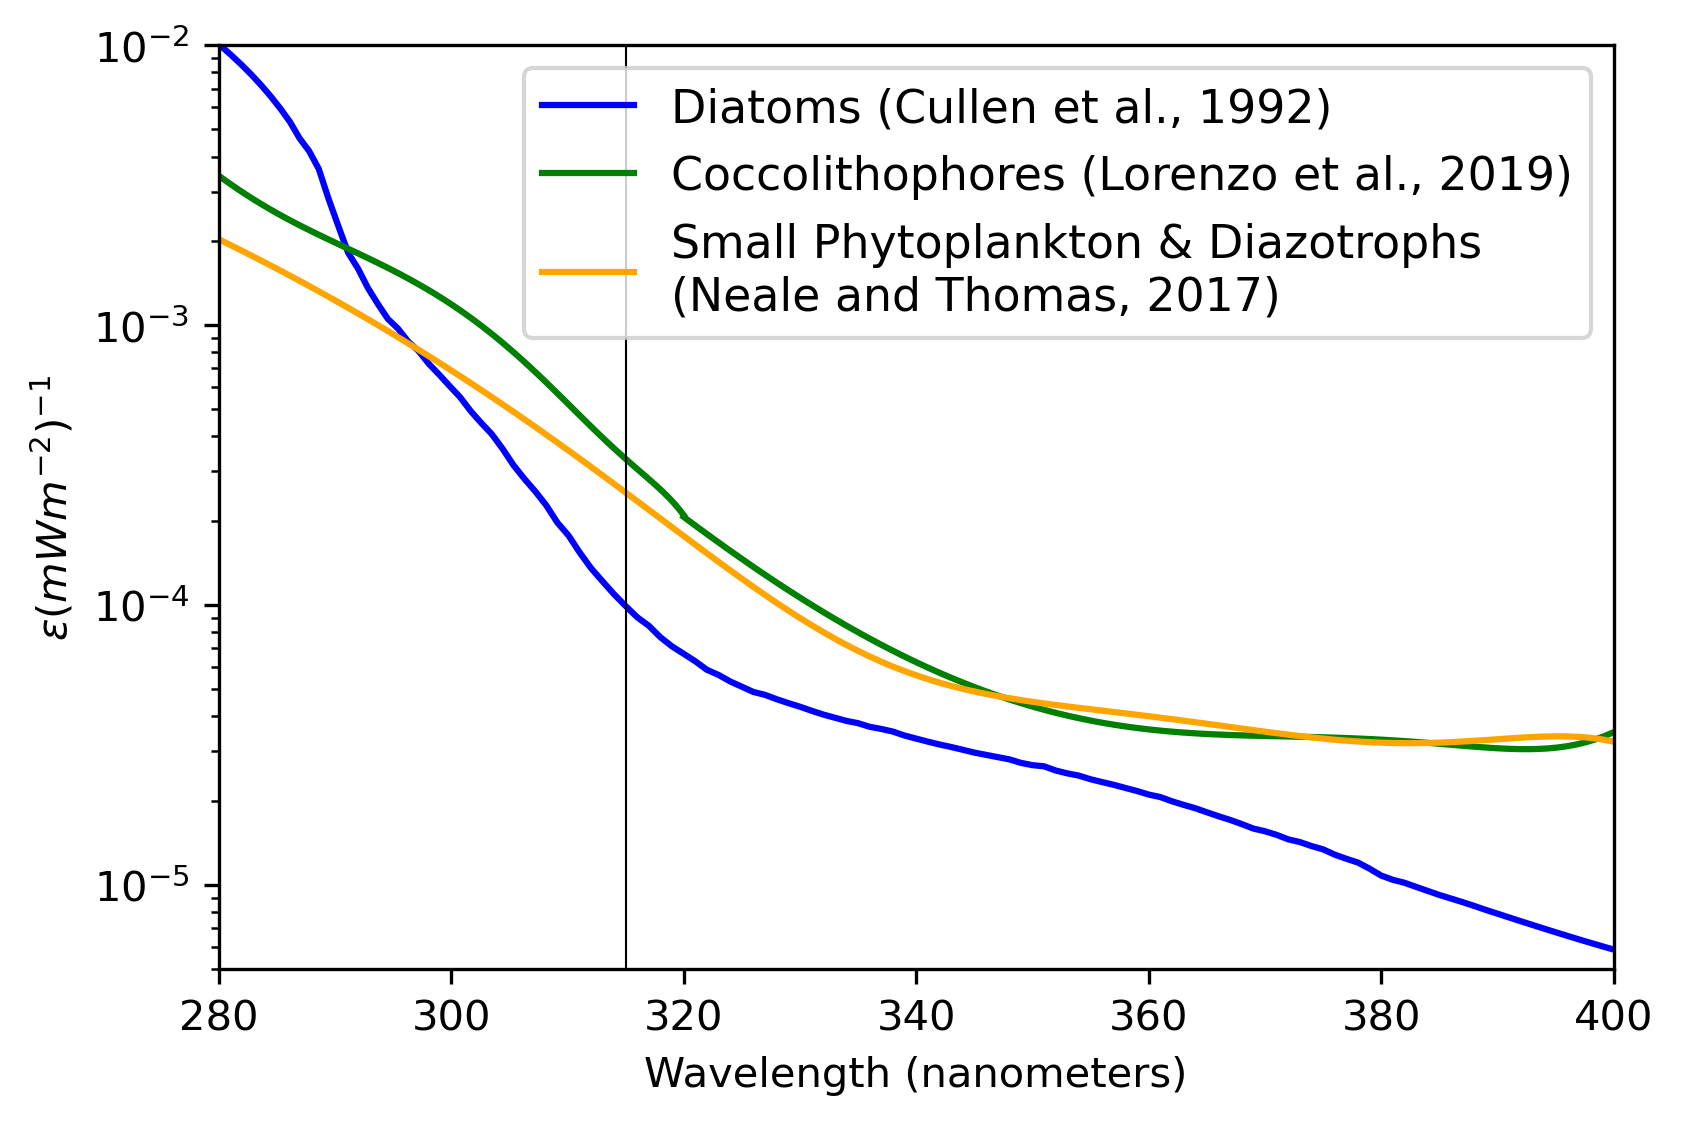

In [7]:
# Let's make some plots (Figure 1)
plt.figure(figsize=[6,4])
plt.plot(midpoint_band12,Einh,color='blue',label='Diatoms (Cullen et al., 1992)')
plt.plot(midpoint_band12_lorenzo_UVB,Einh_lorenzo_UVB,color='green',label='Coccolithophores (Lorenzo et al., 2019)')
plt.plot(midpoint_band12_lorenzo_UVA,Einh_lorenzo_UVA,color='green')
plt.plot(midpoint_band12_neale_thomas,Einh_neale_thomas,color='orange',label='Small Phytoplankton & Diazotrophs\n(Neale and Thomas, 2017)')
#plt.plot(midpoint_band12_lorenzo,Einh_lorenzo,color='red',label='Coccolithophores (Lorenzo et al. (2019))')
plt.yscale("log")
plt.xlim([280,400])
plt.ylim([5e-6,1e-2])
plt.xlabel('Wavelength (nanometers)')
plt.ylabel('$\epsilon (mW m^{-2})^{-1}$')#E*_{inh}$')
plt.axvline(x = 315, linewidth = 0.5, color = 'k')
#plt.title('Biological Weighting Functions for Phytoplankton in CESM2-MARBL')
plt.legend(loc='best', fontsize="11");
plt.savefig('GMD24_figs/Figure1.png') # This will save the figure in a folder called GMD24_figs (as a png)
plt.savefig('GMD24_figs/Figure1.eps')
plt.show()

In [8]:
# Figure 2 (a) Global monthly NPP (Pg C $yr^{-1}$) for $E*_{inh}=0$, $E*_{inh}$=PI radiation, and $E*_{inh}$=20x PI radiation simulations and 
# (b) and relative contribution of each PFT 



import glob as glob
import os
from collections import OrderedDict
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *; 
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


# Step 1: outline cases and get files - note that these paths are on cheyenne - no need to move things around just yet 
PICPOC_scaling = True
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0' #PICPOC does not matter
if PICPOC_scaling:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI' # Einh = 20x PI radiation
else:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'  
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI' # Einh = 20x PI radiation
    
CASES=[EINHPI_DATM_CNL_4P2Z,EINH0X_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/' # Note this is a temporary location for output files - this will be moved to 
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]



In [22]:
files_h0

{'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI': ['/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0002-01.nc',
  '/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0002-02.nc',
  '/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0002-03.nc',
  '/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0002-04.nc',
  '/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0002-05.nc',
  '/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4

In [9]:
# calculate NPP
extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)

#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
scale_factor=1e-3*12*1e-15*86400*365*1e-2
data={}
for case in CASES:
    var='photoC_TOT_zint'
    data[case]={}
    print(case)
    for var in ['photoC_TOT_zint','photoC_diat_zint','photoC_sp_zint','photoC_diaz_zint','photoC_cocco_zint']:
        data[case][var]=[]
        for fi in files_h0[case]:
            extract = nc4.Dataset(fi,'r')
            tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            for t in range(len(tempdata)):
                data[case][var].append(tempdata[t])

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI


In [10]:

def percent_anomaly(data,control):
   control_climo = np.nanmean(separate_by_month_arrays(control),axis=1)
   monthly_data = separate_by_month_arrays(data)
   percent_anom = []
   for yr in range(np.shape(monthly_data)[1]):
        for mo in range(np.shape(monthly_data)[0]):
          percent_anom.append( 100*(monthly_data[mo][yr] - control_climo[mo]) * (control_climo[mo]**-1))
   return percent_anom
    
def separate_by_month_arrays(dataset):
	k=0
	jan=[];feb=[];march=[];apr=[];may=[];jun=[];july=[];aug=[];sep=[];oc=[];nov=[];dec=[];
	while k <= (len(dataset)-12):
		jan.append((dataset[k]))
		feb.append((dataset[k+1]))
		march.append((dataset[k+2]))
		apr.append((dataset[k+3]))
		may.append((dataset[k+4]))
		jun.append((dataset[k+5]))
		july.append((dataset[k+6]))
		aug.append((dataset[k+7]))
		sep.append((dataset[k+8]))
		oc.append((dataset[k+9]))
		nov.append((dataset[k+10]))
		dec.append((dataset[k+11]))
		k = k+12;
	return [jan,feb,march,apr,may,jun,july,aug,sep,oc,nov,dec]

def monthly_anomaly(data,data_control,type='standard',NANDATA = False):
    monthly_data = separate_by_month_arrays(data)
    monthly_data_control = np.nanmean(separate_by_month_arrays(data_control),axis=1)
    new_data=[]
    if type == 'percent':
        return percent_anomaly(data,data_control)
    if type == 'standard':
        for yr in range(int(len(data)/12.0)):
            for mo in range(12):
                new_data.append(monthly_data[mo][yr] - monthly_data_control[mo])
        return new_data
    if type == 'sd':
        mdc_std = np.nanstd(separate_by_month_arrays(data_control),axis=1)
        for yr in range(int(len(data)/12.0)):
    	    for mo in range(12):
	          new_data.append( (monthly_data[mo][yr] - monthly_data_control[mo]) *(mdc_std[mo]**-1))
        return new_data



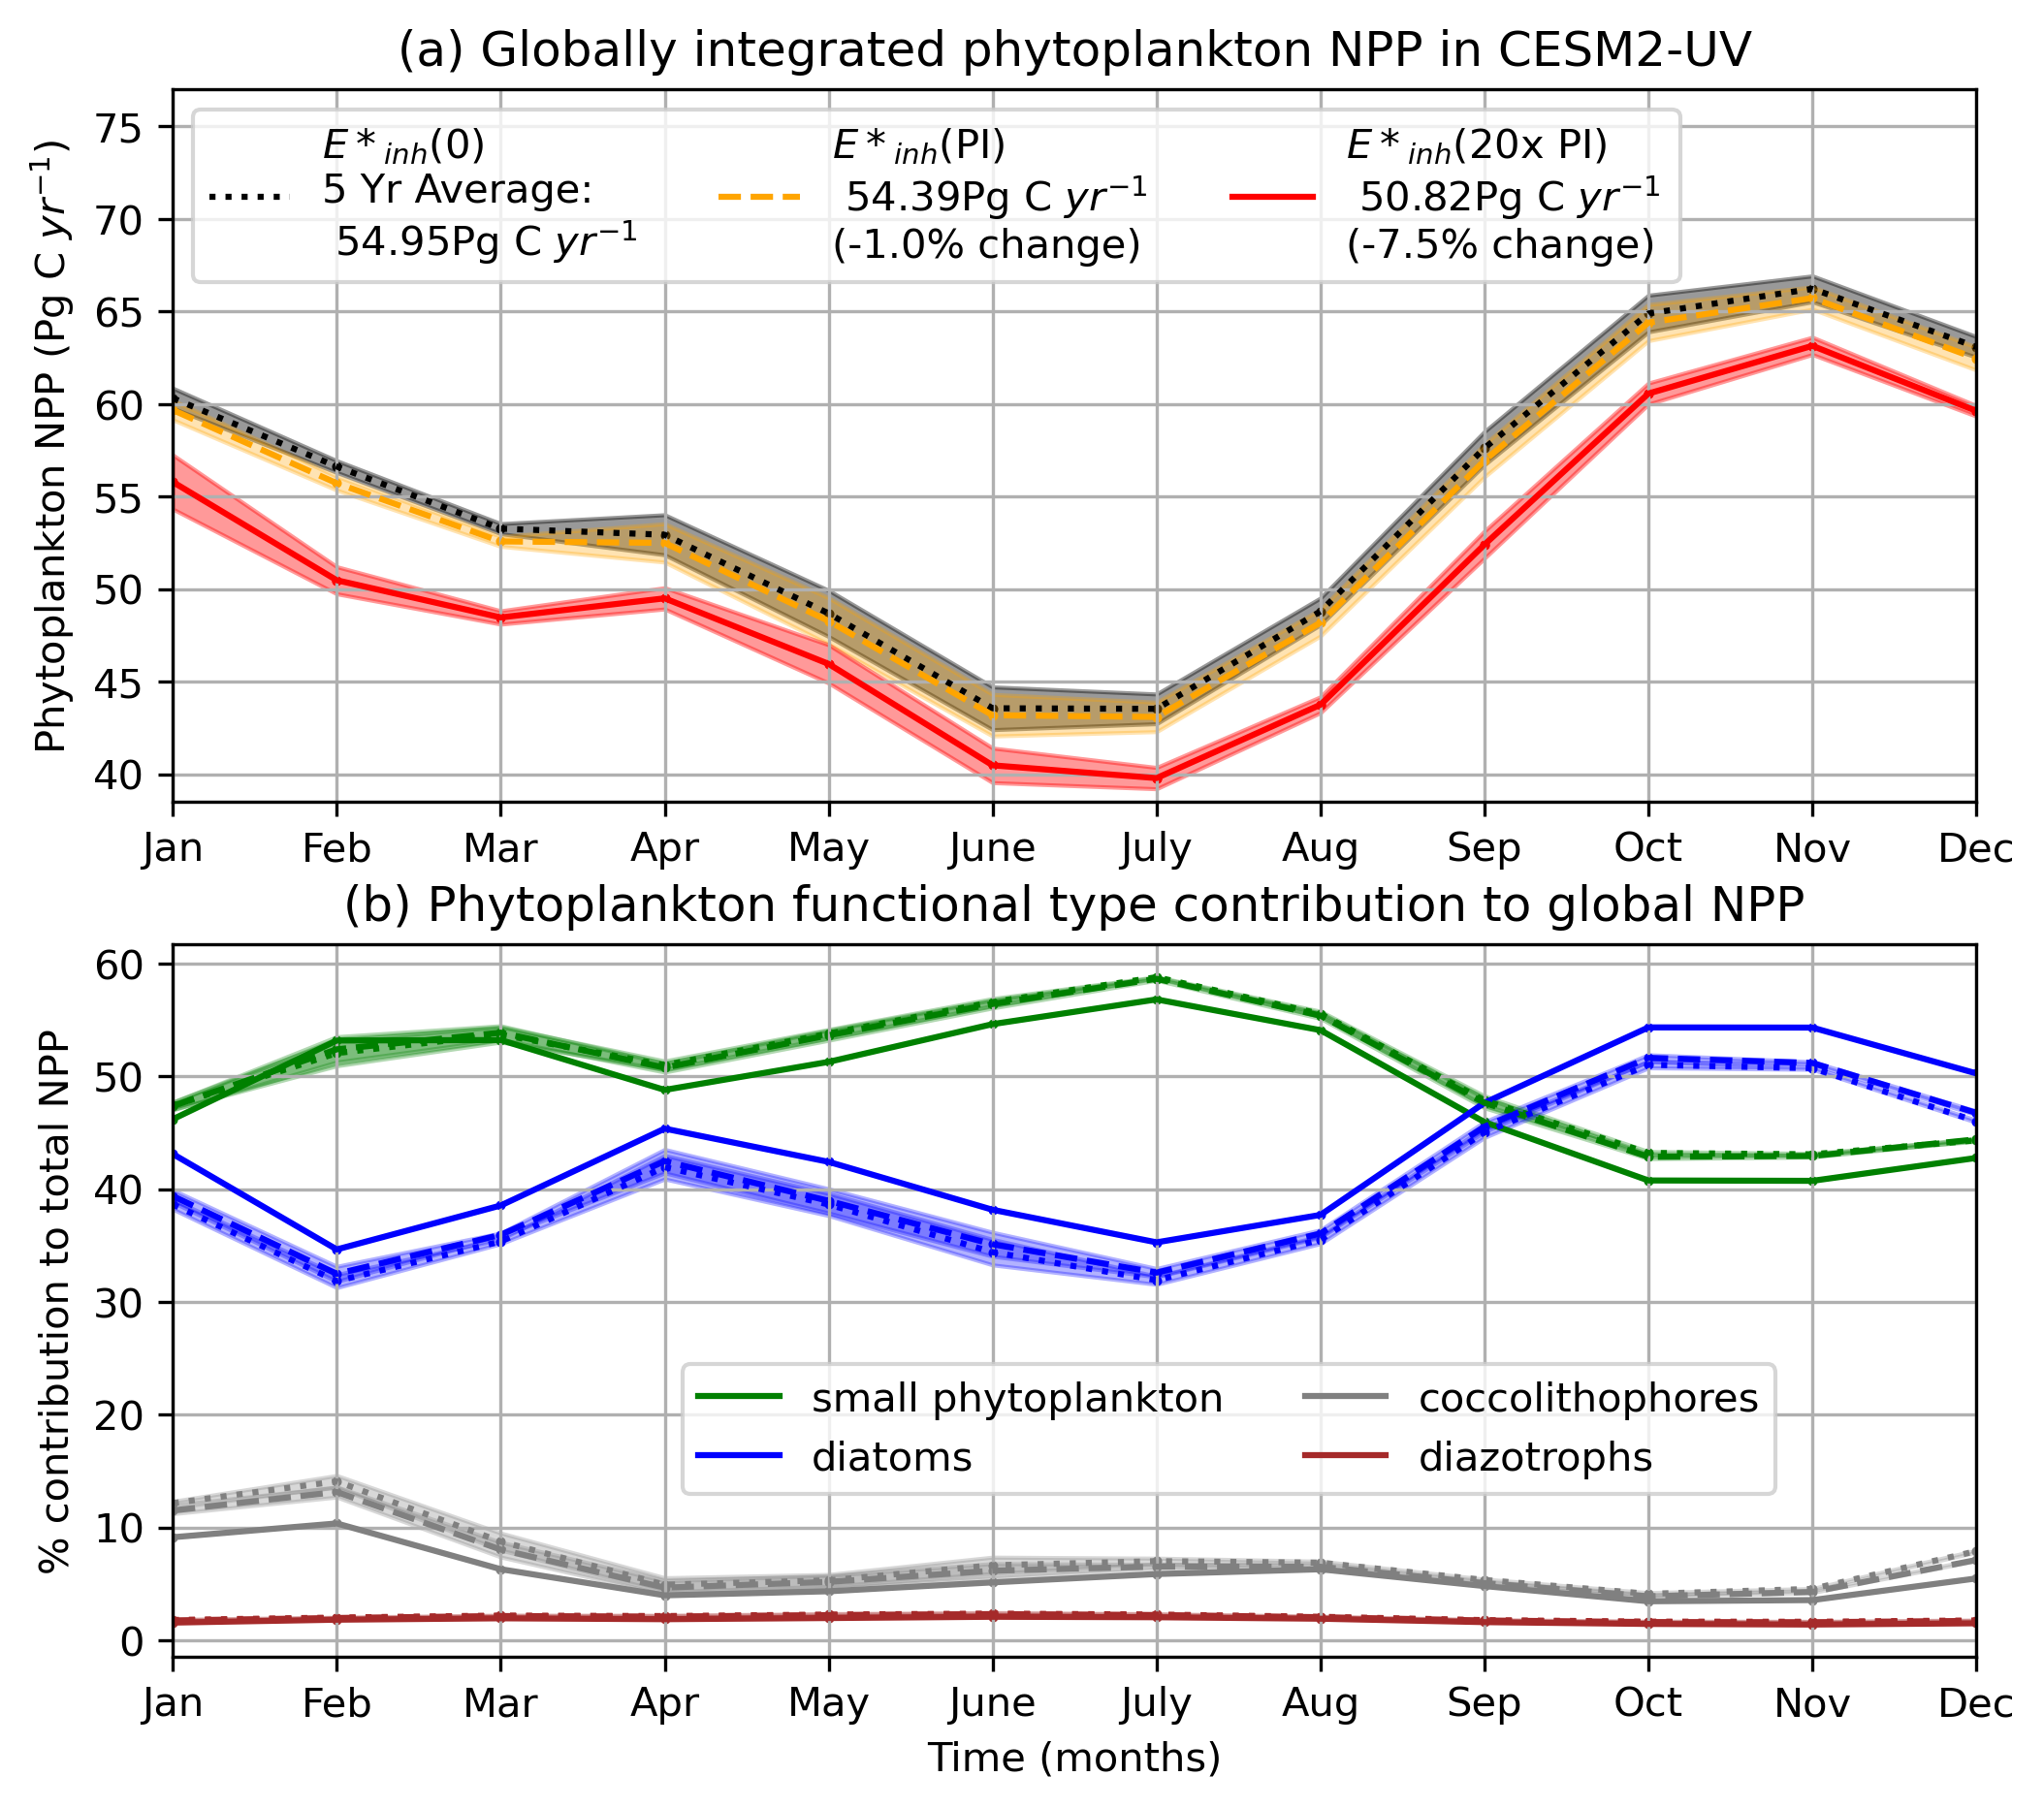

In [11]:
time_factor = 1
if True:
    plt.figure(figsize=[8,7])
    plt.subplot(2,1,1)
    case=EINH0X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(0)'; case_color='k'
    plot_data=data[case]['photoC_TOT_zint']# + data[case]['photoC_TOT_zint']
    
    CLIMO_MEAN = separate_by_month_arrays(plot_data) # output is 12 x 5 years 
    CLIMO_STD = np.nanstd(CLIMO_MEAN,axis=1) # 
    CLIMO_MEAN = np.nanmean(CLIMO_MEAN,axis=1) 
    plot_data = CLIMO_MEAN
    
    ts=np.linspace(1,len(plot_data),len(plot_data))*time_factor; 
    plt.scatter(ts,plot_data,color=case_color,s=2)
    ann_mean=np.nanmean(plot_data[:])
    BASELINE = ann_mean # 5 year mean 

    plt.plot(ts,plot_data,case_color,linestyle='dotted',label=case_label+'\n5 Yr Average: \n '+str(BASELINE)[0:5]+'Pg C $yr^{-1}$') 
    TOP = CLIMO_MEAN + CLIMO_STD
    BOTTOM = CLIMO_MEAN - CLIMO_STD
    plt.fill_between(ts,TOP,BOTTOM,alpha=0.4, color='k')#,label='+/- 1 standard deviation')
    
    case=EINHPI_DATM_CNL_4P2Z; case_label='$E*_{inh}$(PI)'; case_color='orange'
    plot_data=data[case]['photoC_TOT_zint']
    
    CLIMO_MEAN = separate_by_month_arrays(plot_data) # output is 12 x 5 years 
    CLIMO_STD = np.nanstd(CLIMO_MEAN,axis=1) # 
    CLIMO_MEAN = np.nanmean(CLIMO_MEAN,axis=1) # annual mean 
    plot_data = CLIMO_MEAN
    
    ts=np.linspace(1,len(plot_data),len(plot_data))*time_factor; 
    plt.scatter(ts,plot_data,color=case_color,s=2)
    ann_mean=np.nanmean(plot_data[:])
    
    pct_change = ann_mean - BASELINE
    pct_change = str(pct_change * (BASELINE**-1)*100)[0:4]
   
    plt.plot(ts,plot_data,case_color,linestyle='--',label=case_label+'\n '+str(ann_mean)[0:5]+'Pg C $yr^{-1}$ \n('+pct_change+'% change)')# \n Yr2 '+str(ann_mean_yr2)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr2+'%)'+'\n Yr3 '+str(ann_mean_yr3)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr3+'%) \n Yr4 '+str(ann_mean_yr4)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr4+'%) \n Yr5 '+str(ann_mean_yr5)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr5+'%)' )
    TOP = CLIMO_MEAN + CLIMO_STD
    BOTTOM = CLIMO_MEAN - CLIMO_STD
    plt.fill_between(ts,TOP,BOTTOM,alpha=0.3, color='orange')
    
    case=EINH20X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(20x PI)'; case_color='red'
    plot_data=data[case]['photoC_TOT_zint']
    
    CLIMO_MEAN = separate_by_month_arrays(plot_data) # output is 12 x 5 years 
    CLIMO_STD = np.nanstd(CLIMO_MEAN,axis=1) # 
    CLIMO_MEAN = np.nanmean(CLIMO_MEAN,axis=1) # annual mean 
    plot_data = CLIMO_MEAN
    
    ts=np.linspace(1,len(plot_data),len(plot_data))*time_factor; 
    plt.scatter(ts,plot_data,color=case_color,s=2)
    ann_mean=np.nanmean(plot_data[:])
    pct_change = ann_mean - BASELINE
    pct_change = str(pct_change * (BASELINE**-1)*100)[0:4]
    
    plt.scatter(ts,plot_data,color=case_color,s=2)
    plt.plot(ts,plot_data,case_color,linestyle='-',label=case_label+'\n '+str(ann_mean)[0:5]+'Pg C $yr^{-1}$ \n('+pct_change+'% change)')# \n Yr2 '+str(ann_mean_yr2)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr2+'%) \n Yr3 '+str(ann_mean_yr3)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr3+'%) \n Yr4 '+str(ann_mean_yr4)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr4+'%)\n Yr5 '+str(ann_mean_yr5)[0:5]+'Pg C $yr^{-1}$ ('+pct_change_yr5+'%)' )
    TOP = CLIMO_MEAN + CLIMO_STD
    BOTTOM = CLIMO_MEAN - CLIMO_STD
    plt.fill_between(ts,TOP,BOTTOM,alpha=0.4, color='red')
    if True:
        plt.title('(a) Globally integrated phytoplankton NPP in CESM2-UV'); 
    plt.ylabel('Phytoplankton NPP (Pg C $yr^{-1}$)')
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
    plt.grid(); plt.ylim([38.5,77]); plt.xlim([1,12])
    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'))
    plt.legend(loc='upper left',ncol=3,fontsize=10); 
    #plt.xlabel('Time (months)')


    
    plt.subplot(2,1,2)
    plt.grid()
    plot_data={} 
    CLIMO_STD={}
    case_labels={}; case_colors={}
    case_labels['photoC_sp_zint']='small phytoplankton'; case_colors['photoC_sp_zint']='g'
    case_labels['photoC_diat_zint']='diatoms'; case_colors['photoC_diat_zint']='b'
    case_labels['photoC_cocco_zint']='coccolithophores'; case_colors['photoC_cocco_zint']='grey'
    case_labels['photoC_diaz_zint']='diazotrophs'; case_colors['photoC_diaz_zint']='brown'
    for case in [EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]:
        plot_data[case]={}
        CLIMO_STD[case]={}
        #CLIMO_MEAN_NPP = separate_by_month_arrays(data[case]['photoC_TOT_zint'])
        #CLIMO_MEAN_NPP = np.nanmean(CLIMO_MEAN_NPP,axis=1) # take annual average
        for var in ['photoC_sp_zint','photoC_diat_zint','photoC_cocco_zint','photoC_diaz_zint']:
            plot_data[case][var] = data[case][var] * np.array(data[case]['photoC_TOT_zint'])**-1 * 100
            CLIMO_MEAN_VAR = separate_by_month_arrays(plot_data[case][var])
            CLIMO_STD[case][var] = np.nanstd(CLIMO_MEAN_VAR,axis=1) # annual standard deviation
            CLIMO_MEAN_VAR = np.nanmean(CLIMO_MEAN_VAR,axis=1)
            plot_data[case][var] = CLIMO_MEAN_VAR
            #plot_data[case][var] = data[case][var] * np.array(data[case]['photoC_TOT_zint'])**-1 * 100
            #plot_data[case][var] = CLIMO_MEAN_VAR * np.array(CLIMO_MEAN_NPP)**-1 * 100

    case = EINH20X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(20x PI)'; linestyle='-'
    for var in ['photoC_sp_zint','photoC_diat_zint','photoC_cocco_zint','photoC_diaz_zint']:
        plot_data2 = plot_data[case][var]
        ts=np.linspace(1,len(plot_data2),len(plot_data2)); 
        plt.scatter(ts,plot_data2,color=case_colors[var],s=2)
        plt.plot(ts,plot_data2,case_colors[var],linestyle=linestyle,label=case_labels[var])
    case = EINHPI_DATM_CNL_4P2Z; case_label='$E*_{inh}$(PI)'; linestyle='--'
    for var in ['photoC_sp_zint','photoC_diat_zint','photoC_cocco_zint','photoC_diaz_zint']:
        plot_data2 = plot_data[case][var]
        ts=np.linspace(1,len(plot_data2),len(plot_data2)); 
        plt.scatter(ts,plot_data2,color=case_colors[var],s=2)
        plt.plot(ts,plot_data2,case_colors[var],linestyle=linestyle)#,label=case_labels[var])
        TOP = plot_data2 + CLIMO_STD[case][var]
        BOTTOM = plot_data2 - CLIMO_STD[case][var]
        plt.fill_between(ts,TOP,BOTTOM,alpha=0.3,color=case_colors[var])
    case = EINH0X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(0)'; linestyle='dotted'
    for var in ['photoC_sp_zint','photoC_diat_zint','photoC_cocco_zint','photoC_diaz_zint']:
        plot_data2 = plot_data[case][var]
        ts=np.linspace(1,len(plot_data2),len(plot_data2)); 
        plt.scatter(ts,plot_data2,color=case_colors[var],s=2)
        plt.plot(ts,plot_data2,case_colors[var],linestyle=linestyle)#,label=case_labels[var])
        TOP = plot_data2 + CLIMO_STD[case][var]
        BOTTOM = plot_data2 - CLIMO_STD[case][var]
        plt.fill_between(ts,TOP,BOTTOM,alpha=0.3,color=case_colors[var])
    plt.title('(b) Phytoplankton functional type contribution to global NPP'); 
    plt.ylabel('% contribution to total NPP')
    #plt.text(3,8.5,'Solid = $E*_{inh}$(20x PI); Dashed = $E*_{inh}$(PI) = ; Dotted = $E*_{inh}$(0)')
    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12')); 
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'))
    plt.xlim([1,12])
    plt.xlabel('Time (months)'); 
    plt.legend(loc='lower right',ncol=2,bbox_to_anchor=(0.9,0.2))
    plt.savefig('GMD24_figs/Figure2.eps')
    plt.savefig('GMD24_figs/Figure2.png')
    plt.show()

In [ ]:
# figure3: map of E*inh and map of global average E*inh through time for all PFTs 


In [12]:


import glob as glob
import os
from collections import OrderedDict
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *; 
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300



def pop_add_cyclic(ds): # pass an xarray object into this
    nj = ds.TLAT.shape[0] # size of POP grid
    ni = ds.TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        print('\n')
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        print('\n')
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})
    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)
    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})     
    return dso





In [13]:

# Step 1: outline cases and get files - note that these paths are on cheyenne - no need to move things around just yet 


PICPOC_scaling = True
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0' #PICPOC does not matter
if PICPOC_scaling:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI' # Einh = 20x PI radiation
else:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'  
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI' # Einh = 20x PI radiation
    
CASES=[EINHPI_DATM_CNL_4P2Z,EINH0X_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[0:12]

PICPOC_scaling = True
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0' #PICPOC does not matter
if PICPOC_scaling:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI' # Einh = 20x PI radiation
else:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'  
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI' # Einh = 20x PI radiation
    
CASES=[EINHPI_DATM_CNL_4P2Z,EINH0X_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]


In [14]:
monthly_data={}
monthly_data_lev={}
monthly_times={}

for case in CASES:
    monthly_data[case]={}
    monthly_data_lev[case]={}
    monthly_times[case]={}

In [15]:
# globally integrated NPP
extract = nc4.Dataset(files_h0[EINHPI_DATM_CNL_4P2Z][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)

#for case in cases:
for case in CASES:
    for var in ['ATM_EPHYTO1_NET','ATM_EPHYTO4_NET','ATM_EPHYTO5_NET']:#='photoC_TOT_zint'
        monthly_data[case][var]=[]
        print(case)
        print(files_h0[case][-1])
        for fi in files_h0[case]:
            extract = nc4.Dataset(fi,'r')
            ICE = extract.variables['IFRAC'][0]
            if var == 'PAR_avg':
                monthly_data[case][var].append(np.average(extract.variables[var][0,0],weights=TAREA))
            else:
                EINH=extract.variables[var][0]
                TAREA_ice = extract.variables['TAREA'][:]
                TAREA_ice[ICE>0.1]=0.0
                monthly_data[case][var].append(np.average(EINH,weights=TAREA)) # change TAREA: remove all grid cells where ICE is too big 


CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0006-12.nc
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0006-12.nc
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI.pop.h.0006-12.nc
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0.pop.h.0006-12.nc
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
/glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0/ocn/hist/CESM214_tuvcpl_datm_marbl4p2z_

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI ATM_EPHYTO1_NET 6.105094676867073
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI ATM_EPHYTO1_NET 0.3052633978746771
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI ATM_EPHYTO4_NET 14.107502748166842
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI ATM_EPHYTO4_NET 0.7053959050277963
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI ATM_EPHYTO5_NET 14.750517111962752
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI ATM_EPHYTO5_NET 0.7375465957535495


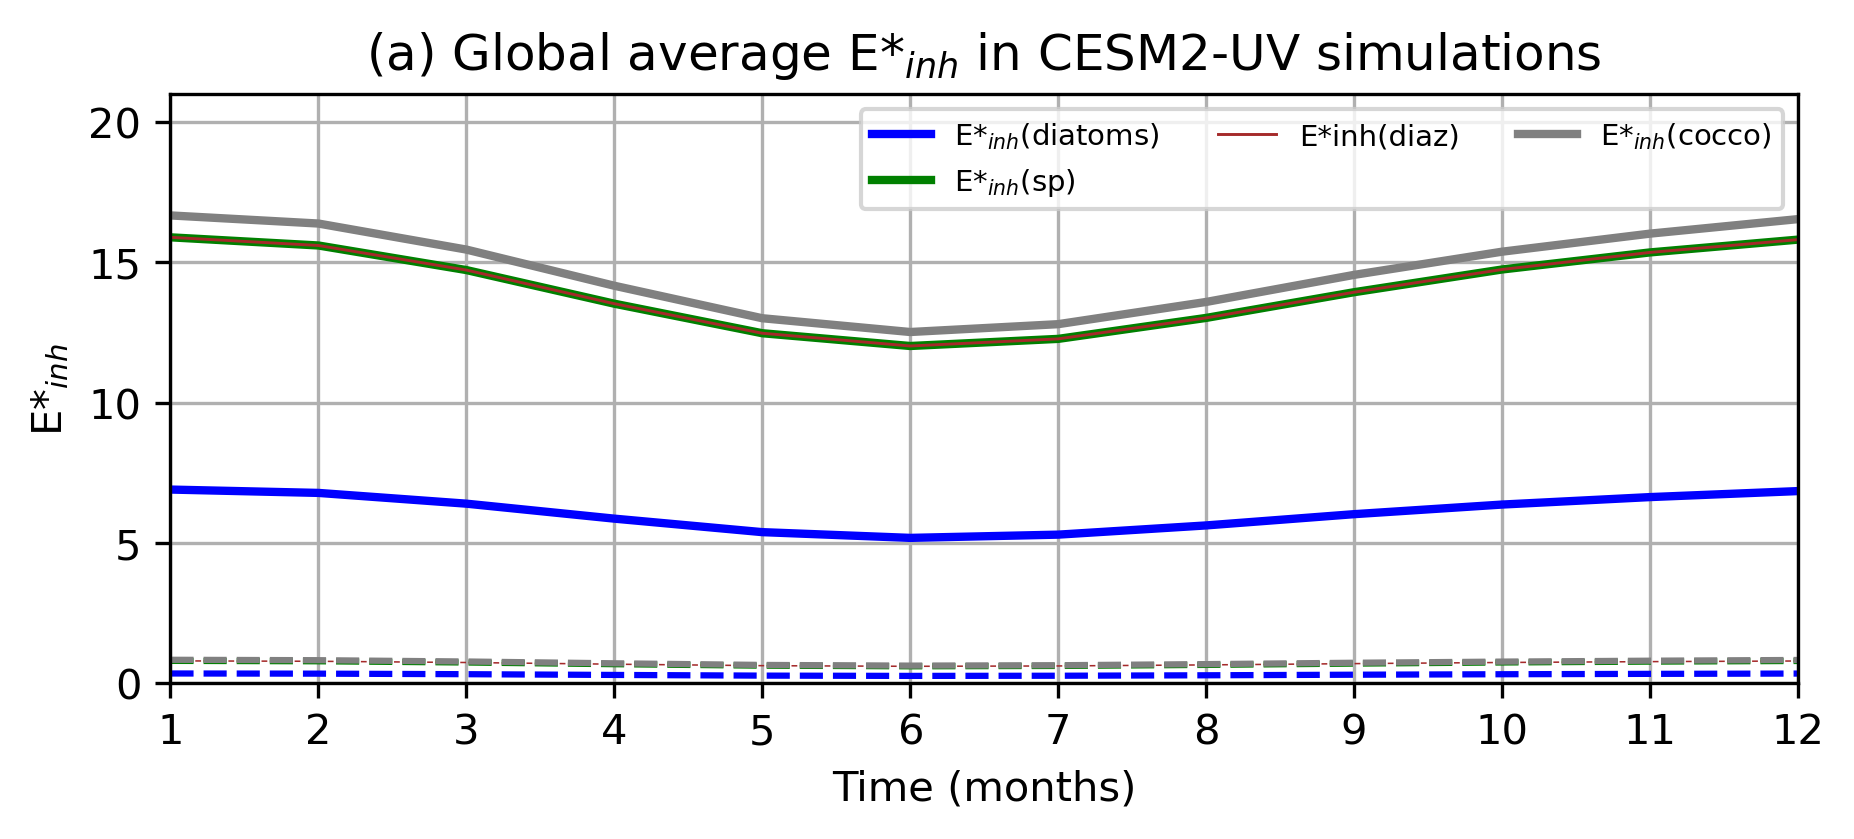

In [20]:

# ATM_EPHYTO1: Diatoms
# ATM_EPHYTO4: sp & diaz
# ATM_EPHYTO5: cocco
var_label={}; var_color={}
var='ATM_EPHYTO1_NET'; var_label[var] = 'E*$_{inh}$(diatoms)'; var_color[var]='blue'
var='ATM_EPHYTO4_NET'; var_label[var] = 'E*$_{inh}$(sp)'; var_color[var]='green' # green AND red !!
var='ATM_EPHYTO5_NET'; var_label[var] = 'E*$_{inh}$(cocco)'; var_color[var]='grey'
EINH_CASES=[EINH20X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z]
plt.figure(figsize=[7,2.55])  
for var in ['ATM_EPHYTO1_NET','ATM_EPHYTO4_NET','ATM_EPHYTO5_NET']:
    for case in EINH_CASES:
        scale=1
        plot_data = monthly_data[case][var]
        print(case,var, np.nanmean(plot_data))
        ann_mean=np.nanmean(plot_data[0:12]); 
        ts=np.linspace(1,len(plot_data[:]),len(plot_data)); #print(len(ts))
        #plt.scatter(ts,plot_data[:],s=0.5,color='k')
        scale=2
        if case==EINH20X_DATM_CNL_4P2Z:
            case_label=var_label[var]#+' in 20x PI'#+'\n Last 6 months: \n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; #case_color='yellow'
            linestyle='solid'; 
            plt.plot(ts,plot_data,label=case_label,linewidth=1*scale,linestyle=linestyle,color=var_color[var]); 
            if var == 'ATM_EPHYTO4_NET':
                plt.plot(ts,plot_data,label='E*inh(diaz)',linewidth=1*scale*0.35,linestyle=linestyle,color='brown');
        else:
            scale=1.5
            case_label=var_label[var]+' in PI'
            linestyle='--'
            plt.plot(ts,plot_data,linewidth=1*scale,linestyle=linestyle,color=var_color[var]); 
            if var == 'ATM_EPHYTO4_NET':
                plt.plot(ts,plot_data,linewidth=1*scale*0.25,linestyle=linestyle,color='brown');


plt.title('(a) Global average E*$_{inh}$ in CESM2-UV simulations'); plt.xlabel('Time (months)'); plt.ylabel('E*$_{inh}$')
props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)#,fontsize=2)
#ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
plt.xlim([1,12])
plt.ylim([0,21])
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'))
plt.grid(); #plt.xlim([0.95,12.05]); #plt.ylim([1.4,8.5])
plt.legend(loc='best',ncol=3,fontsize=7)
plt.savefig('GMD24_figs/Figure3a.eps')
plt.savefig('GMD24_figs/Figure3a.png')
plt.show()

In [21]:
# map of #e*inh averaged across all PFTs 
# create a spatial map of E*inh
cesm_ds={}
for case in EINH_CASES: # cycle through cases as defined above 
  cesm_mon_ds=xr.open_mfdataset(files_h0[case][:],combine='nested',concat_dim='time')#,decode_times=False,decode_coords=False, concat_dim='time')
  coords = {'x':'TLONG','y':'TLAT'}
  keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
  vars = ['ATM_EPHYTO1_NET','ATM_EPHYTO4_NET','ATM_EPHYTO5_NET','IFRAC'] # ALL 4 
  keepthese = keepthese+vars
  keep_vars = keepthese +list(coords.values())+['dz','KMT']
  cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
  cesm_ds[case] = pop_add_cyclic(cesm_mon_ds) 


In [22]:

XXX=4

def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries={}
boundaries[EINHPI_DATM_CNL_4P2Z] = np.array([0,10,20,30,40,50,60,70,80,90,100])*0.02
boundaries[EINH20X_DATM_CNL_4P2Z]=np.array([0,10,20,30,40,50,60,70,80,90,100])*0.2
#boundaries[EINHPI_WACCM6_CNL_4P2Z] = boundaries['20x PI']

colors_diff = get_colors('YlOrRd',12,add_white=-1)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
scale_factor=1
from cartopy.util import add_cyclic_point

In [24]:
EINH_CASES=['CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI','CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI']

/glade/derecho/scratch/jcoupe/tmp/ipykernel_15729/2188683387.py:10: RuntimeWarning: All-NaN slice encountered
  ICE_ann_mean = np.array(np.nanmax(ICE[0:12],axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_15729/2188683387.py:21: RuntimeWarning: Mean of empty slice
  diff1.append(np.array(np.nanmean(EINH,axis=0))) # annual mean for each PFT
/glade/derecho/scratch/jcoupe/tmp/ipykernel_15729/2188683387.py:22: RuntimeWarning: Mean of empty slice
  diff_both = np.nanmean(diff1,axis=0) # average across PFTs; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_15729/2188683387.py:10: RuntimeWarning: All-NaN slice encountered
  ICE_ann_mean = np.array(np.nanmax(ICE[0:12],axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_15729/2188683387.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();


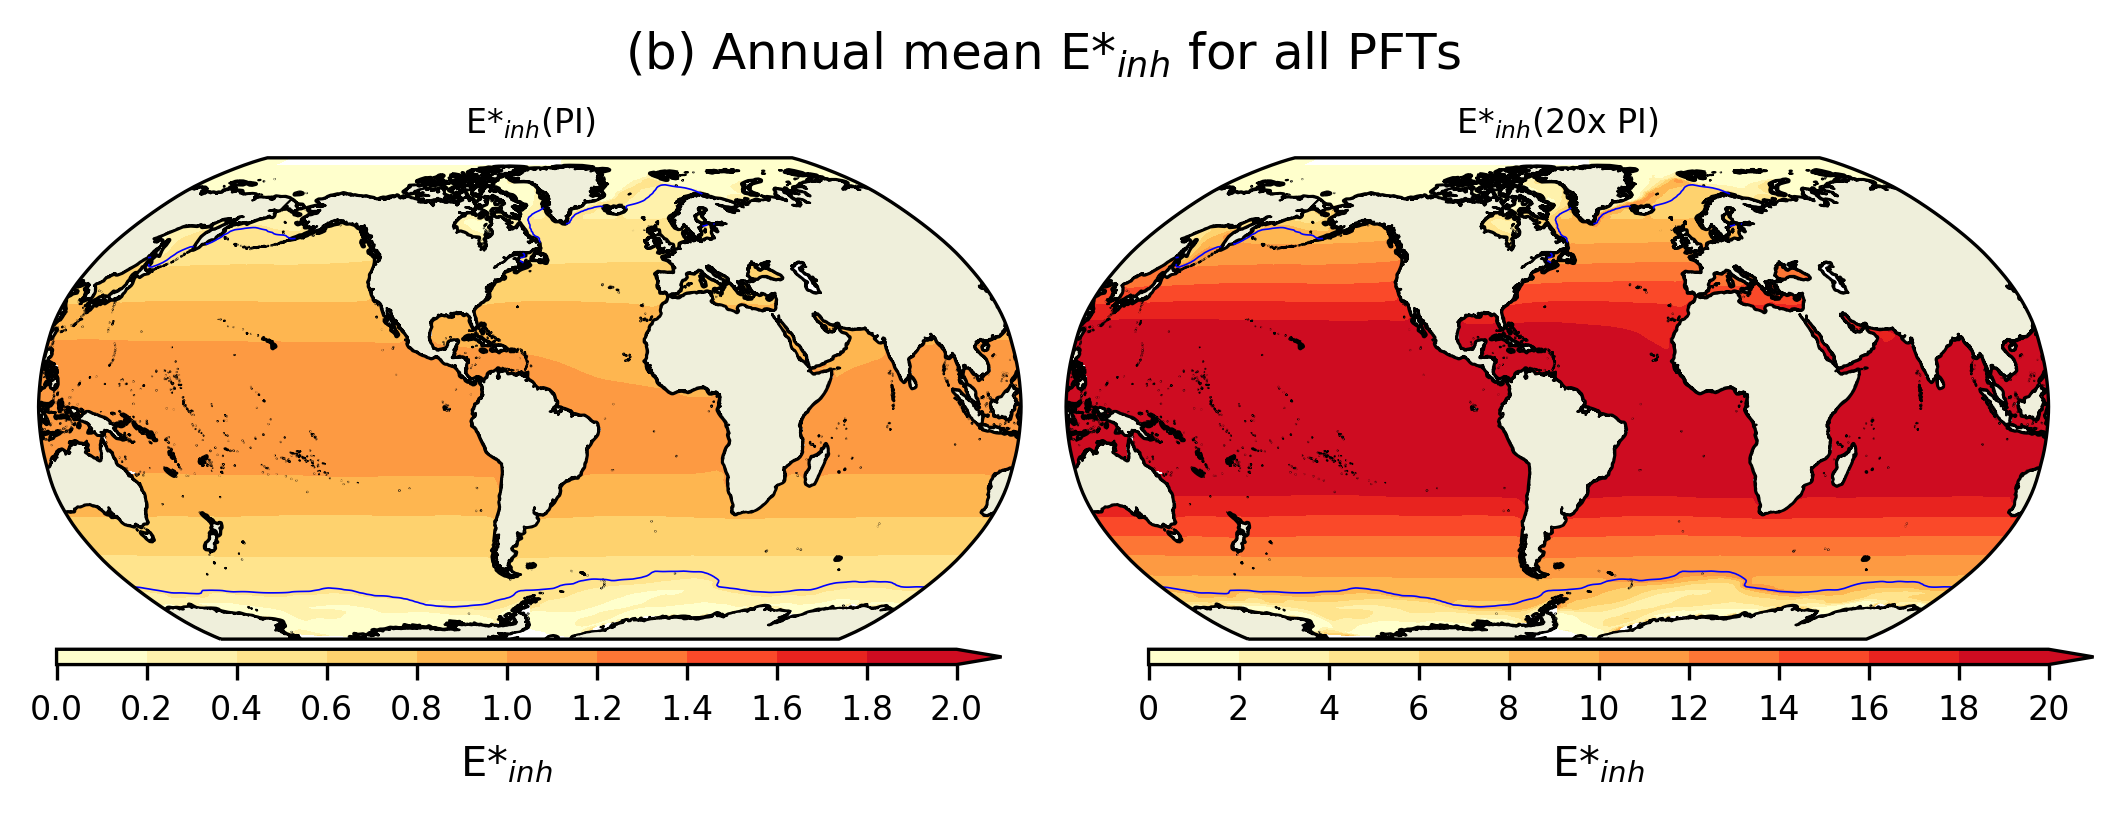

In [26]:
FILTER_OUT_ICE=False
for yr in [1]:
    ax={}
    pc={}
    fig,(ax[EINHPI_DATM_CNL_4P2Z],ax[EINH20X_DATM_CNL_4P2Z])= plt.subplots(1,2,figsize =(7,2.55),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60))) 
    fig.suptitle('(b) Annual mean E*$_{inh}$ for all PFTs',y=0.92)
    for case in EINH_CASES:
        scale_factor=1
        ICE=np.array(cesm_ds[EINHPI_DATM_CNL_4P2Z]['IFRAC'][:])
        ICE_ann_mean = np.array(np.nanmax(ICE[0:12],axis=0))
        diff1=[]
        if case==EINH20X_DATM_CNL_4P2Z:
            diff_both = np.array(diff_both)*20
            case_label='E*$_{inh}$(20x PI)'
        else:
            case_label='E*$_{inh}$(PI)'
            for var in ['ATM_EPHYTO1_NET','ATM_EPHYTO4_NET','ATM_EPHYTO5_NET']:
                EINH=np.array(cesm_ds[case][var][:])
                if FILTER_OUT_ICE:
                    EINH[ICE>0.1] = 0.0 # filter out EINH where ICE is > 0.1 
                diff1.append(np.array(np.nanmean(EINH,axis=0))) # annual mean for each PFT
            diff_both = np.nanmean(diff1,axis=0) # average across PFTs; #diff_both = np.subtract(diff1,diff2)
        ax[case].set_title(case_label,fontsize=8)
        TLONG = cesm_ds[EINHPI_DATM_CNL_4P2Z]['TLONG']; TLAT = cesm_ds[EINHPI_DATM_CNL_4P2Z]['TLAT']
        #diff_both[ICE>0.1] = 0.0
        pc[case]=ax[case].contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries[case],transform=ccrs.PlateCarree(),extend='max')
        ax[case].contour(TLONG,TLAT,ICE_ann_mean,levels=[0.1],colors='blue',transform=ccrs.PlateCarree(),linewidths=0.4)
        #ax[case].contour(TLONG,TLAT,diff_both,colors='k',levels=[1e-10],transform=ccrs.PlateCarree(),linewidths=1)
        ax[case].coastlines(); 
        ax[case].add_feature(land_object)
    if True:#case=='control':
        case=EINHPI_DATM_CNL_4P2Z
        position = fig.add_axes([0.03,0.09,0.45,0.02])
        cbar1 = fig.colorbar(pc[case],extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
        cbar1.ax.tick_params(labelsize=8)
        cbar1.set_ticks(boundaries[case])
        cbar1.set_label('E*$_{inh}$');#cbar1.set_label('g C $yr^{-1}$')
        case=EINH20X_DATM_CNL_4P2Z
        position = fig.add_axes([0.55,0.09,0.45,0.02])
        cbar1 = fig.colorbar(pc[case],extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
        cbar1.ax.tick_params(labelsize=8)
        cbar1.set_ticks(boundaries[case])
        cbar1.set_label('E*$_{inh}$');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    plt.savefig('GMD24_figs/Figure3b.eps')
    plt.savefig('GMD24_figs/Figure3b.png')
    plt.show()


In [2]:
# FIGURE 4: MAPS OF ALL PFT PRODUCTIVITY AND ANOMALIES 


import glob as glob
import os
from collections import OrderedDict
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *; 
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300



def pop_add_cyclic(ds): # pass an xarray object into this
    nj = ds.TLAT.shape[0] # size of POP grid
    ni = ds.TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        print('\n')
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        print('\n')
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})
    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)
    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})     
    return dso




In [3]:
# get data cesm_ds={}
CASES=[EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]
cesm_ds={}
for case in CASES: # cycle through cases as defined above 
  cesm_mon_ds=xr.open_mfdataset(files_h0[case][:],combine='nested',concat_dim='time')#,decode_times=False,decode_coords=False, concat_dim='time')
  coords = {'x':'TLONG','y':'TLAT'}
  keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
  vars = ['photoC_diat_zint','photoC_diaz_zint','photoC_sp_zint','photoC_cocco_zint','photoC_TOT_zint']
  keepthese = keepthese+vars
  keep_vars = keepthese +list(coords.values())+['dz','KMT']
  cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
  cesm_ds[case] = pop_add_cyclic(cesm_mon_ds) 
    

/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/4148965895.py:34: RuntimeWarning: Mean of empty slice
  diff1 = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/4148965895.py:44: RuntimeWarning: Mean of empty slice
  diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/4148965895.py:56: RuntimeWarning: Mean of empty slice
  diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/4148965895.py:63: RuntimeWarning: Mean of empty slice
  diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/4148965895.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


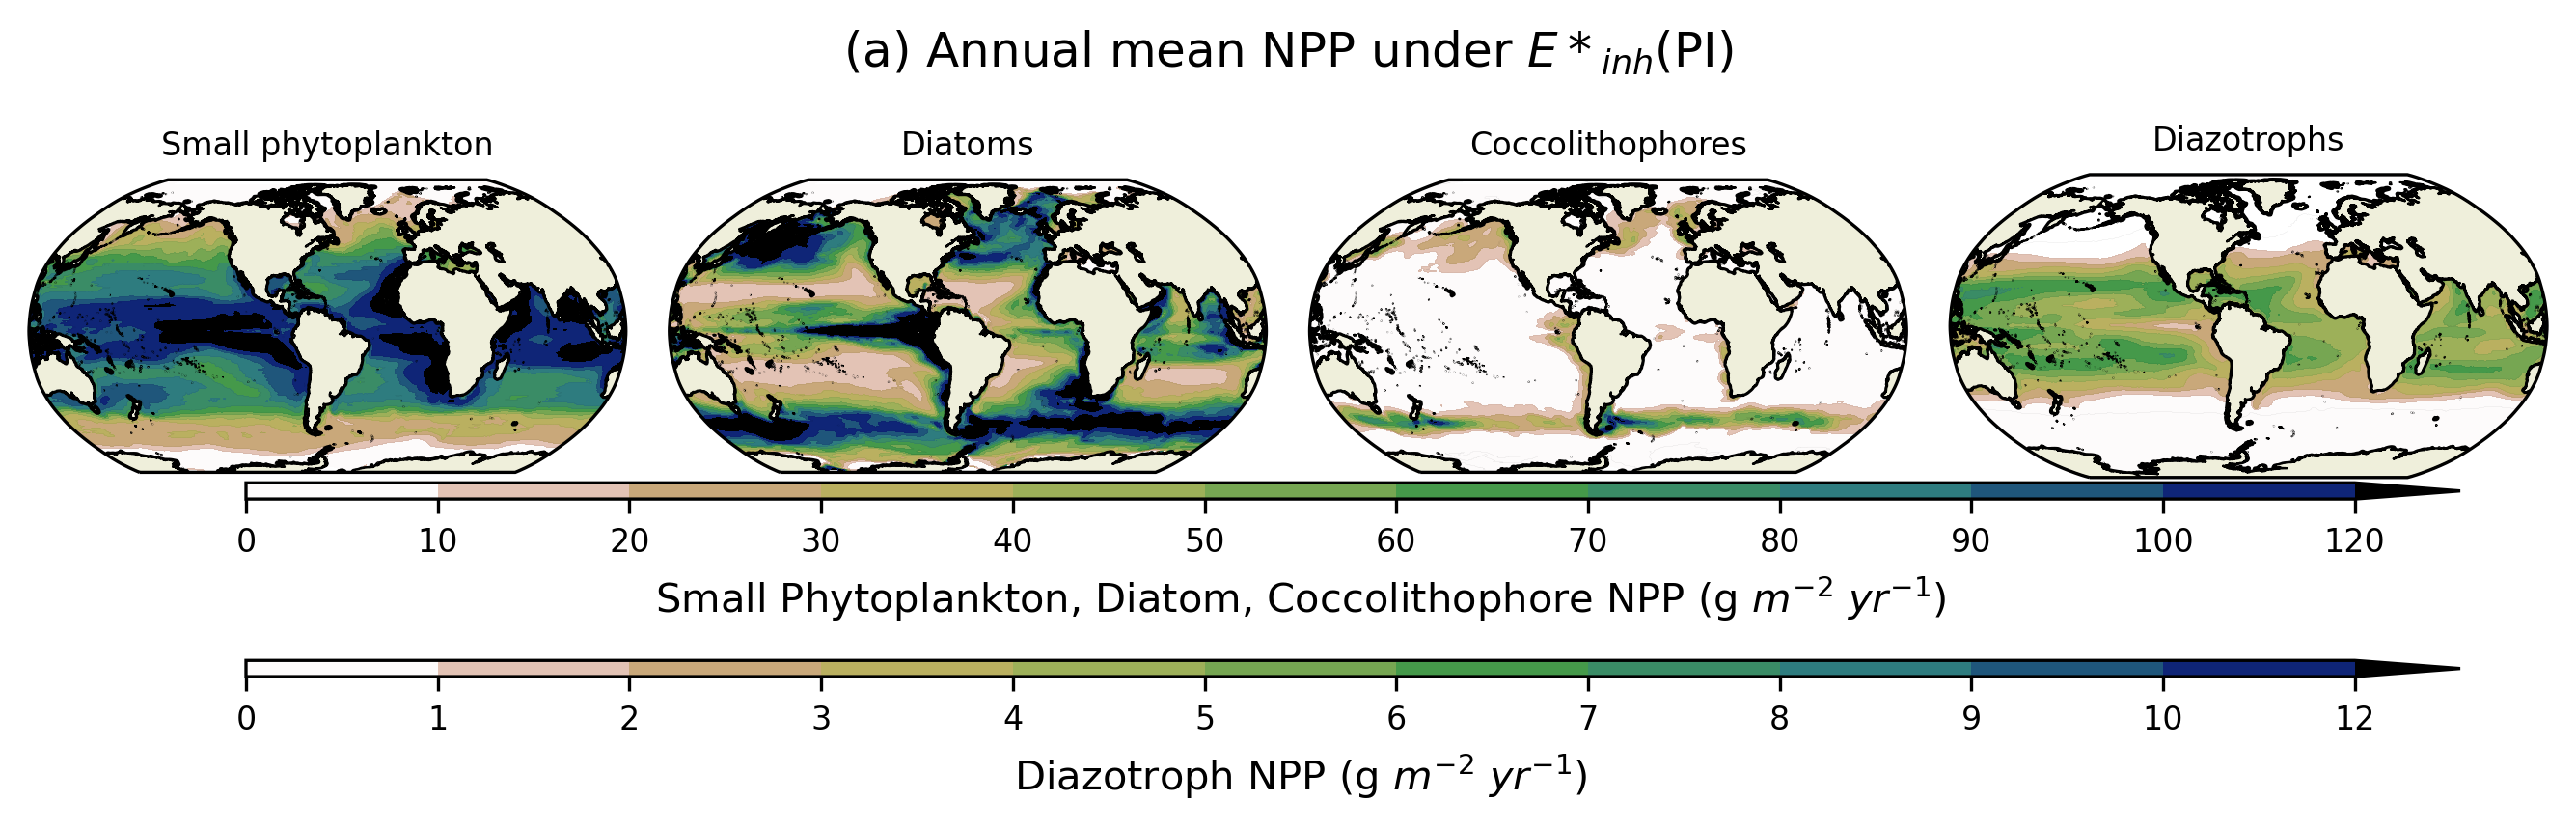

In [4]:
# Next: plot map of NPP
XXX=4

def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries=np.array(np.linspace(0,12,12))*10
boundaries = np.array([0,10,20,30,40,50,60,70,80,90,100,120])
boundaries_small=np.array(np.linspace(0,12,12))*1
boundaries_small = np.array([0,1,2,3,4,5,6,7,8,9,10,12])

colors_diff = get_colors('gist_earth_r',12,add_white=-1)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
from cartopy.util import add_cyclic_point
for case in [EINHPI_DATM_CNL_4P2Z]: # only plotting e*inh(PI)
    var='photoC_sp_zint'
    diff1 = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
    diff_both = diff1; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(9,2.8),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60))) 
    fig.suptitle('(a) Annual mean NPP under $E*_{inh}$(PI)',y=0.8)
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='max')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='max')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('Small Phytoplankton, Diatom, Coccolithophore NPP (g $m^{-2}$ $yr^{-1}$)');#cbar1.set_label('g C $yr^{-1}$')
    
    var='photoC_cocco_zint'
    diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='max')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    diff_both = np.array(np.nanmean(cesm_ds[case][var][:]*scale_factor,axis=0))
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries_small,transform=ccrs.PlateCarree(),extend='max')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries_small,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    position = fig.add_axes([0.10,0.001,0.85,0.02])
    cbar1 = fig.colorbar(pc4,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries_small)
    cbar1.set_label('Diazotroph NPP (g $m^{-2}$ $yr^{-1}$)');#cbar1.set_label('g C $yr^{-1}$')
    #fig.tight_layout(); 
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('GMD24_figs/Figure4a.eps')
    plt.savefig('GMD24_figs/Figure4a.png')
    plt.show()


/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/1171245736.py:28: RuntimeWarning: Mean of empty slice
  ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/1171245736.py:29: RuntimeWarning: Mean of empty slice
  PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/1171245736.py:41: RuntimeWarning: Mean of empty slice
  ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/1171245736.py:42: RuntimeWarning: Mean of empty slice
  PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/1171245736.py:52: RuntimeWarning: Mean of empty slice
  ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipyke

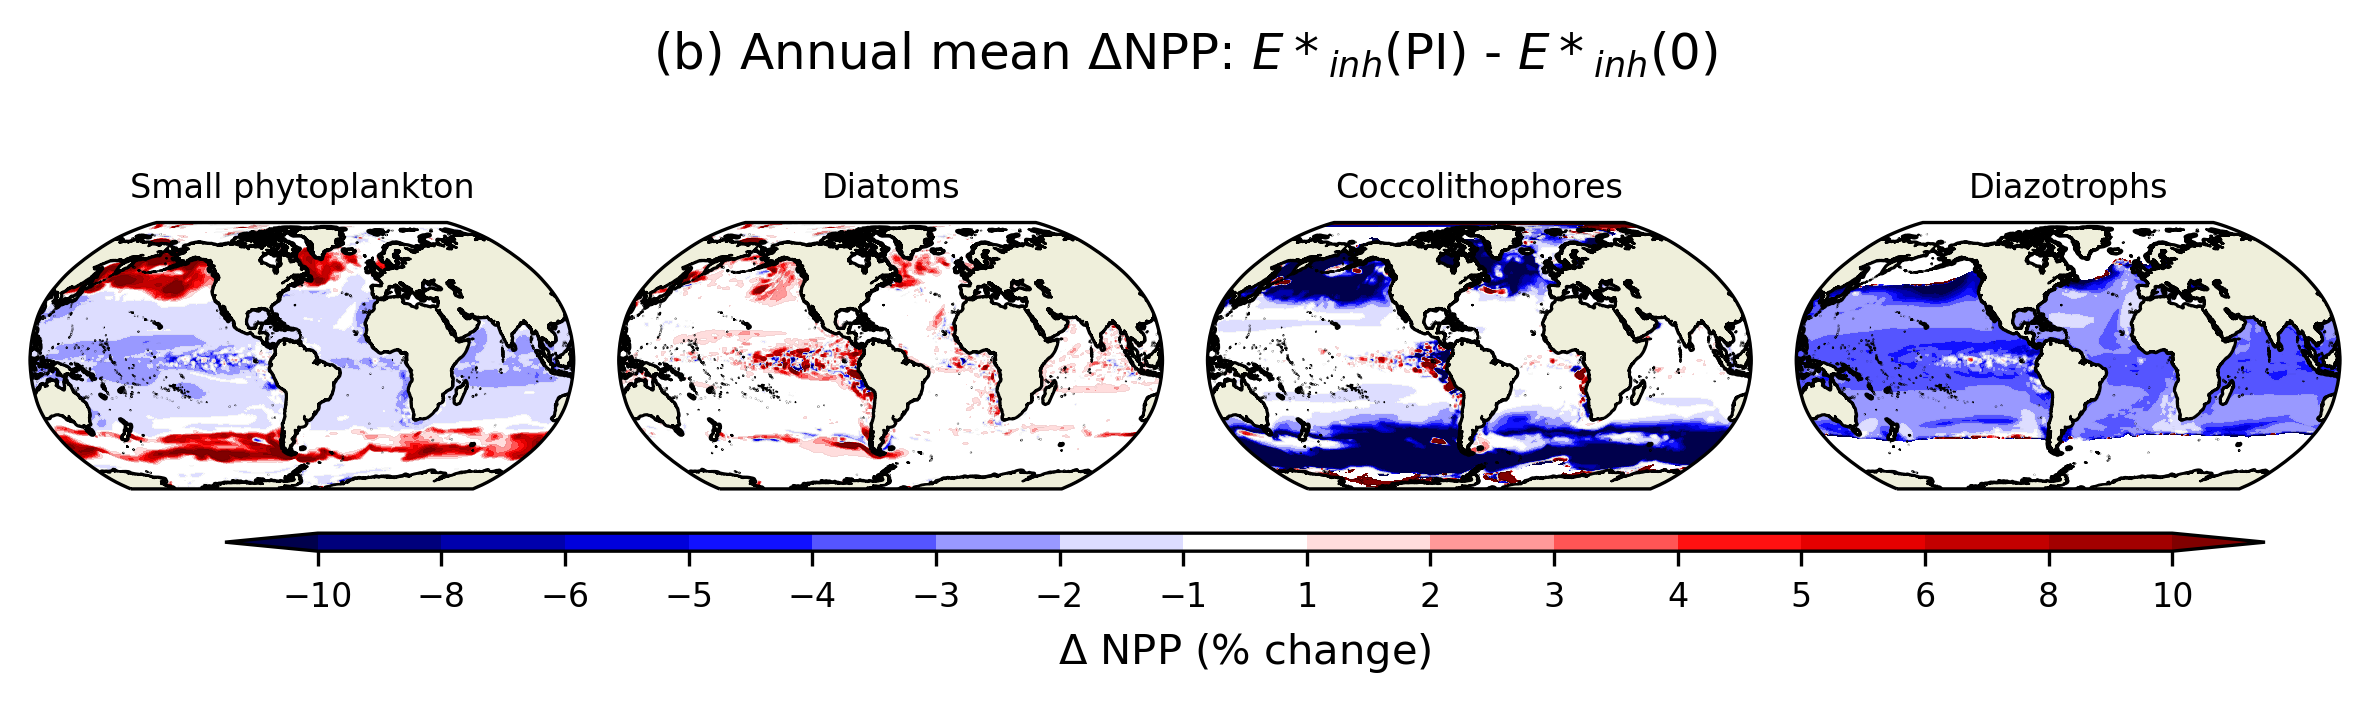

In [5]:
def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries = np.array([-10,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10])

colors_diff = get_colors('seismic',16,add_white=8)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = PI-ZERO
    diff_both = diff_both * ZERO**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60))) 
    fig.suptitle('(b) Annual mean $\Delta$NPP: $E*_{inh}$(PI) - $E*_{inh}$(0)',y=0.8)
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = PI-ZERO
    diff_both = diff_both * ZERO**-1*100; #diff_both = np.subtract(diff1,diff2)
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = PI-ZERO
    diff_both = diff_both * ZERO**-1*100; #diff_both = np.subtract(diff1,diff2)
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    ZERO = np.array(np.nanmean(cesm_ds[EINH0X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    PI = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = PI-ZERO
    diff_both = diff_both * ZERO**-1*100; #diff_both = np.subtract(diff1,diff2)
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('GMD24_figs/Figure4b.eps')
    plt.savefig('GMD24_figs/Figure4b.png')
    plt.show()


/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/3286283430.py:15: RuntimeWarning: Mean of empty slice
  HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/3286283430.py:16: RuntimeWarning: Mean of empty slice
  REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/3286283430.py:28: RuntimeWarning: Mean of empty slice
  HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/3286283430.py:29: RuntimeWarning: Mean of empty slice
  REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/scratch/jcoupe/tmp/ipykernel_65741/3286283430.py:39: RuntimeWarning: Mean of empty slice
  HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
/glade/derecho/sc

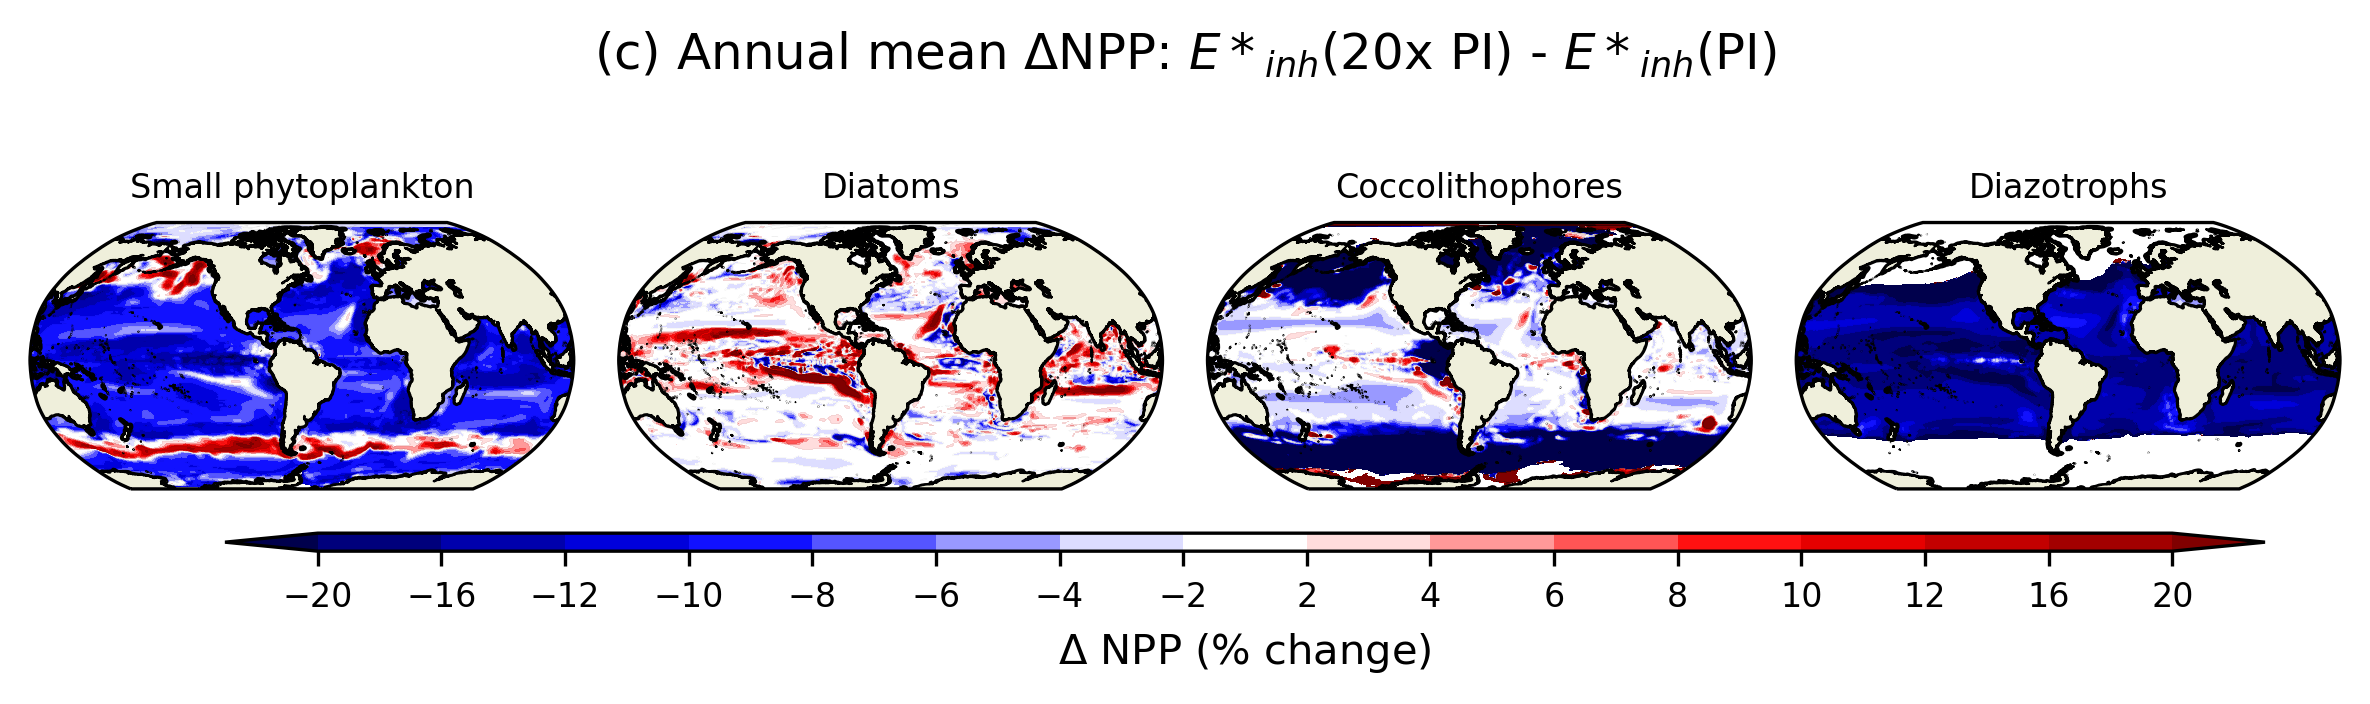

In [6]:

land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 12*1e-2*1e-3 *86400
boundaries = np.array([-70,-60,-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60,70])*0.1
#boundaries = np.array([-70,-60,-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60,70])*0.2
boundaries = np.array([-10,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10])*2

colors_diff = get_colors('seismic',16,add_white=8)
cmap = mpl.colors.ListedColormap(colors_diff, "")
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60))) 
    fig.suptitle('(c) Annual mean $\Delta$NPP: $E*_{inh}$(20x PI) - $E*_{inh}$(PI)',y=0.8)
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    HALOGEN = np.array(np.nanmean(cesm_ds[EINH20X_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    REGULAR = np.array(np.nanmean(cesm_ds[EINHPI_DATM_CNL_4P2Z][var][:]*scale_factor,axis=0))
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('GMD24_figs/Figure4c.eps')
    plt.savefig('GMD24_figs/Figure4c.png')
    plt.show()

In [1]:
# figure 5 : vertical change in productivity


import glob as glob
import os
#from collections import OrderedDictq
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *; 
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300




In [2]:

EINHPI_WACCM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_waccm6_4p2z_CullenNealeLorenzo_EinhPI'
EINHPI_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI'
EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH20X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'

EINHPI_DATM_CNLPICPOC_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC_EinhPI'
EINH20X_DATM_CNLPICPOC_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC_Einhx20'
EINHPI_DATM_CNL_PICPOC01_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC01_EinhPI'
EINHPI_DATM_CNL_PICPOC03_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC03_EinhPI'
EINH20X_DATM_CNL_PICPOC03_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC03_Einhx20'


#CASES=[EINH0X_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]
CASES=[EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]


OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
files={}; files_h0={}
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

#
#OUTPUT_PATH='/glade/scratch/jcoupe/archive/'
#for case in [EINHPI_DATM_CNL_PICPOC01_4P2Z,EINHPI_DATM_CNL_PICPOC03_4P2Z,EINH20X_DATM_CNL_PICPOC03_4P2Z]:
#    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


In [4]:

PICPOC_scaling = True
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0' #PICPOC does not matter
if PICPOC_scaling:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI' # Einh = 20x PI radiation
else:
    EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'  
    EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI' # Einh = 20x PI radiation
    
CASES=[EINHPI_DATM_CNL_4P2Z,EINH0X_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[0:60]


In [5]:
var='photoC_TOT' # z_t_150m
#var='photoC_cocco'

extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)
z_t_150m = extract.variables['z_t_150m'][:]*(0.01)

if True:
 scale_factor=1
 data={};
 for case in CASES:
     data[case]=np.zeros((60,len(z_t_150m)))
     print(case)
     if True:
         t=0
         for fi in files_h0[case][:]:
             extract = nc4.Dataset(fi,'r')
             tempdata = extract.variables[var][0]
             for lev in range(len(z_t_150m)):
                   data[case][t][lev] = np.average(tempdata[lev],weights=TAREA)
             t=t+1
                   #data[case][t][lev] = 1/(1+data[case][t][lev])
         #print(data[case])

        

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI


In [7]:

def percent_anomaly(data,control):
   control_climo = np.nanmean(separate_by_month_arrays(control),axis=1)
   monthly_data = separate_by_month_arrays(data)
   percent_anom = []
   for yr in range(np.shape(monthly_data)[1]):
        for mo in range(np.shape(monthly_data)[0]):
          percent_anom.append( 100*(monthly_data[mo][yr] - control_climo[mo]) * (control_climo[mo]**-1))
   return percent_anom
    
def separate_by_month_arrays(dataset):
	k=0
	jan=[];feb=[];march=[];apr=[];may=[];jun=[];july=[];aug=[];sep=[];oc=[];nov=[];dec=[];
	while k <= (len(dataset)-12):
		jan.append((dataset[k]))
		feb.append((dataset[k+1]))
		march.append((dataset[k+2]))
		apr.append((dataset[k+3]))
		may.append((dataset[k+4]))
		jun.append((dataset[k+5]))
		july.append((dataset[k+6]))
		aug.append((dataset[k+7]))
		sep.append((dataset[k+8]))
		oc.append((dataset[k+9]))
		nov.append((dataset[k+10]))
		dec.append((dataset[k+11]))
		k = k+12;
	return [jan,feb,march,apr,may,jun,july,aug,sep,oc,nov,dec]

def monthly_anomaly(data,data_control,type='standard',NANDATA = False):
    monthly_data = separate_by_month_arrays(data)
    monthly_data_control = np.nanmean(separate_by_month_arrays(data_control),axis=1)
    new_data=[]
    if type == 'percent':
        return percent_anomaly(data,data_control)
    if type == 'standard':
        for yr in range(int(len(data)/12.0)):
            for mo in range(12):
                new_data.append(monthly_data[mo][yr] - monthly_data_control[mo])
        return new_data
    if type == 'sd':
        mdc_std = np.nanstd(separate_by_month_arrays(data_control),axis=1)
        for yr in range(int(len(data)/12.0)):
    	    for mo in range(12):
	          new_data.append( (monthly_data[mo][yr] - monthly_data_control[mo]) *(mdc_std[mo]**-1))
        return new_data



In [8]:
data_climo={}
data_climo2={}
for case in CASES:
    data_climo[case]=np.zeros((60,len(z_t_150m)))
    data_climo2[case]=np.zeros((13,15))
    data_climo[case] = separate_by_month_arrays( data[case])
    print(np.shape(data_climo[case]))
    data_climo[case] = np.nanmean(data_climo[case],axis=1)
    data_climo[case] = data_climo[case]
    data_climo2[case][0:12] = data_climo[case][0:12]
    data_climo2[case][12:13] = data_climo[case][0:1]
    print(np.shape(data_climo[case]))

(12, 5, 15)
(12, 15)
(12, 5, 15)
(12, 15)
(12, 5, 15)
(12, 15)


/glade/derecho/scratch/jcoupe/tmp/ipykernel_30444/192190204.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()


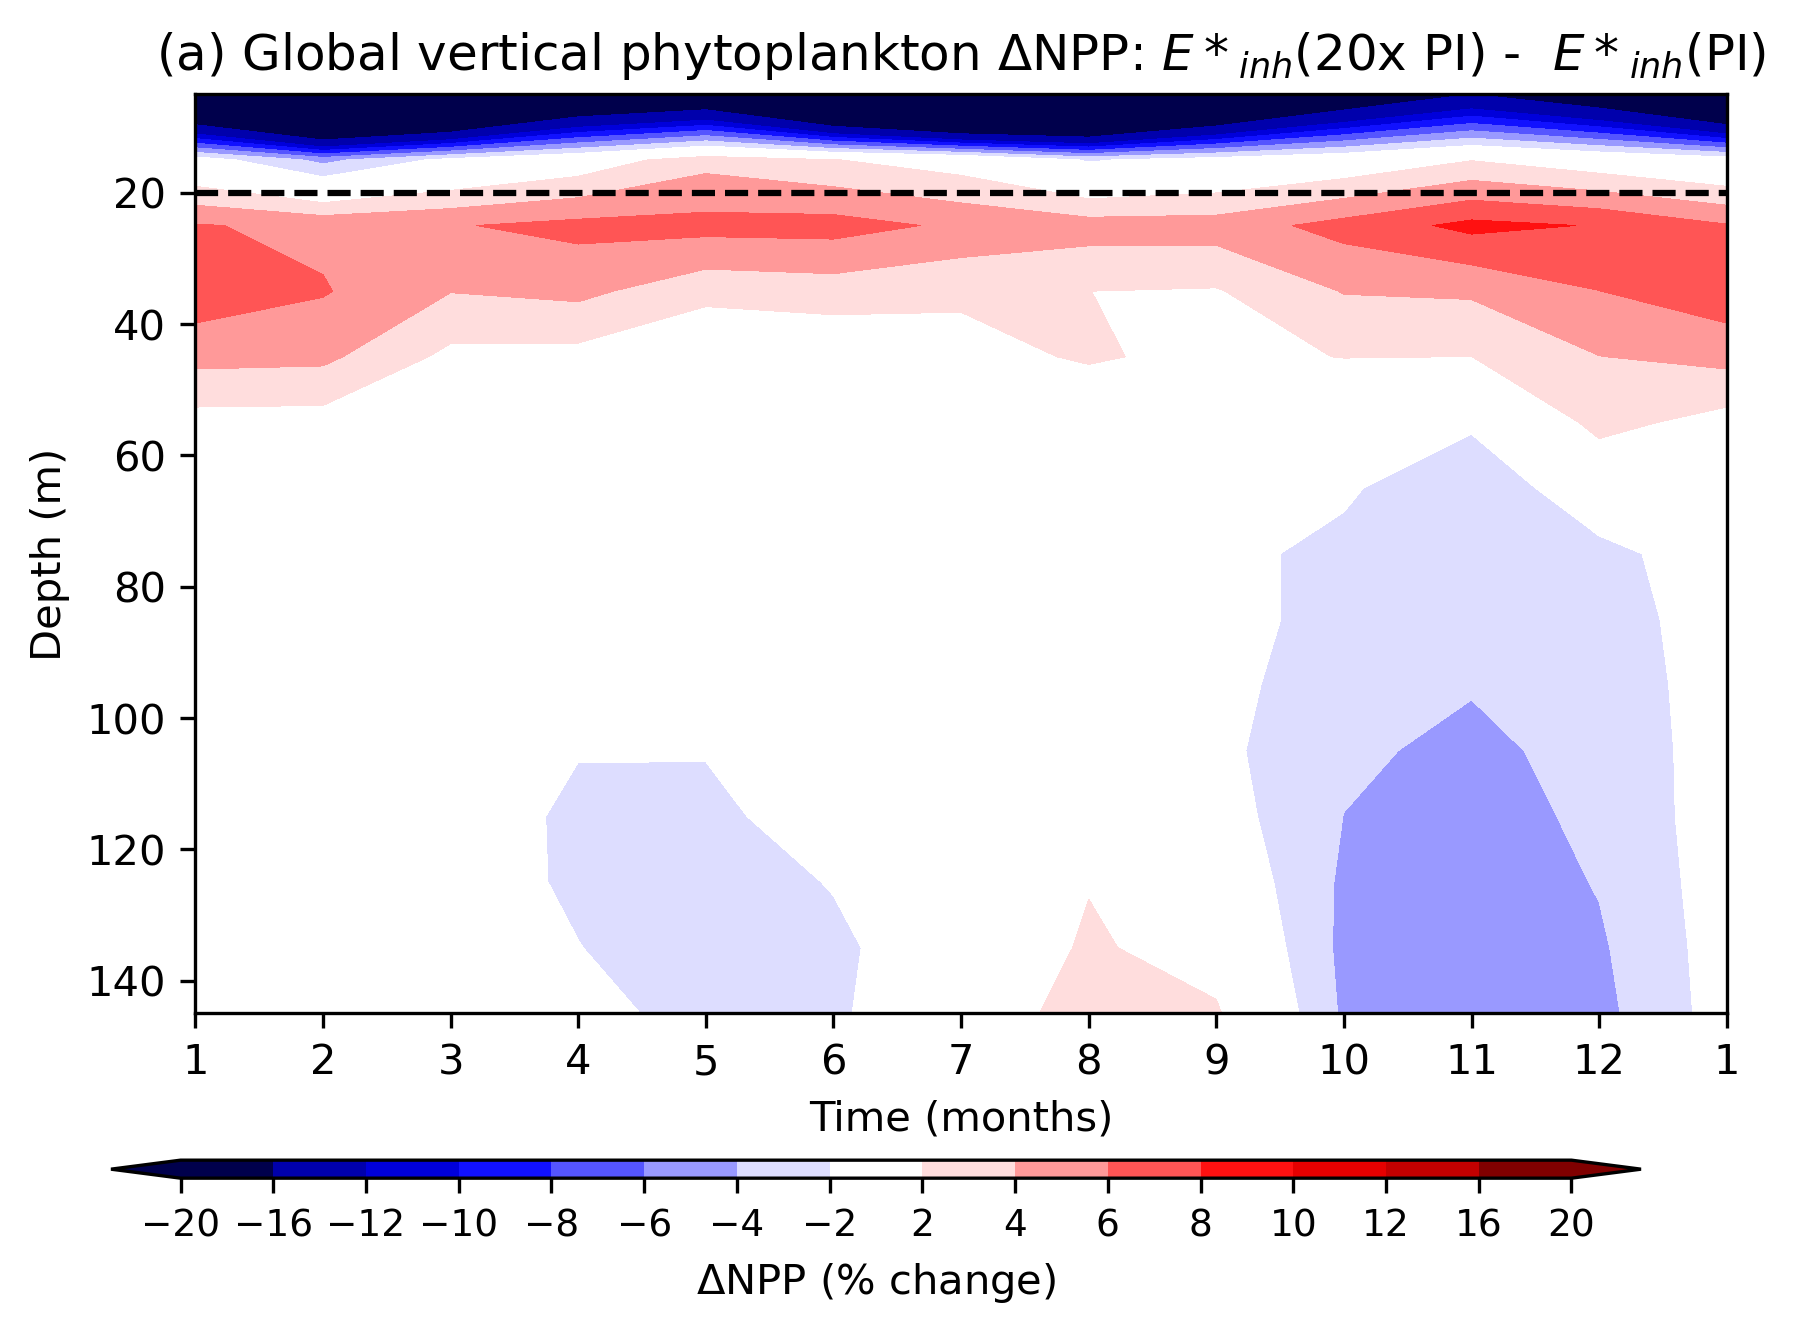

/glade/derecho/scratch/jcoupe/tmp/ipykernel_30444/192190204.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()


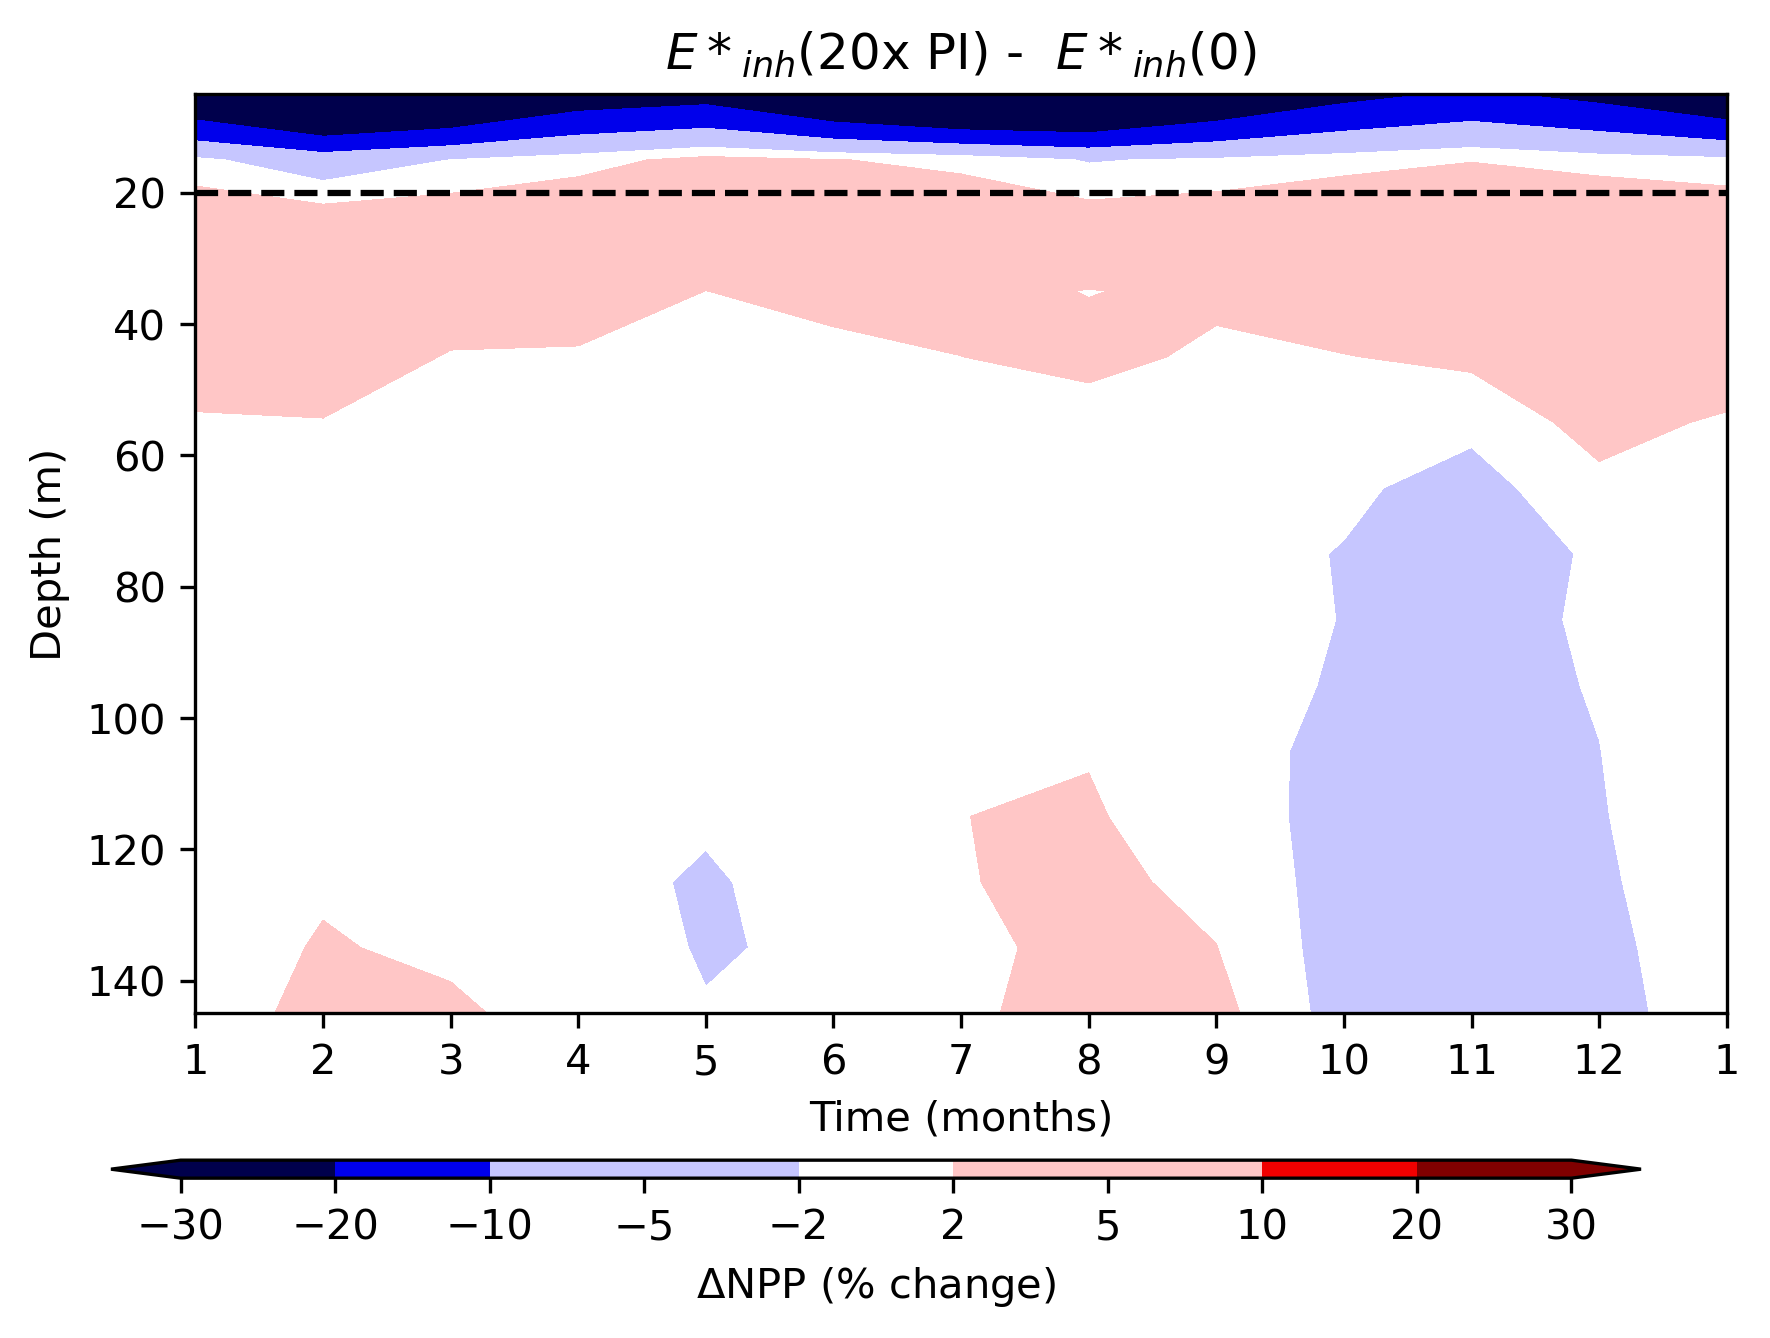

/glade/derecho/scratch/jcoupe/tmp/ipykernel_30444/192190204.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()


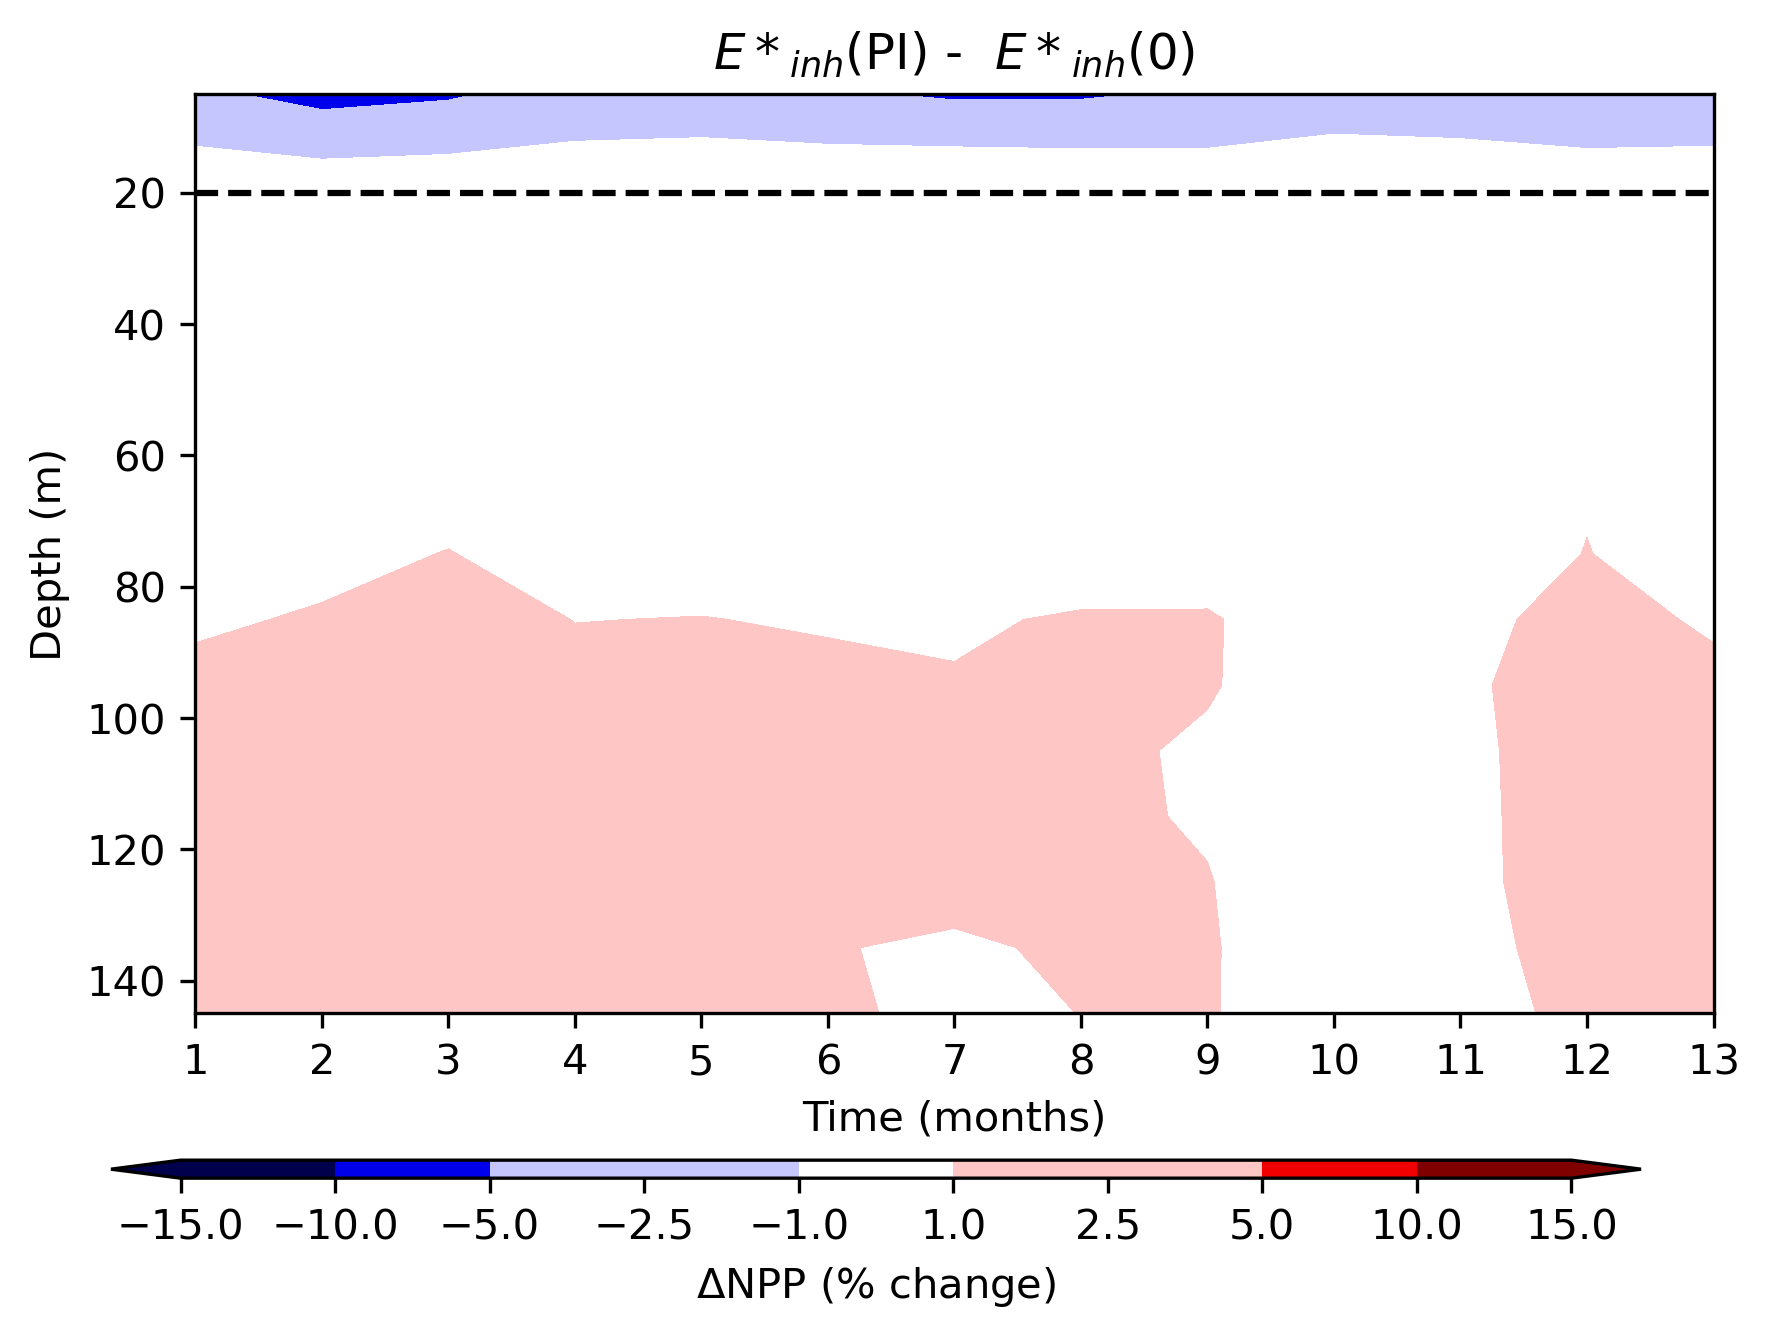

In [13]:

scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*365
scale_factor = 12*1e-2*1e-3 *86400
scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365

def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors


# ORIGINAL
boundaries_diff=[-30,-20,-10,-5,-2,2,5,10,20,30]
colors_diff = get_colors('seismic',10,add_white=5)
cmap_diff = mpl.colors.ListedColormap(colors_diff, "")

# TRY TO REPLICAT NEW MAPS ?
boundaries_diff = np.array([-10,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10])*2
colors_diff = get_colors('seismic',16,add_white=8)
cmap_diff = mpl.colors.ListedColormap(colors_diff, "")

time=np.linspace(1,len(data_climo2[case]),len(data_climo2[case]))
if True:
    # plot difference
    HALOGEN = np.array(data_climo2[EINH20X_DATM_CNL_4P2Z]) 
    REGULAR= np.array(data_climo2[EINHPI_DATM_CNL_4P2Z])
    diff = HALOGEN - REGULAR
    diff = diff * REGULAR**-1 * 100
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    pc1 = ax.contourf(time,z_t_150m,diff.T,cmap=cmap_diff,levels=boundaries_diff,extend='both')
    ax.set_ylim((z_t_150m[-1],z_t_150m[0]))
    ax.set_title('(a) Global vertical phytoplankton $\Delta$NPP: $E*_{inh}$(20x PI) -  $E*_{inh}$(PI)'); ax.set_ylabel('Depth (m)'); ax.set_xlabel('Time (months)')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],('1','2','3','4','5','6','7','8','9','10','11','12','1'))
    ax.axhline(20,linestyle='--',color='k')
    position = fig.add_axes([0.07,0.005,0.85,0.015])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal',norm=mpl.colors.BoundaryNorm(boundaries_diff,ncolors=len(boundaries_diff)-1,clip=False))
    cbar1.ax.tick_params(labelsize=9)
    cbar1.set_ticks(boundaries_diff)
    cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()
    plt.savefig('GMD24_figs/Figure5a.eps')
    plt.savefig('GMD24_figs/Figure5b.png')
    plt.show()


# !! note the below figures are not in the paper but replicate the above figure with the additional cases 

#boundaries_diff=np.array(np.linspace(-1,1,12))*0.01
boundaries_diff=[-30,-20,-10,-5,-2,2,5,10,20,30]
#cmap_seismic = plt.cm.get_cmap('seismic',len(boundaries))
colors_diff = get_colors('seismic',10,add_white=5)
#colors = list(cmap_seismic(np.arange(len(boundaries))))
cmap_diff = mpl.colors.ListedColormap(colors_diff, "")

time=np.linspace(1,len(data_climo2[case]),len(data_climo2[case]))
if True:
    # plot difference
    HALOGEN = np.array(data_climo2[EINH20X_DATM_CNL_4P2Z]) 
    REGULAR= np.array(data_climo2[EINH0X_DATM_CNL_4P2Z])
    diff = HALOGEN - REGULAR
    diff = diff * REGULAR**-1 * 100
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    pc1 = ax.contourf(time,z_t_150m,diff.T,cmap=cmap_diff,levels=boundaries_diff,extend='both')
    ax.set_ylim((z_t_150m[-1],z_t_150m[0]))
    ax.set_title('$E*_{inh}$(20x PI) -  $E*_{inh}$(0)'); ax.set_ylabel('Depth (m)'); ax.set_xlabel('Time (months)')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],('1','2','3','4','5','6','7','8','9','10','11','12','1'))
    ax.axhline(20,linestyle='--',color='k')
    position = fig.add_axes([0.07,0.005,0.85,0.015])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal',norm=mpl.colors.BoundaryNorm(boundaries_diff,ncolors=len(boundaries_diff)-1,clip=False))
    cbar1.ax.tick_params(labelsize=10)
    cbar1.set_ticks(boundaries_diff)
    cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()
    #plt.savefig('GMD24_figs/Figure4_20x-0.eps')
    #plt.savefig('GMD24_figs/Figure4_20x0.png')
    plt.show()

time=np.linspace(1,len(data_climo2[case]),len(data_climo2[case]))
if True:
    # plot difference
    factor=0.5
    HALOGEN = np.array(data_climo2[EINHPI_DATM_CNL_4P2Z]) 
    ZERO= np.array(data_climo2[EINH0X_DATM_CNL_4P2Z])
    diff = HALOGEN - REGULAR
    diff = diff * REGULAR**-1 * 100
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    pc1 = ax.contourf(time,z_t_150m,diff.T,cmap=cmap_diff,levels=np.array(boundaries_diff)*factor,extend='both')
    ax.set_ylim((z_t_150m[-1],z_t_150m[0]))
    ax.set_title('$E*_{inh}$(PI) -  $E*_{inh}$(0)'); ax.set_ylabel('Depth (m)'); ax.set_xlabel('Time (months)')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],('1','2','3','4','5','6','7','8','9','10','11','12','13'))
    ax.axhline(20,linestyle='--',color='k')
    position = fig.add_axes([0.07,0.005,0.85,0.015])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal',norm=mpl.colors.BoundaryNorm(np.array(boundaries_diff)*factor,ncolors=len(boundaries_diff)-1,clip=False))
    cbar1.ax.tick_params(labelsize=10)
    cbar1.set_ticks(np.array(boundaries_diff)*factor)
    cbar1.set_label('$\Delta$NPP (% change)'); fig.tight_layout()
    #plt.savefig('GMD24_figs/Figure4_20x-PI.eps')
    #plt.savefig('GMD24_figs/Figure4_20x-PI.png')
    plt.show()

    

In [2]:
# plot of coccolithophore NPP change with and without pic/poc scaling
EINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINHPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
EINH20XPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

EINHPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
EINH20XPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'

CASES=[EINH0_PICPOC,EINHPI_PICPOC,EINH20XPI_PICPOC,EINHPI_NOPICPOC,EINH20XPI_NOPICPOC]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]



In [3]:
# plot of coccolithophore NPP change with and without pic/poc scaling
# switch above plot to photoC_tot_zint
# calculate NPP
extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)
#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
scale_factor=1e-3*12*1e-15*86400*365*1e-2
data={}
for case in CASES:
    var='photoC_cocco_zint'
    data[case]=[]
    print(case)
    if True:
        for fi in files_h0[case][0:12]:
            extract = nc4.Dataset(fi,'r')
            if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
                #for var in ['photoC_sp_zint','photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint']:
                #    tempdata = tempdata + np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            else:
                tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #else:
            #    if case ==NW_CNTRL_03:
            #      var='NPP'
            #    if (case==HALOGEN_CASE_3P1Z or case==HALOGEN_ZERO_CASE_3P1Z):
            #      var='photoC_TOT_zint_2'
            #    tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #print(tempdata,' mmol m^-1 cm s^-1')
            for t in range(len(tempdata)):
                data[case].append(tempdata[t])
                


CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI


In [4]:
# percent change coccolithophore E*inh(20x PI) !!!!
# experiments

#EINHPI_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI'
#EINH20x_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'

#EINH0X_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0' # this case does not have pic/poc scaling
EINH0X_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm'  # case still on cheyenne scratch 
EINH0X_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm' 
EINH0X_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm' 
EINH0X_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm'

#EINHPI_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI' # this case does not have pic/poc scaling
#EINHPI_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI' # this case DOES have PIC/POC scaling
EINHPI_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm'  # case still on cheyenne scratch 
EINHPI_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm' 
EINHPI_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm' 
EINHPI_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm'

#EINHX20_DATM_CNL_4P2Z_284PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20' # this case does not have pic/poc scaling
#EINHX20_DATM_CNL_4P2Z_284PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20' # this case has pic/poc scaling
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
EINHX20_DATM_CNL_4P2Z_600PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm'
EINHX20_DATM_CNL_4P2Z_700PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm'
EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'


#files={}; files_h0={}
CASES=[EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM,EINHPI_DATM_CNL_4P2Z_400PPM,EINHPI_DATM_CNL_4P2Z_600PPM,EINHPI_DATM_CNL_4P2Z_700PPM,EINHPI_DATM_CNL_4P2Z_900PPM,EINHX20_DATM_CNL_4P2Z_400PPM,EINHX20_DATM_CNL_4P2Z_600PPM,EINHX20_DATM_CNL_4P2Z_700PPM,EINHX20_DATM_CNL_4P2Z_900PPM]

OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


# same plot as above but look at coccoNPP
# calculate NPP
extract = nc4.Dataset(files_h0[EINH0X_DATM_CNL_4P2Z_400PPM][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)

#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
scale_factor=1e-3*12*1e-15*86400*365*1e-2
#for case in [EINHPI_DATM_CNL_4P2Z_400PPM]:
CASES=[]#[EINH0X_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM] # BASE 0X cases

#CASES.append(EINHPI_DATM_CNL_4P2Z_284PPM) # 400 ppm PI case
#CASES.append(EINHX20_DATM_CNL_4P2Z_284PPM) # 400 ppm 20x PI case

CASES.append(EINHPI_PICPOC)
CASES.append(EINH20XPI_PICPOC)

CASES.append(EINHPI_DATM_CNL_4P2Z_400PPM) # 400 ppm PI case
CASES.append(EINHX20_DATM_CNL_4P2Z_400PPM) # 400 ppm 20x PI case

CASES.append(EINHPI_DATM_CNL_4P2Z_400PPM) # 400 ppm PI case
CASES.append(EINHX20_DATM_CNL_4P2Z_400PPM) # 400 ppm 20x PI case

CASES.append(EINHPI_DATM_CNL_4P2Z_600PPM) 
CASES.append(EINHX20_DATM_CNL_4P2Z_600PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_700PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_700PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_900PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_900PPM)
data_co2={}
for case in CASES:
    var='photoC_cocco_zint'
    data_co2[case]=[]
    print(case)
    if True:
        for fi in files_h0[case]:
            extract = nc4.Dataset(fi,'r')
            if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
                #for var in ['photoC_sp_zint','photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint']:
                #    tempdata = tempdata + np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            else:
                tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #else:
            #    if case ==NW_CNTRL_03:
            #      var='NPP'
            #    if (case==HALOGEN_CASE_3P1Z or case==HALOGEN_ZERO_CASE_3P1Z):
            #      var='photoC_TOT_zint_2'
            #    tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #print(tempdata,' mmol m^-1 cm s^-1')
            for t in range(len(tempdata)):
                data_co2[case].append(tempdata[t])



CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


In [66]:
CASES

['cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm',
 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm']

In [5]:
'''
CASES.append(EINHPI_DATM_CNL_4P2Z_400PPM) # 400 ppm PI case
CASES.append(EINHX20_DATM_CNL_4P2Z_400PPM) # 400 ppm 20x PI case
CASES.append(EINHPI_DATM_CNL_4P2Z_600PPM) 
CASES.append(EINHX20_DATM_CNL_4P2Z_600PPM)
CASES.append(EINHPI_DATM_CNL_4P2Z_700PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_700PPM)
CASES.append(EINHPI_DATM_CNL_4P2Z_900PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_900PPM)
'''
ANNUAL={}
if True:
    BASELINE = np.array(data_co2[EINHPI_PICPOC][0:12])
    DATA = np.array(data_co2[EINH20XPI_PICPOC][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['284'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='400 ppm')
    
    BASELINE = np.array(data_co2[EINHPI_DATM_CNL_4P2Z_400PPM][0:12])
    DATA = np.array(data_co2[EINHX20_DATM_CNL_4P2Z_400PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['400'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='400 ppm')
    
    BASELINE = np.array(data_co2[EINHPI_DATM_CNL_4P2Z_600PPM][0:12])
    DATA = np.array(data_co2[EINHX20_DATM_CNL_4P2Z_600PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['600'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='600 ppm')
        
    BASELINE = np.array(data_co2[EINHPI_DATM_CNL_4P2Z_700PPM][0:12])
    DATA = np.array(data_co2[EINHX20_DATM_CNL_4P2Z_700PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['700'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='700 ppm')

    BASELINE = np.array(data_co2[EINHPI_DATM_CNL_4P2Z_900PPM][0:12])
    DATA = np.array(data_co2[EINHX20_DATM_CNL_4P2Z_900PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['900'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='900 ppm')

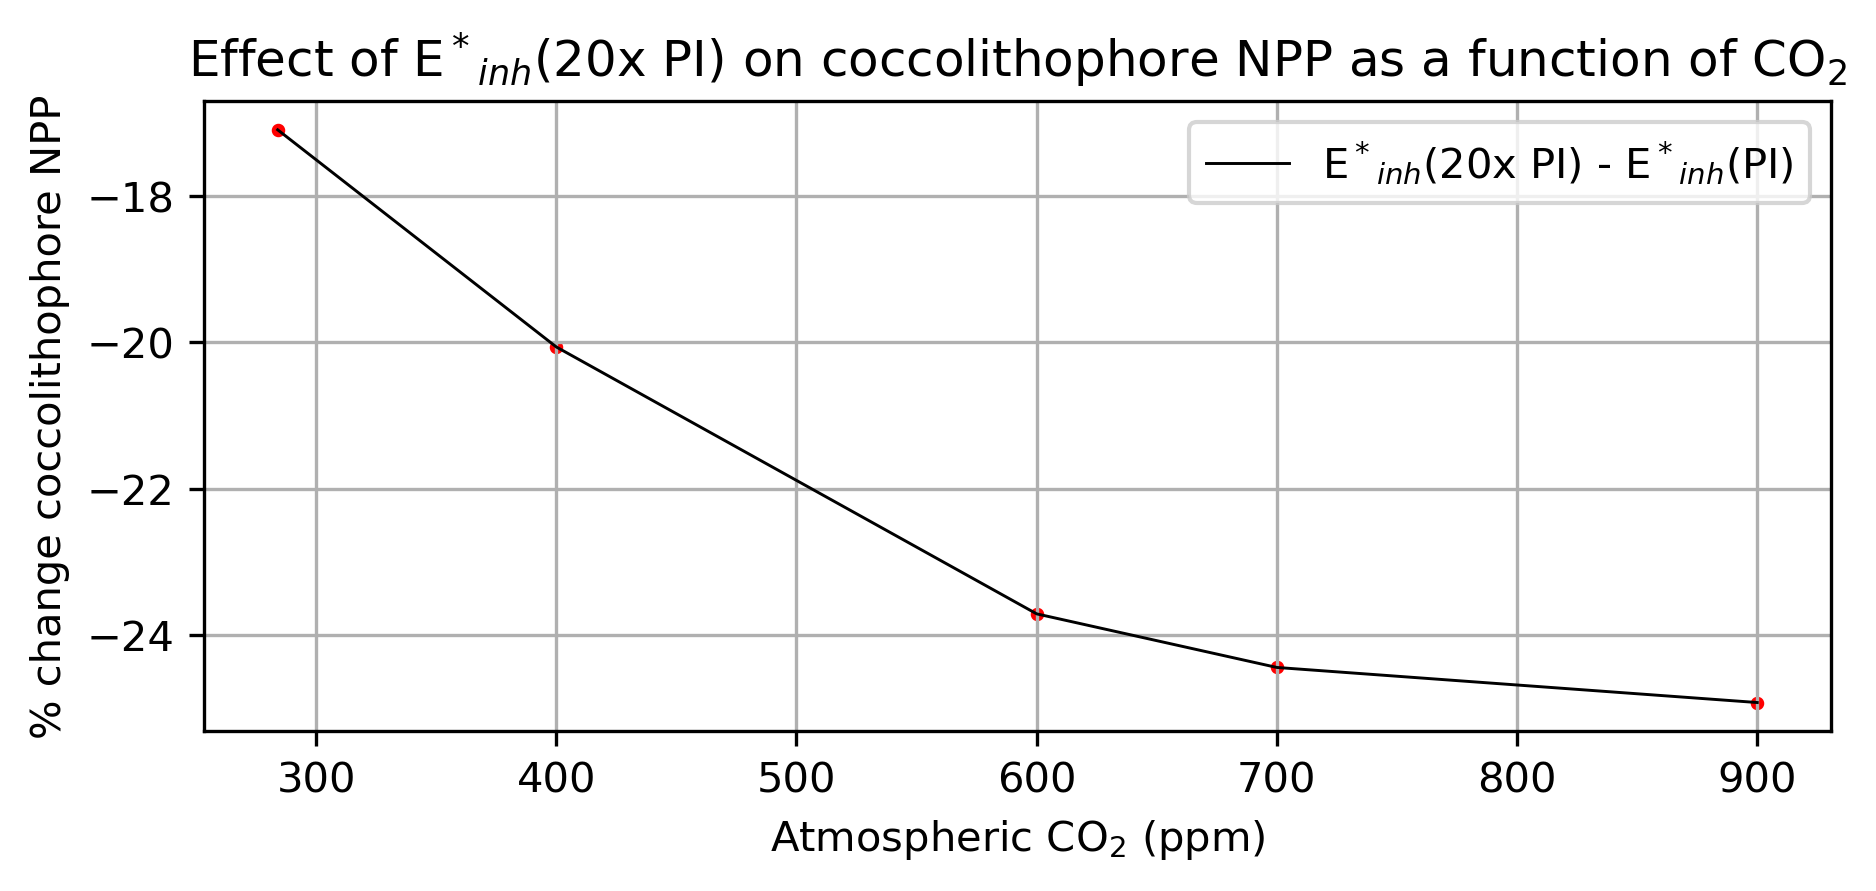

In [13]:

if True:
    plt.figure(figsize=[7,6]) 
    '''
    plt.subplot(2,1,1)
    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'; 
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
    ann_mean=np.nanmean(data[case][:])
    case_label='$E*_{inh}(0)$ \n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; case_color='k'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,label=case_label)
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')

    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI'; 
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
    ann_mean=np.nanmean(data[case][:]); case_label='$E*_{inh}$(PI)\n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; case_color='orange' 
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,label=case_label)
    ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')
    
    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20';
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'
    ann_mean=np.nanmean(data[case][:]); case_label='$E*_{inh}$(20x PI) \n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; case_color='red'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,label=case_label)
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')

    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20';
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'
    ann_mean=np.nanmean(data[case][:]); case_label='  \n '; case_color='white'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    plt.scatter(ts,np.array(data[case][:])*0.0,color=case_color,s=2)
    plt.plot(ts,np.array(data[case][:])*0.0,case_color,label=case_label)
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')

    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI'
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
    ann_mean=np.nanmean(data[case][:]); case_label='$E*_{inh}$(PI) + scaling\n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; case_color='orange' 
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,label=case_label,linestyle='--')
    ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')

    case='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'
    case='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'
    ann_mean=np.nanmean(data[case][:]); case_label='$E*_{inh}$(20x PI) + scaling \n'+str(ann_mean)[0:5]+' Pg C $yr^{-1}$'; case_color='red'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,label=case_label,linestyle='--')
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--')#,label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$')

    #plt.title('Globally integrated NPP \nwith UV inhibition (CO$_2$=284 ppm)'); 
    plt.xlabel('Time (months)'); plt.ylabel('global coccolithophore NPP \n(Pg C $yr^{-1}$)')
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.grid(); plt.xlim([0.95,12.05]); plt.ylim([1.4,8.5])
    plt.legend(loc='best',ncol=2); 
    #plt.show()

    '''
    plt.subplot(2,1,2) # add in CO2 effect ?
    plt.grid()
    total=[]
    ts=[]
    for keys in ['284','400','600','700','900']:
        total.append(ANNUAL[keys])
        ts.append(int(keys))
    plt.plot(ts,total,color='k',linewidth=0.7,label='E$^*$$_{inh}$(20x PI) - E$^*$$_{inh}$(PI)')
    plt.scatter(ts,total,color='r',s=5)
    plt.ylabel('% change coccolithophore NPP')
    plt.xlabel('Atmospheric CO$_2$ (ppm)')
    plt.title('Effect of E$^*$$_{inh}$(20x PI) on coccolithophore NPP as a function of CO$_2$')
    plt.legend(loc='best',ncol=1)
    plt.savefig('GMD24_figs/Figure6.eps')
    plt.savefig('GMD24_figs/Figure6.png')
    plt.show()


In [3]:
import scipy.stats;

In [4]:
#(a) The probability density function for PIC/POC for a 10-year spin-up where CO$_2$ is 284 ppm, 415 ppm, and 850 ppm. 
#(b) Several schemes to scale $E*_{inh}$ as a function of PIC/POC.

# Step 1: outline cases and get files

EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH0X_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH0X_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm'  # case still on cheyenne scratch 
EINH0X_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm' 
EINH0X_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm' 
EINH0X_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm'

files={}; files_h0={}
CASES=[EINH0X_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM]  # scratch cases 
#OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
#for case in CASES:
#    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[-60:] # only take the last 5 years 


#CASES=[EINH0X_DATM_CNL_4P2Z]
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

#
# REPLACE 284 PPM AND 900 PPM SIMULATIONS WITH UPDATED VERSIONS (5 YEARS ??? )
#
'''
EINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINH0X_DATM_CNL_4P2Z_284PPM=EINH0_PICPOC
EINH0X_DATM_CNL_4P2Z_900PPM='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0_900ppm'
CASES=[EINH0X_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_900PPM]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
#files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]
'''


"\nEINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'\nEINH0X_DATM_CNL_4P2Z_284PPM=EINH0_PICPOC\nEINH0X_DATM_CNL_4P2Z_900PPM='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0_900ppm'\nCASES=[EINH0X_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_900PPM]\n\nOUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'\n#files_h0={}\nfor case in CASES:\n    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]\n"

In [5]:
# calculate PICPOC distribution
extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)
DZ = extract.variables['dz'][:]*0.01

#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
#scale_factor=1e-3*12*1e-15*86400*365*1e-2
scale_factor=1
CASES=[EINH0X_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM]
picpoc_perc={}
picpoc_kde={}
picpoc_kde_bmw={}
for case in CASES:
    #picpoc_perc={}; 
    print(case)
    if True:
        picpoc_perc[case]=[]
        picpoc_kde[case]=[]
        picpoc_kde_bmw[case]=[]
        for fi in files_h0[case][-12:]:
            extract = nc4.Dataset(fi,'r')
            if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                poc = extract.variables['coccoC'][0]
                pic = extract.variables['coccoCaCO3'][0] # global average picpoc values? how does the 95th percentile change with time ?
                #TAREA = extract.variables['TAREA'][:]
                #TOT_TAREA = np.nansum(TAREA)
                nlat = np.shape(poc)[1]
                nlon = np.shape(poc)[2]
                nlev = np.shape(poc)[0]
                picpoc = []
                tarea=[]
                biomass=[]
                for lat in range(nlat):
                    for lon in range(nlon):
                        for lev in range(4):
                            if str(poc[lev][lat][lon])!='--' and pic[lev][lat][lon]>0 and poc[lev][lat][lon]>0: # filter out masked values and negative pic and poc 
                                #picpoc.append(pic[lat][lon] * (poc[lat][lon]**-1))
                                temporary = pic[lev][lat][lon] * (poc[lev][lat][lon]**-1)
                                picpoc.append(temporary) # WEIGHT AVERAGED 
                                tarea.append(TAREA[lat][lon])
                                biomass.append(poc[lev][lat][lon]*TAREA[lat][lon]*DZ[lev]) # units are mmols
            picpoc_perc[case].append(np.percentile(picpoc,5)); print(picpoc_perc[case][-1])#
            picpoc_kde[case].append( scipy.stats.gaussian_kde(np.array(picpoc),bw_method=None))#,weights=biomass)) 
            picpoc_kde_bmw[case].append(scipy.stats.gaussian_kde(np.array(picpoc),bw_method=None,weights=biomass)) 
                #picpoc_kde.append( scipy.stats.gaussian_kde(np.array(picpoc),bw_method=None,weights=biomass))   

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0
0.02156124272365023
0.018370461640098736
0.008240505080370874
0.0034948035161579184
0.0026912839386697583
0.00255355135825207
0.0024171422872270535
0.002268907740386497
0.0022212856620566442
0.0022856729073025906
0.006607483612354072
0.019891310494696342
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm
0.004091176006439211
0.003649067878772657
0.00313378659819893
0.00283082358381952
0.0026702561528338517
0.002516705120782491
0.0024261120548623527
0.002712593869463347
0.003013678735436727
0.003589729358020039
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm
0.0038097895779989214
0.0036212788675552285
0.0031933840578924552
0.0028594366123488608
0.002750107212583823
0.002653805993462235
0.0025516920763535007
0.0025386392862651558
0.0025658458836837128
0.0026796903014422403
0.002967007783169999
0.003407679876031324
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm
0.003783238215067942
0.00361132350

In [ ]:
CASES

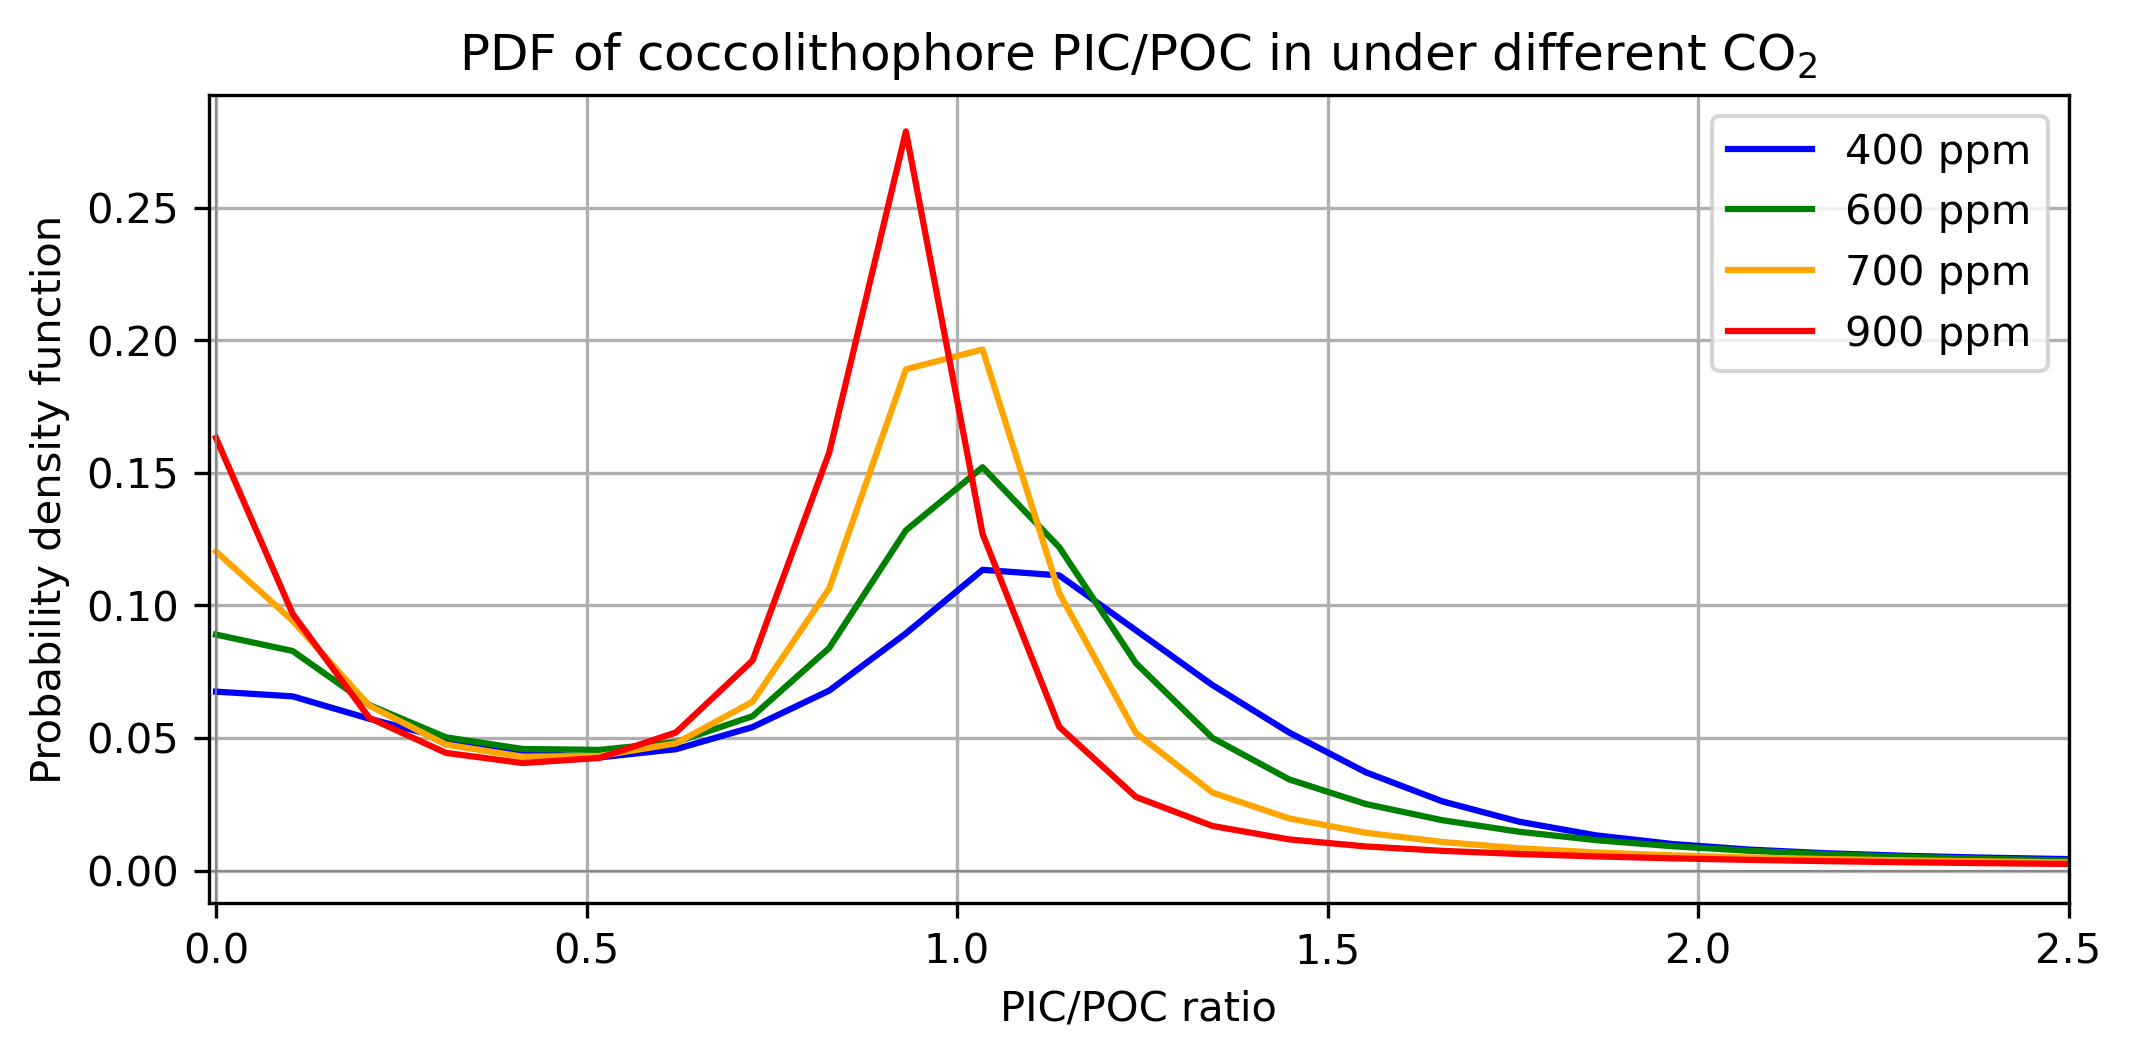

In [12]:
normalizations={}
ntime=0; OFFSET=1
t_range=np.linspace(0,3,30)
annual_PDF = np.empty((12,30))
final_PDF = {}

for case in CASES:
    final_PDF[case]=np.empty((12,30)) # month by t_range, than average by months 
    for ntime in range(12): # IF WE ARE GOING TO DO MONTHLY VALUES, WILL COMMIT TO DOING THIS FOR EVERY CASE 
      annual_PDF[ntime,:]=picpoc_kde[case][ntime](t_range)
      normalize = np.nansum(annual_PDF[0,:])**-1
      #annual_PDF[ntime,:] = annual_PDF[ntime+OFFSET,:]#*normalize
      normalizations[case] = normalize
    

#for case in CASES:
#    normalize = np.nansum(picpoc_kde[case][0](t_range))**-1
#    normalizations[case]=normalize
#plt.plot(t_range,picpoc_kde_MAA[0](t_range)*normalize,label='end-Maastrichtian \n$CO_{2}$=850 ppm')

case1 = CASES[0]
case2=CASES[1]
case3=CASES[2]
case4=CASES[3]
case5=CASES[4]

labels={}; colors = {}
labels[case1] = '284 ppm'; colors[case1]='grey'
labels[case2] = '400 ppm'; colors[case2]='blue'
labels[case3] = '600 ppm'; colors[case3]='green'
labels[case4] = '700 ppm'; colors[case4]='orange'
labels[case5] = '900 ppm'; colors[case5]='red'

MAX_NORMALIZATION = np.nanmax([normalizations[case1],normalizations[case2],normalizations[case3],normalizations[case4],normalizations[case5]])

#annual_PDF = np.nanmean(annual_PDF,axis=0) # time average now
#annual_PDF=annual_PDF[0]*normalizations['PI'] * (MAX_NORMALIZATION/normalizations['PI']) 
#plt.plot(t_range,annual_PDF,label='pre-industrial\n$CO_{2}$=284 ppm')

mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=[8,3.5])

finalPDF = {}
for case in CASES[1:]:
    final_PDF[case] = []
    for ntime in range(12):
        normalize=normalizations[case] * (MAX_NORMALIZATION/normalizations[case]) 
        final_PDF[case].append(picpoc_kde[case][ntime](t_range)*normalize)
    plotPDF = np.nanmean(final_PDF[case],axis=0) # annual average (given that there are 12 months)
    plt.plot(t_range,plotPDF,label=labels[case],color=colors[case])

#normalize=normalizations['CORE'] * (MAX_NORMALIZATION/normalizations['CORE']) 
#plt.plot(t_range,picpoc_kde[case][0](t_range)*normalize,label='CORE-IAF\n$CO_{2}$=284 ppm')


plt.title('PDF of coccolithophore PIC/POC in under different CO$_2$')# \n Month '+str(ntime+1))
plt.xlabel('PIC/POC ratio'); plt.ylabel('Probability density function')
plt.axvline(0,color='grey',linewidth=0.4);
plt.axhline(0,color='grey',linewidth=0.4)

plt.xlim([-0.01,2.5])
plt.grid()
plt.legend(loc='best')
plt.savefig('GMD24_figs/Figure7.eps')
plt.savefig('GMD24_figs/Figure7.png')
plt.show()

In [4]:
# biome map# left off by copying over everything in biome_analysis - need to change case names before running


def pop_add_cyclic(ds): # pass an xarray object into this
    nj = ds.TLAT.shape[0] # size of POP grid
    ni = ds.TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        print('\n')
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        print('\n')
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})
    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)
    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})     
    return dso



In [5]:

EINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINHPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
EINH20XPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

EINHPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
EINH20XPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'

CASES=[EINH0_PICPOC,EINHPI_PICPOC,EINH20XPI_PICPOC,EINHPI_NOPICPOC,EINH20XPI_NOPICPOC]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]


In [5]:
# create biome based map with total NPP and cocco NPP
extract=nc4.Dataset('/glade/work/jcoupe/misc_files/fay_biomes_POP.nc','r')
meanMask = extract.variables['fay_biomes'][:].T

CASES=[EINHPI_PICPOC,EINH20XPI_PICPOC] # cases with picpoc scaling turned on and co2 set to 284 ppm
cesm_ds={}
for case in CASES: # cycle through cases as defined above 
  cesm_mon_ds=xr.open_mfdataset(files_h0[case][0:12],combine='nested',concat_dim='time')#,decode_times=False,decode_coords=False, concat_dim='time')
  coords = {'x':'TLONG','y':'TLAT'}
  keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
  vars = ['photoC_diat_zint','photoC_diaz_zint','photoC_sp_zint','photoC_cocco_zint','photoC_TOT_zint']
  keepthese = keepthese+vars
  keep_vars = keepthese +list(coords.values())+['dz','KMT']
  cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
  covered = np.zeros((384,320))
  # filter out for biomes here, before we pop_addcyclic? 
  #cesm_mon_ds[var] = cesm_mon_ds[var]
  for var in vars:
      for BIOME_NUMBER in range(1,18): # biomes 1 to 17
          TAREA_biome = np.array(cesm_mon_ds['TAREA'][0]*(100**-2)) # meters squared
          TAREA_biome[meanMask!=BIOME_NUMBER] = 0
          covered[meanMask!=BIOME_NUMBER] = 1 # 1 means this gridpoint has been covered, 0 means not. becomes reelvant at teh end.
          TOT_AREA = np.nansum(TAREA_biome)
          mo_avg_var=[] # for temp use in loop, will average together after loop
          for t in range(12): # go through all 12 months 
              temp=np.nansum(cesm_mon_ds[var][t].values*(TAREA_biome*TOT_AREA**-1))
              #mo_avg_var.append(np.average(np.array(cesm_mon_ds[var][t].values),weights=TAREA_biome))
              mo_avg_var.append(temp)
              #print(mo_avg_var[-1])
          annual_avg_var = np.nanmean(mo_avg_var) # should be dimension (12) --> (1) # time average value 
          # now assign annual_avg_var everywhere that cesm_mon_ds[var] is a certain value
          temp = cesm_mon_ds[var][0].values
          temp[meanMask==BIOME_NUMBER] = annual_avg_var #assign places within the BIOME the annual_avg_var !!
          cesm_mon_ds[var][0] = temp #replace first time step ?
      temp = cesm_mon_ds[var][0].values
      temp[covered==0]= 0.0 # set anything not covered by the biome map to 0.0 
      temp[np.isnan(meanMask)]=0.0 # zero out anything not on the grid
      cesm_mon_ds[var][0]=temp
      cesm_ds[case] = pop_add_cyclic(cesm_mon_ds) #pop_add_cyclic after all of this is over 


In [17]:
np.shape(cesm_mon_ds['TLAT'])
np.shape(cesm_ds[EINHPI_PICPOC][var])

(12, 384, 321)

/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:34: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:34: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:47: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:47: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/1248440516.py:58: RuntimeWarning: invalid v

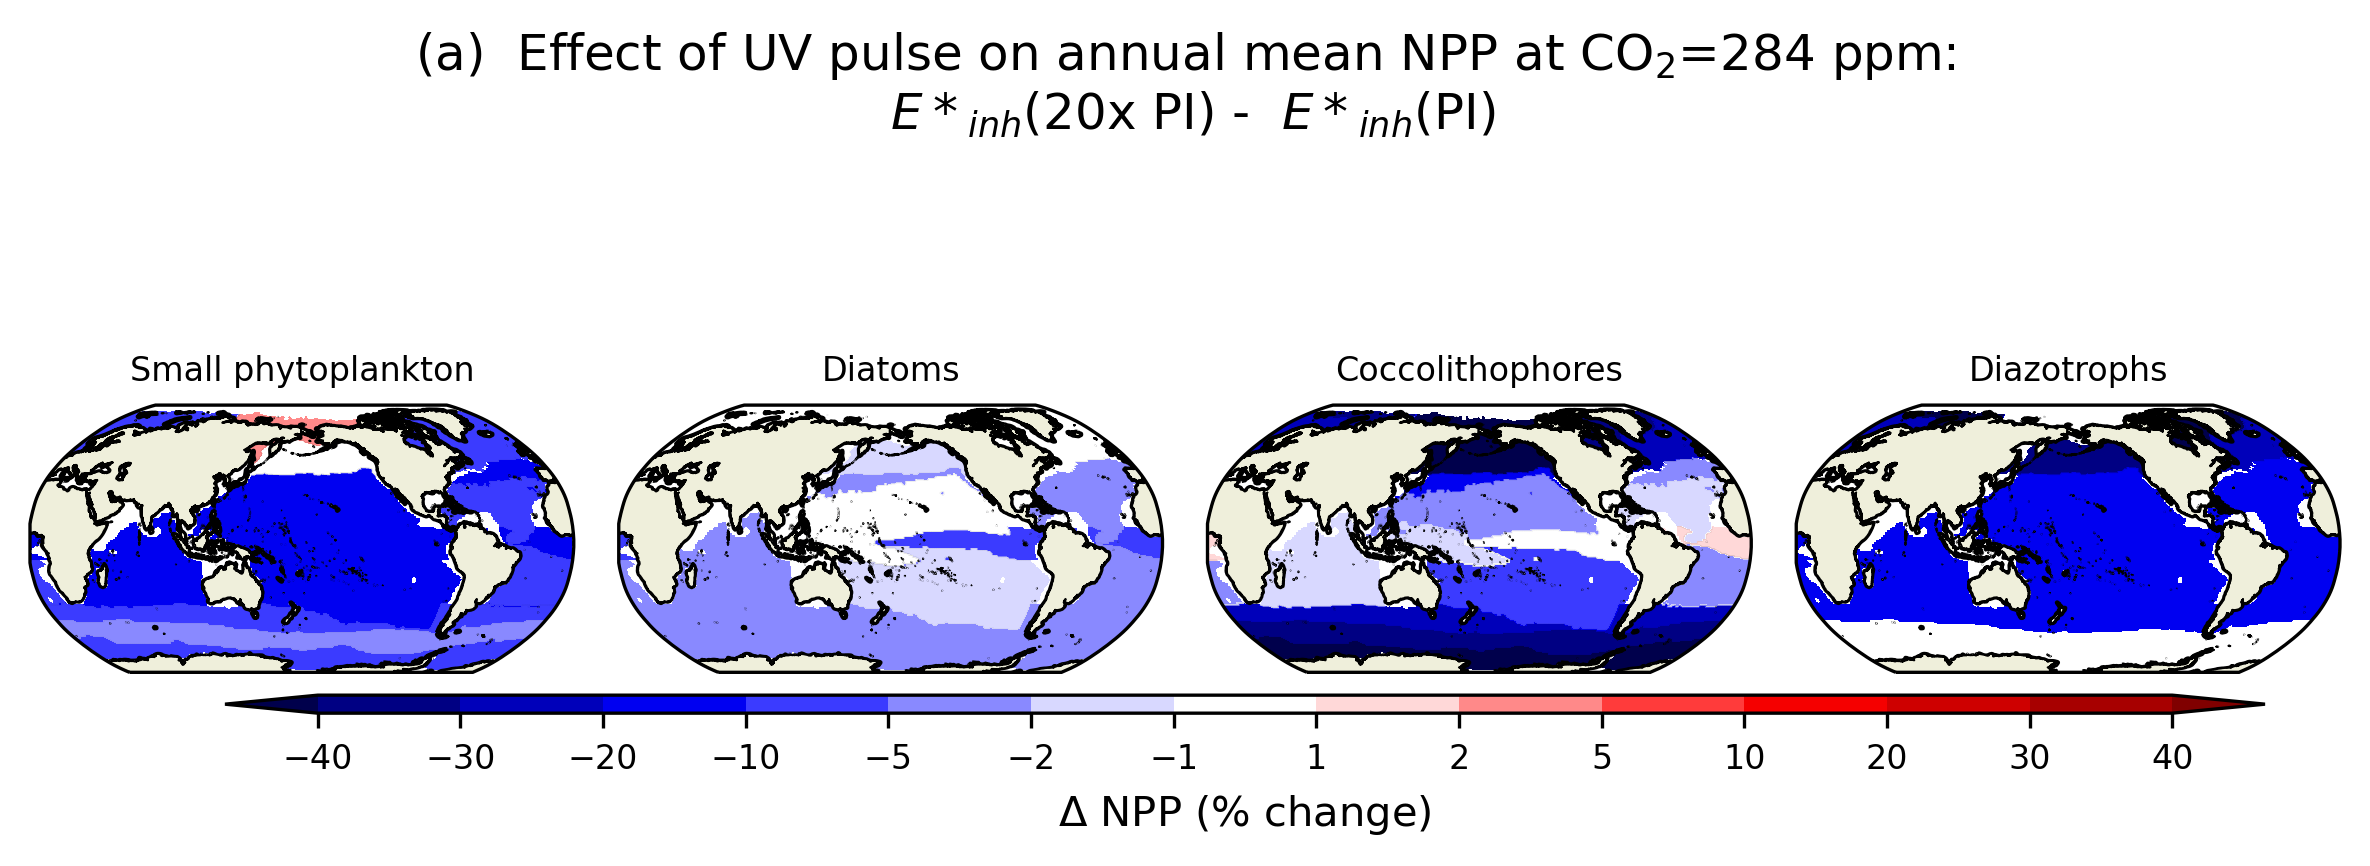

In [6]:

def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries=np.array(np.linspace(0,12,12))*10
boundaries = np.array([-40,-30,-20,-10,-5,-2,-1,1,2,5,10,20,30,40])


colors_diff = get_colors('seismic',14,add_white=7)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
scale_factor=1
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    HALOGEN = np.array(cesm_ds[EINH20XPI_PICPOC][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_PICPOC][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-180))) 
    fig.suptitle('(a)  Effect of UV pulse on annual mean NPP at CO$_2$=284 ppm:\n $E*_{inh}$(20x PI) -  $E*_{inh}$(PI)')
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    HALOGEN = np.array(cesm_ds[EINH20XPI_PICPOC][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_PICPOC][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    HALOGEN = np.array(cesm_ds[EINH20XPI_PICPOC][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_PICPOC][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    HALOGEN = np.array(cesm_ds[EINH20XPI_PICPOC][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_PICPOC][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    plt.savefig('GMD24_figs/Figure8a.eps')
    plt.savefig('GMD24_figs/Figure8a.png')
    plt.show()

    #### NEW PLOT IDEA: SHOW ACTUAL NPP OF PI AND SHOW ANOMALY IN E*INH PI !!!!! ( DELTA OF HALOGEN - PI % CHANGE )
    

In [12]:
case

'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinPI_900ppm'

In [13]:
# effect of UV pulse at CO2 = 900 ppm

EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
# replace with new derecho simulations:
EINHX20_DATM_CNL_4P2Z_900PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_400ppm'
EINHX20_DATM_CNL_4P2Z_284PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

EINHPI_DATM_CNL_4P2Z_900PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI_900ppm'


EINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINHPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
EINH20XPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

EINHPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
EINH20XPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'

CASES=[EINH0_PICPOC,EINHPI_PICPOC,EINH20XPI_PICPOC,EINHPI_NOPICPOC,EINH20XPI_NOPICPOC,EINHX20_DATM_CNL_4P2Z_900PPM,EINHPI_DATM_CNL_4P2Z_900PPM]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]


extract=nc4.Dataset('/glade/work/jcoupe/misc_files/fay_biomes_POP.nc','r')
meanMask = extract.variables['fay_biomes'][:].T

CASES=[EINHPI_DATM_CNL_4P2Z_900PPM,EINHX20_DATM_CNL_4P2Z_900PPM] # effect of UV pulse at 900 ppm
cesm_ds={}
for case in CASES: # cycle through cases as defined above 
  cesm_mon_ds=xr.open_mfdataset(files_h0[case][0:12],combine='nested',concat_dim='time')#,decode_times=False,decode_coords=False, concat_dim='time')
  coords = {'x':'TLONG','y':'TLAT'}
  keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
  vars = ['photoC_diat_zint','photoC_diaz_zint','photoC_sp_zint','photoC_cocco_zint','photoC_TOT_zint']
  keepthese = keepthese+vars
  keep_vars = keepthese +list(coords.values())+['dz','KMT']
  cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
  covered = np.zeros((384,320))
  # filter out for biomes here, before we pop_addcyclic? 
  #cesm_mon_ds[var] = cesm_mon_ds[var]
  for var in vars:
      for BIOME_NUMBER in range(1,18): # biomes 1 to 17
          TAREA_biome = np.array(cesm_mon_ds['TAREA'][0]*(100**-2)) # meters squared
          TAREA_biome[meanMask!=BIOME_NUMBER] = 0
          covered[meanMask!=BIOME_NUMBER] = 1 # 1 means this gridpoint has been covered, 0 means not. becomes reelvant at teh end.
          TOT_AREA = np.nansum(TAREA_biome)
          mo_avg_var=[] # for temp use in loop, will average together after loop
          for t in range(12): # go through all 12 months 
              temp=np.nansum(cesm_mon_ds[var][t].values*(TAREA_biome*TOT_AREA**-1))
              #mo_avg_var.append(np.average(np.array(cesm_mon_ds[var][t].values),weights=TAREA_biome))
              mo_avg_var.append(temp)
              #print(mo_avg_var[-1])
          annual_avg_var = np.nanmean(mo_avg_var) # should be dimension (12) --> (1) # time average value 
          # now assign annual_avg_var everywhere that cesm_mon_ds[var] is a certain value
          temp = cesm_mon_ds[var][0].values
          temp[meanMask==BIOME_NUMBER] = annual_avg_var #assign places within the BIOME the annual_avg_var !!
          cesm_mon_ds[var][0] = temp #replace first time step ?
      temp = cesm_mon_ds[var][0].values
      temp[covered==0]= 0.0 # set anything not covered by the biome map to 0.0 
      temp[np.isnan(meanMask)]=0.0 # zero out anything not on the grid
      cesm_mon_ds[var][0]=temp
      cesm_ds[case] = pop_add_cyclic(cesm_mon_ds) #pop_add_cyclic after all of this is over 


/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:35: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:35: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:48: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:48: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:59: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1285060748.py:59: RuntimeWarning: invalid v

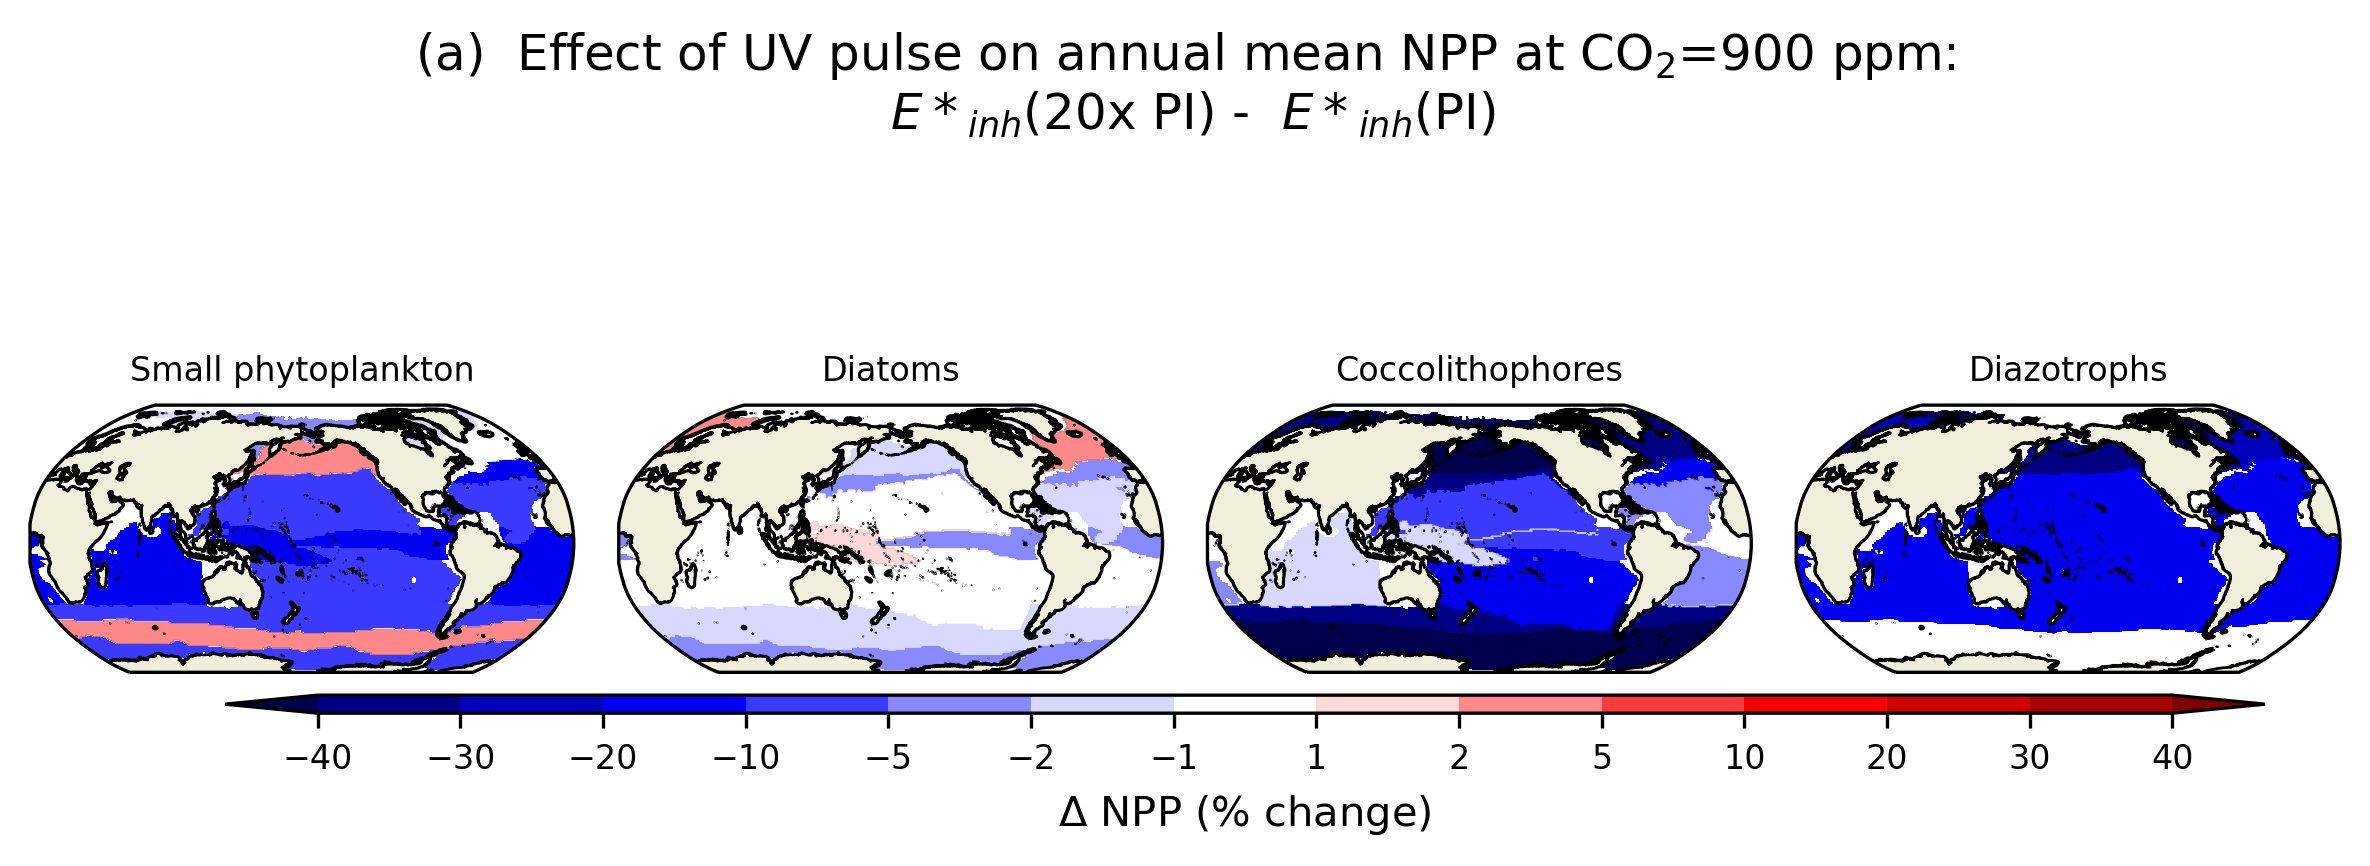

In [14]:

def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries=np.array(np.linspace(0,12,12))*10
boundaries = np.array([-40,-30,-20,-10,-5,-2,-1,1,2,5,10,20,30,40])


colors_diff = get_colors('seismic',14,add_white=7)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
scale_factor=1
#[EINHPI_DATM_CNL_4P2Z_900PPM,EINHX20_DATM_CNL_4P2Z_900PPM
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-180))) 
    fig.suptitle('(a)  Effect of UV pulse on annual mean NPP at CO$_2$=900 ppm:\n $E*_{inh}$(20x PI) -  $E*_{inh}$(PI)')
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHPI_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    plt.show()



In [6]:
EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
# replace with new derecho simulations:
EINHX20_DATM_CNL_4P2Z_900PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_400ppm'
EINHX20_DATM_CNL_4P2Z_284PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'
files={}; files_h0={}
    

#CASES=[EINHX20_DATM_CNL_4P2Z_284PPM,EINH20x_DATM_CNL_PICPOC04c_4P2Z]
#OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
#for case in CASES:
#    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
#    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


CASES=[EINHX20_DATM_CNL_4P2Z_284PPM,EINHX20_DATM_CNL_4P2Z_400PPM,EINHX20_DATM_CNL_4P2Z_900PPM]
OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/' # need this for newest simulations
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))



# get data # create biome based map with total NPP and cocco NPP
extract=nc4.Dataset('/glade/work/jcoupe/misc_files/fay_biomes_POP.nc','r')
meanMask = extract.variables['fay_biomes'][:].T

#CASES=[EINHX20_DATM_CNL_4P2Z_284PPM,EINH20x_DATM_CNL_PICPOC04c_4P2Z,EINHX20_DATM_CNL_4P2Z_900PPM]
CASES=[EINHX20_DATM_CNL_4P2Z_284PPM,EINHX20_DATM_CNL_4P2Z_400PPM,EINHX20_DATM_CNL_4P2Z_900PPM]
cesm_ds={}
for case in CASES: # cycle through cases as defined above 
  cesm_mon_ds=xr.open_mfdataset(files_h0[case][0:12],combine='nested',concat_dim='time')#,decode_times=False,decode_coords=False, concat_dim='time')
  coords = {'x':'TLONG','y':'TLAT'}
  keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK']
  vars = ['photoC_diat_zint','photoC_diaz_zint','photoC_sp_zint','photoC_cocco_zint','photoC_TOT_zint']
  keepthese = keepthese+vars
  keep_vars = keepthese +list(coords.values())+['dz','KMT']
  cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])
  covered = np.zeros((384,320))
  # filter out for biomes here, before we pop_addcyclic? 
  #cesm_mon_ds[var] = cesm_mon_ds[var]
  for var in vars:
      for BIOME_NUMBER in range(1,18): # biomes 1 to 17
          TAREA_biome = np.array(cesm_mon_ds['TAREA'][0]*(100**-2)) # meters squared
          TAREA_biome[meanMask!=BIOME_NUMBER] = 0
          covered[meanMask!=BIOME_NUMBER] = 1 # 1 means this gridpoint has been covered, 0 means not. becomes reelvant at teh end.
          TOT_AREA = np.nansum(TAREA_biome)
          mo_avg_var=[] # for temp use in loop, will average together after loop
          for t in range(12): # go through all 12 months 
              temp=np.nansum(cesm_mon_ds[var][t].values*(TAREA_biome*TOT_AREA**-1))
              #mo_avg_var.append(np.average(np.array(cesm_mon_ds[var][t].values),weights=TAREA_biome))
              mo_avg_var.append(temp)
              #print(mo_avg_var[-1])
          annual_avg_var = np.nanmean(mo_avg_var) # should be dimension (12) --> (1) # time average value 
          # now assign annual_avg_var everywhere that cesm_mon_ds[var] is a certain value
          temp = cesm_mon_ds[var][0].values
          temp[meanMask==BIOME_NUMBER] = annual_avg_var #assign places within the BIOME the annual_avg_var !!
          cesm_mon_ds[var][0] = temp #replace first time step ?
      temp = cesm_mon_ds[var][0].values
      temp[covered==0]= 0.0 # set anything not covered by the biome map to 0.0 
      temp[np.isnan(meanMask)]=0.0 # zero out anything not on the grid
      cesm_mon_ds[var][0]=temp
      cesm_ds[case] = pop_add_cyclic(cesm_mon_ds) #pop_add_cyclic after all of this is over 


/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:39: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:39: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:52: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:52: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_57002/2435671957.py:63: RuntimeWarning: invalid v

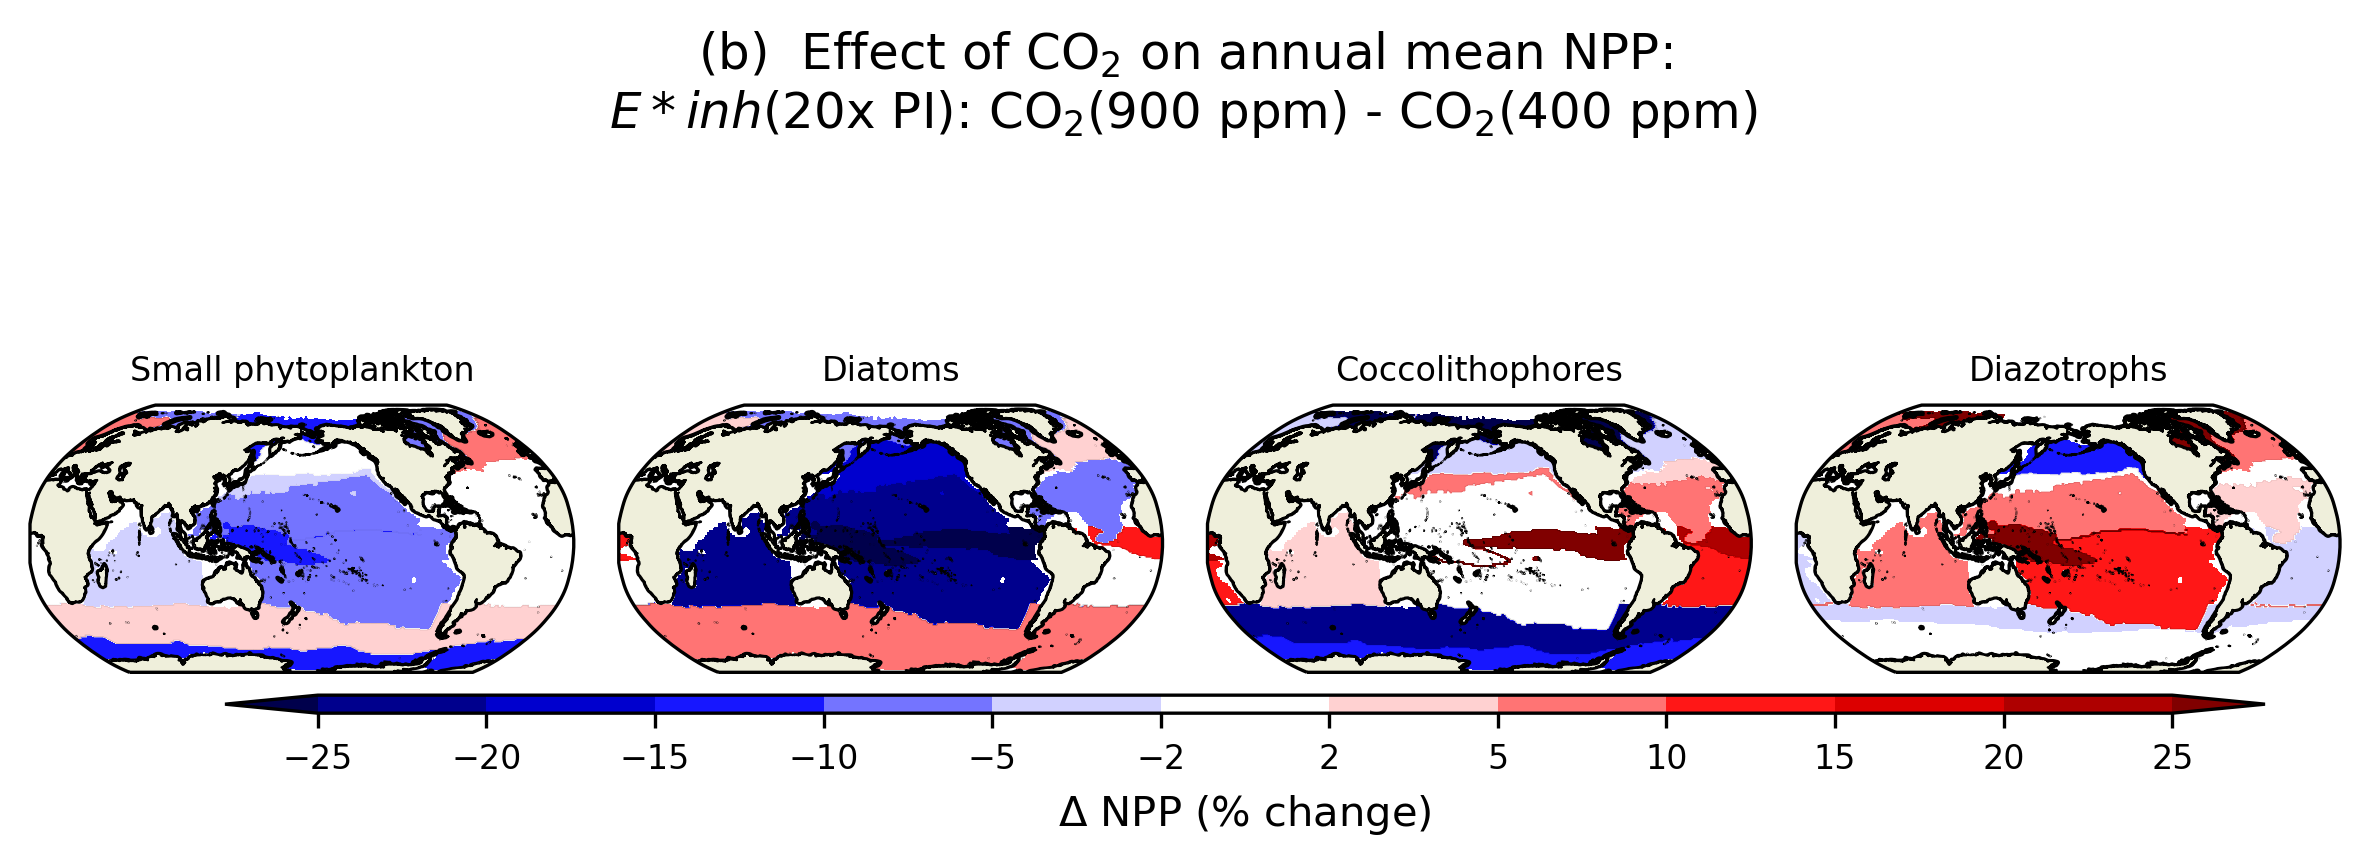

In [12]:
# uses: cases both have pic/poc scaling but different co2


def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries=np.array(np.linspace(0,12,12))*10
boundaries = np.array([-25,-20,-15,-10,-5,-2,2,5,10,15,20,25])


colors_diff = get_colors('seismic',12,add_white=6)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
#EINHX20_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'
#EINH20x_DATM_CNL_PICPOC04c_4P2Z = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'
#EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_400PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-180))) 
    fig.suptitle('(b)  Effect of CO$_2$ on annual mean NPP:\n$E*{inh}$(20x PI): CO$_2$(900 ppm) - CO$_2$(400 ppm) ')
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_400PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_400PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_400PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); plt.show()

    #### NEW PLOT IDEA: SHOW ACTUAL NPP OF PI AND SHOW ANOMALY IN E*INH PI !!!!! ( DELTA OF HALOGEN - PI % CHANGE )
    

/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:40: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:40: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:53: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:53: RuntimeWarning: invalid value encountered in multiply
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  diff_both = diff_both * REGULAR**-1*100
/glade/derecho/scratch/jcoupe/tmp/ipykernel_18016/1808899028.py:64: RuntimeWarning: invalid v

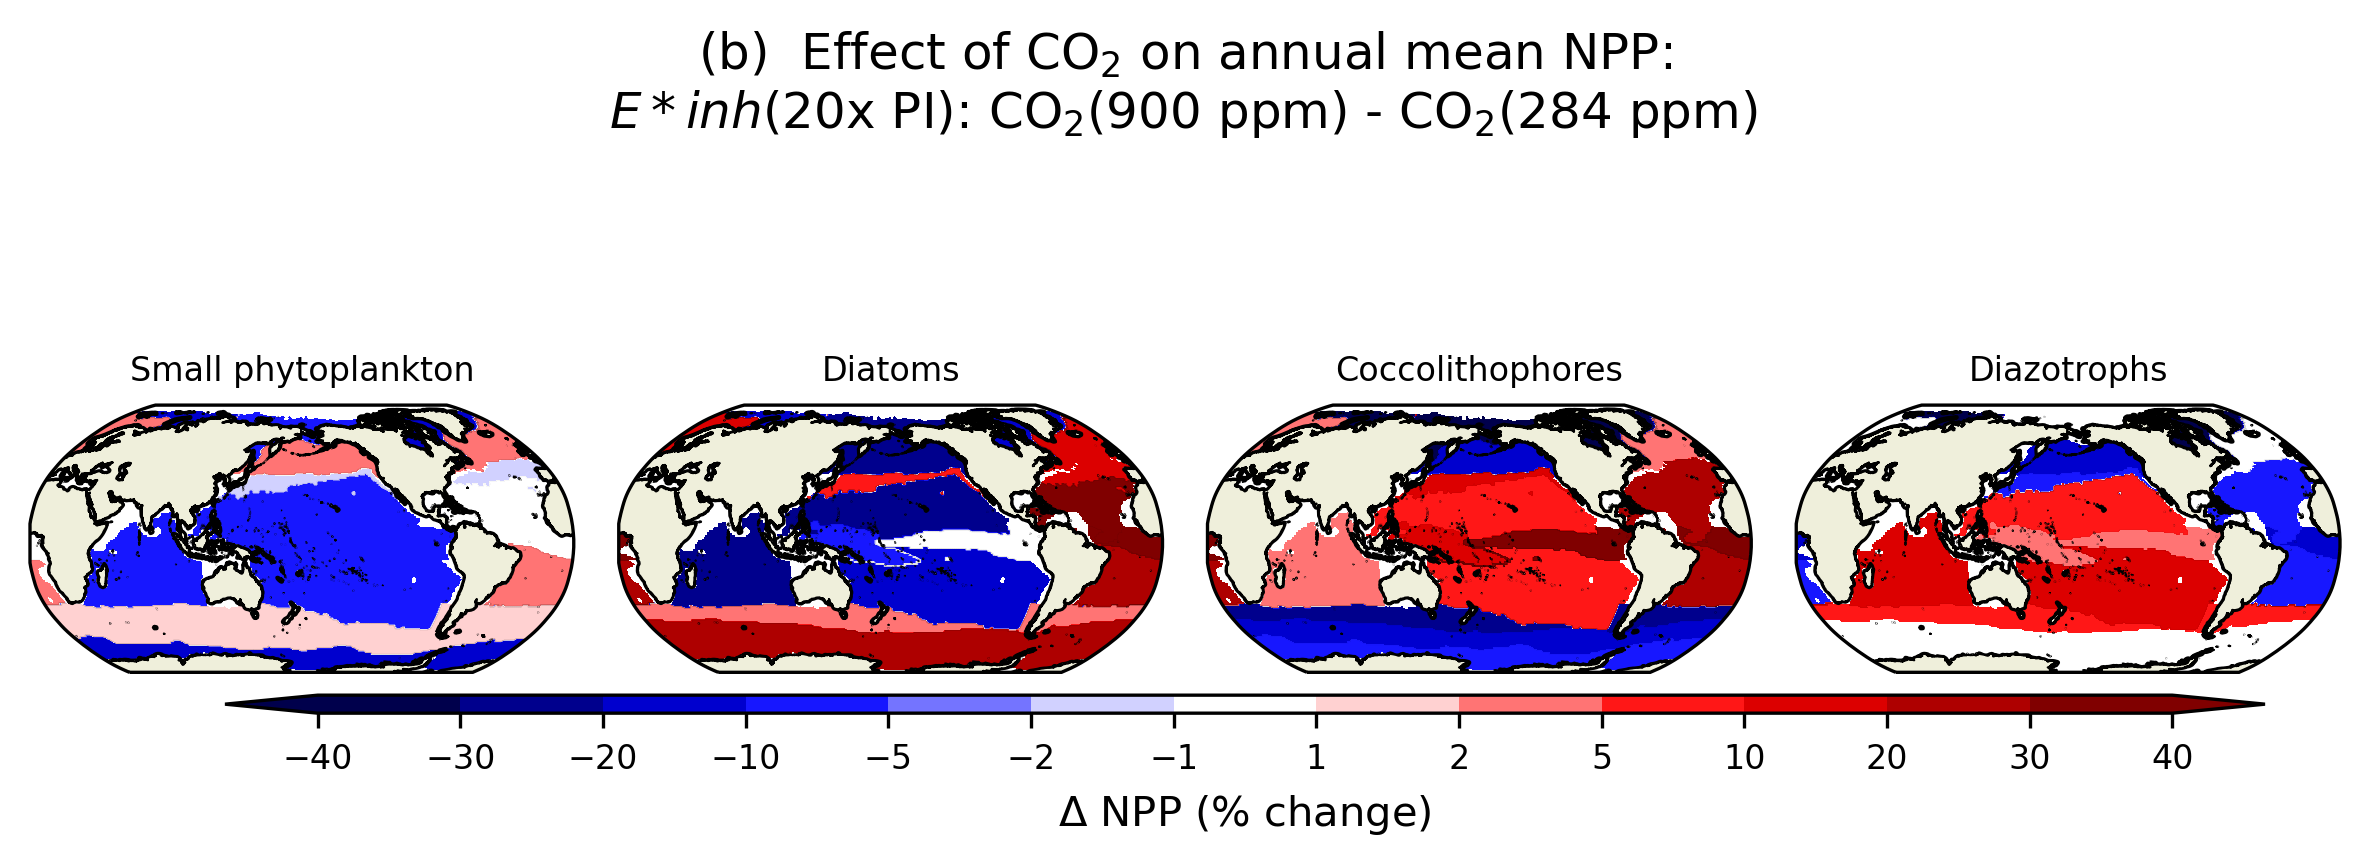

In [7]:
#EINHX20_DATM_CNL_4P2Z_400PPM # that's crazy


def get_colors(string,num,add_white = -1):
    #from pylab import *; 
    cmap = cm.get_cmap(string, num)    # PiYG
    colors=[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
        colors.append(str(matplotlib.colors.rgb2hex(rgb))) 
    if add_white != -1:
        colors.insert(add_white,'#FFFFFF')
    return colors

scale_factor = 12*1e-2*1e-3 *86400
boundaries=np.array(np.linspace(0,12,12))*10
boundaries = np.array([-25,-20,-15,-10,-5,-2,2,5,10,15,20,25])
boundaries = np.array([-40,-30,-20,-10,-5,-2,-1,1,2,5,10,20,30,40])


colors_diff = get_colors('seismic',12,add_white=6)
cmap = mpl.colors.ListedColormap(colors_diff, "")


land_object=cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='k',linewidth=0.5,
                                    facecolor=cartopy.feature.COLORS['land'])

scale_factor = 1e-2*86400*365*1e-3
scale_factor = 12*1e-2*1e-3*86400*365
#EINHX20_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'
#EINH20x_DATM_CNL_PICPOC04c_4P2Z = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'
#EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
from cartopy.util import add_cyclic_point
if True: #EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z
    var='photoC_sp_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_284PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100; #diff_both = np.subtract(diff1,diff2)
    TLONG = cesm_ds[CASES[0]]['TLONG']; TLAT = cesm_ds[CASES[0]]['TLAT']
    fig,(ax,ax2,ax3,ax4)= plt.subplots(1,4,figsize =(8,3),facecolor='w',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-180))) 
    fig.suptitle('(b)  Effect of CO$_2$ on annual mean NPP:\n$E*{inh}$(20x PI): CO$_2$(900 ppm) - CO$_2$(284 ppm) ')
    
    pc1=ax.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax.coastlines(); ax.add_feature(land_object)
    ax.set_title('Small phytoplankton',fontsize=8)
    var='photoC_diat_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_284PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc2=ax2.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax2.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax2.coastlines(); ax2.add_feature(land_object)
    ax2.set_title('Diatoms',fontsize=8)

    
    var='photoC_cocco_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_284PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc3=ax3.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax3.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax3.coastlines(); ax3.add_feature(land_object)
    ax3.set_title('Coccolithophores',fontsize=8)
    
    var='photoC_diaz_zint'
    HALOGEN = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_900PPM][var][0]*scale_factor)
    REGULAR = np.array(cesm_ds[EINHX20_DATM_CNL_4P2Z_284PPM][var][0]*scale_factor)
    diff_both = HALOGEN-REGULAR
    diff_both = diff_both * REGULAR**-1*100
    pc4=ax4.contourf(TLONG,TLAT,diff_both,colors=colors_diff,levels=boundaries,transform=ccrs.PlateCarree(),extend='both')
    ax4.contour(TLONG,TLAT,diff_both,colors='k',levels=boundaries,transform=ccrs.PlateCarree(),linewidths=0.01)
    ax4.coastlines(); ax4.add_feature(land_object)
    ax4.set_title('Diazotrophs',fontsize=8)
    
    position = fig.add_axes([0.10,0.22,0.85,0.02])
    cbar1 = fig.colorbar(pc1,extend='both',cax=position,orientation='horizontal')#,norm=mpl.colors.BoundaryNorm(boundaries,ncolors=len(boundaries)-1,clip=False))
    cbar1.ax.tick_params(labelsize=8)
    cbar1.set_ticks(boundaries)
    cbar1.set_label('$\Delta$ NPP (% change)');#cbar1.set_label('g C $yr^{-1}$')
    fig.tight_layout(); 
    plt.savefig('GMD24_figs/Figure8b.eps')
    plt.savefig('GMD24_figs/Figure8b.png')
    plt.show()

    #### NEW PLOT IDEA: SHOW ACTUAL NPP OF PI AND SHOW ANOMALY IN E*INH PI !!!!! ( DELTA OF HALOGEN - PI % CHANGE )
    

In [12]:
ANNUAL_MEAN_LINES=False
EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
# replace with new derecho simulations:
EINHX20_DATM_CNL_4P2Z_900PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_900ppm'
EINHX20_DATM_CNL_4P2Z_400PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_400ppm'
EINHX20_DATM_CNL_4P2Z_284PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'
EINHPI_DATM_CNL_4P2Z_900PPM = 'CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI_900ppm'

EINH0_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINHPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_EinhPI'
EINH20XPI_PICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

EINHPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
EINH20XPI_NOPICPOC='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'

CASES=[EINH0_PICPOC,EINHPI_PICPOC,EINH20XPI_PICPOC,EINHPI_NOPICPOC,EINH20XPI_NOPICPOC,EINHX20_DATM_CNL_4P2Z_900PPM,EINHPI_DATM_CNL_4P2Z_900PPM]

OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[:]

CASES=[EINHX20_DATM_CNL_4P2Z_900PPM,EINHX20_DATM_CNL_4P2Z_284PPM]

# calculate cocco NPP and all PFT NPP as a percentage of 20x pi 284 ppm npp
#CASE1 = EINH 20X PI 900 PPM 
#CASE2 = EINH 20X PI 284 PPM

for BIOME_NUMBER in range(16,17):
    extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
    TAREA = extract.variables['TAREA'][:]*(100**-2)
    TAREA_biome = TAREA
    TAREA_biome[meanMask!=BIOME_NUMBER] = 0 # set TAREA equal to 0 outside of the biomes 
    #TAREA_biome[meanMask==BIOME_NUMBER]=1 # set TAREA equal to 1 for everything outside of the biome limits
    #scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
    scale_factor=1e-3*12*1e-15*86400*365*1e-2
    data={}
    for case in CASES:
        #var='photoC_cocco_zint'
        data[case]={}
        VARS=['photoC_cocco_zint','photoC_diat_zint','photoC_sp_zint','photoC_diaz_zint']
        for var in VARS:
            data[case][var]=[]
        print(case)
        for fi in files_h0[case][:]:
            extract = nc4.Dataset(fi,'r')
            for var in VARS:
                if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                    tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA_biome,axis=2),axis=1)*scale_factor
                for t in range(len(tempdata)):
                    data[case][var].append(tempdata[t])


CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI_900ppm
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI


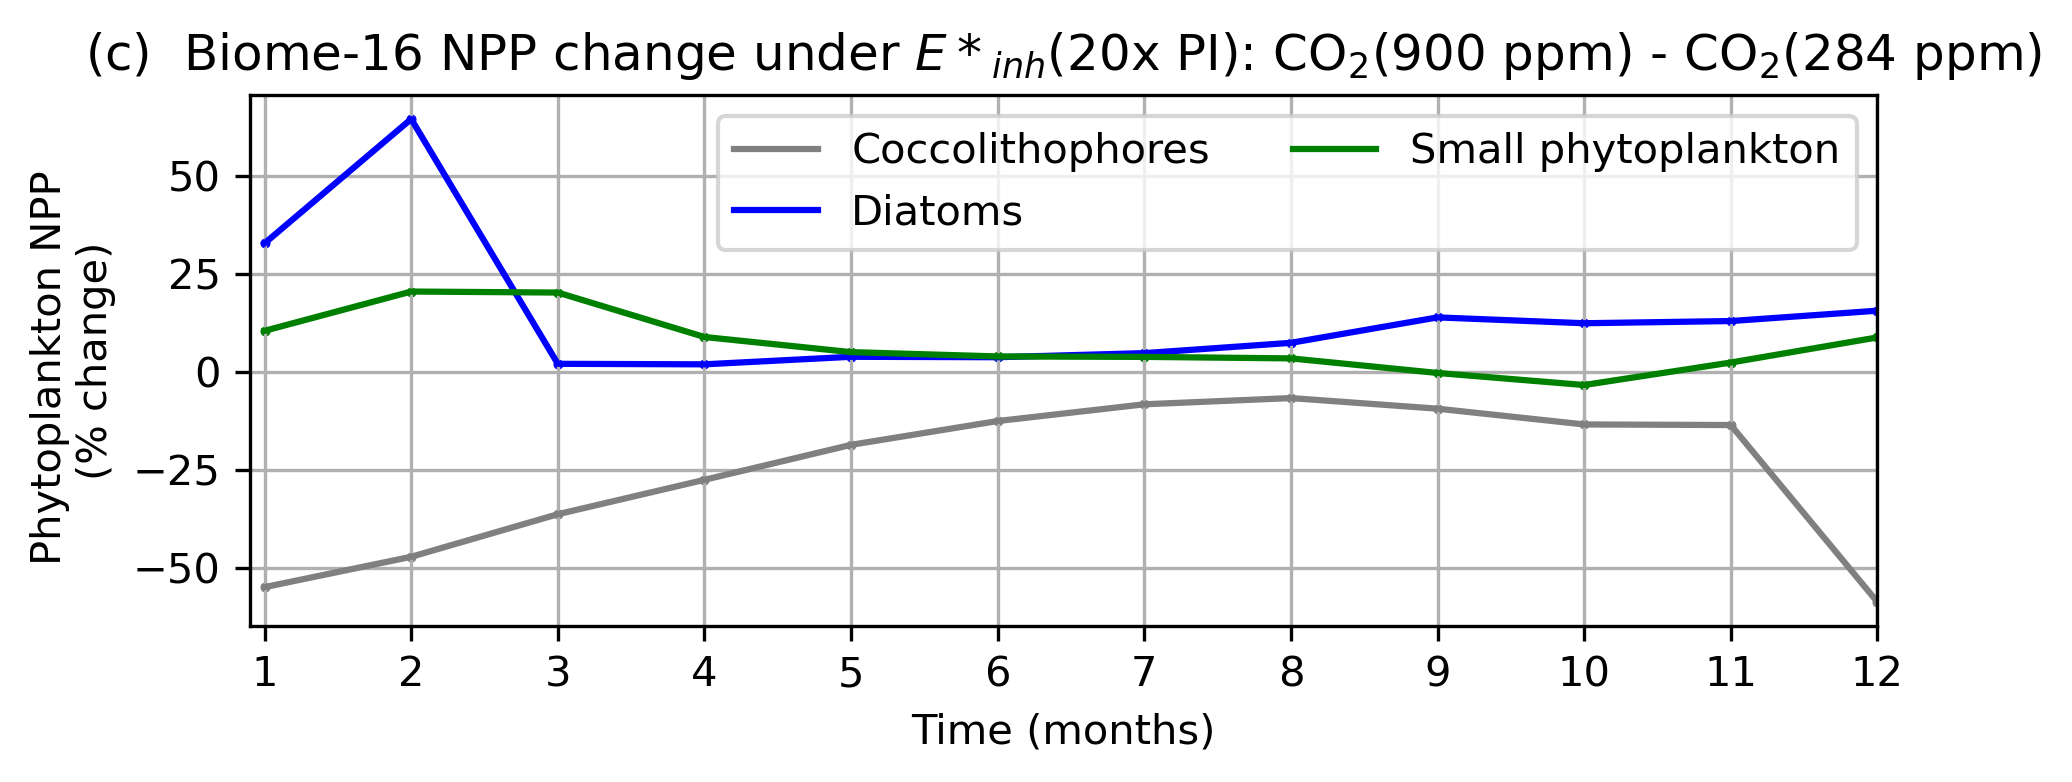

In [13]:
    # compare blooms - how are seasonal dynamics being influenced by inhibition of photosynthesis by UV radiation?
case_labels={}; case_colors={}
var='photoC_cocco_zint'; case_labels[var]='Coccolithophores'; case_colors[var]='grey'
var='photoC_sp_zint'; case_labels[var]='Small phytoplankton'; case_colors[var]='green'
var='photoC_diat_zint'; case_labels[var]='Diatoms'; case_colors[var]='blue'
var='photoC_diaz_zint'; case_labels[var]='Diazotrophs'; case_colors[var]='red'
VARS=['photoC_cocco_zint','photoC_diat_zint','photoC_sp_zint']
BIOME_NUMBER=16
if True:
        plt.figure(figsize=[7,2.3])
        for var in VARS:
            #case_label=case_labels[var]; case_color = case_colors[var]
            #plot_data = data[EINHX20_DATM_CNL_4P2Z_284PPM][var] - data[EINHX20_DATM_CNL_4P2Z_900PPM][var]
            plot_data=data[EINHX20_DATM_CNL_4P2Z_284PPM][var]
            CLIMO_MEAN = separate_by_month_arrays(plot_data) # output is 12 x 5 years 
            CLIMO_STD = np.nanstd(CLIMO_MEAN,axis=1) # 
            CLIMO_MEAN_284 = np.nanmean(CLIMO_MEAN,axis=1) 
            plot_data_284 = CLIMO_MEAN_284

            plot_data=data[EINHX20_DATM_CNL_4P2Z_900PPM][var]
            CLIMO_MEAN = separate_by_month_arrays(plot_data) # output is 12 x 5 years 
            CLIMO_STD = np.nanstd(CLIMO_MEAN,axis=1) # 
            CLIMO_MEAN_900 = np.nanmean(CLIMO_MEAN,axis=1) 
            plot_data_900 = CLIMO_MEAN_900
            plot_data = CLIMO_MEAN_900 - CLIMO_MEAN_284
            plot_data =(plot_data * CLIMO_MEAN_284**-1) * 100
            
            ts=np.linspace(1,len(plot_data),len(plot_data))
            plt.scatter(ts,plot_data,color=case_colors[var],s=2)
            plt.plot(ts,plot_data,case_colors[var],linestyle='-',label=case_labels[var])
        
        plt.title('(c)  Biome-'+str(BIOME_NUMBER)+' NPP change under $E*_{inh}$(20x PI): CO$_2$(900 ppm) - CO$_2$(284 ppm)'); plt.xlabel('Time (months)'); plt.ylabel('Phytoplankton NPP \n(% change)')
        props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
        #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
        plt.grid(); #plt.ylim([0,6]); 
        plt.xlim([0.9,12])
        plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
        plt.legend(loc='best',ncol=2); 
        plt.savefig('GMD24_figs/Figure8c.eps')
        plt.savefig('GMD24_figs/Figure8c.png')
        plt.show()


In [ ]:
# END OF MANUSCRIPT FIGURES #

# everything below here includes figures that didn't make the cut of the final manuscript.

In [82]:
# what happens when CO2 is increased to 900 ppm?


# load in biome mask
# open output file
#extract=nc4.Dataset('/glade/work/olivarez/cant/biomes/Time_Varying_Biomes.nc','r')
extract=nc4.Dataset('/glade/work/jcoupe/misc_files/fay_biomes_POP.nc','r')
meanMask = extract.variables['fay_biomes'][:].T
#mask = maskfile.transpose('lat', 'lon', 'year')
#meanMask = mask.MeanBiomes # use this mask
# biome 14 or 15 appears to be the southern ocean where plentiful coccolithophores exist 
# Cant_14_biome = Cant_2014.where(meanMask == 14)
# load in monthly cocco NPP across biomes for
# 0, pi, 20x pi radiation

# get data

# use these three cases - no PIC/POC scaling
#EINHPI_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI'
#EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
#EINH20X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'


EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'
CASES=[EINHX20_DATM_CNL_4P2Z_900PPM]
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


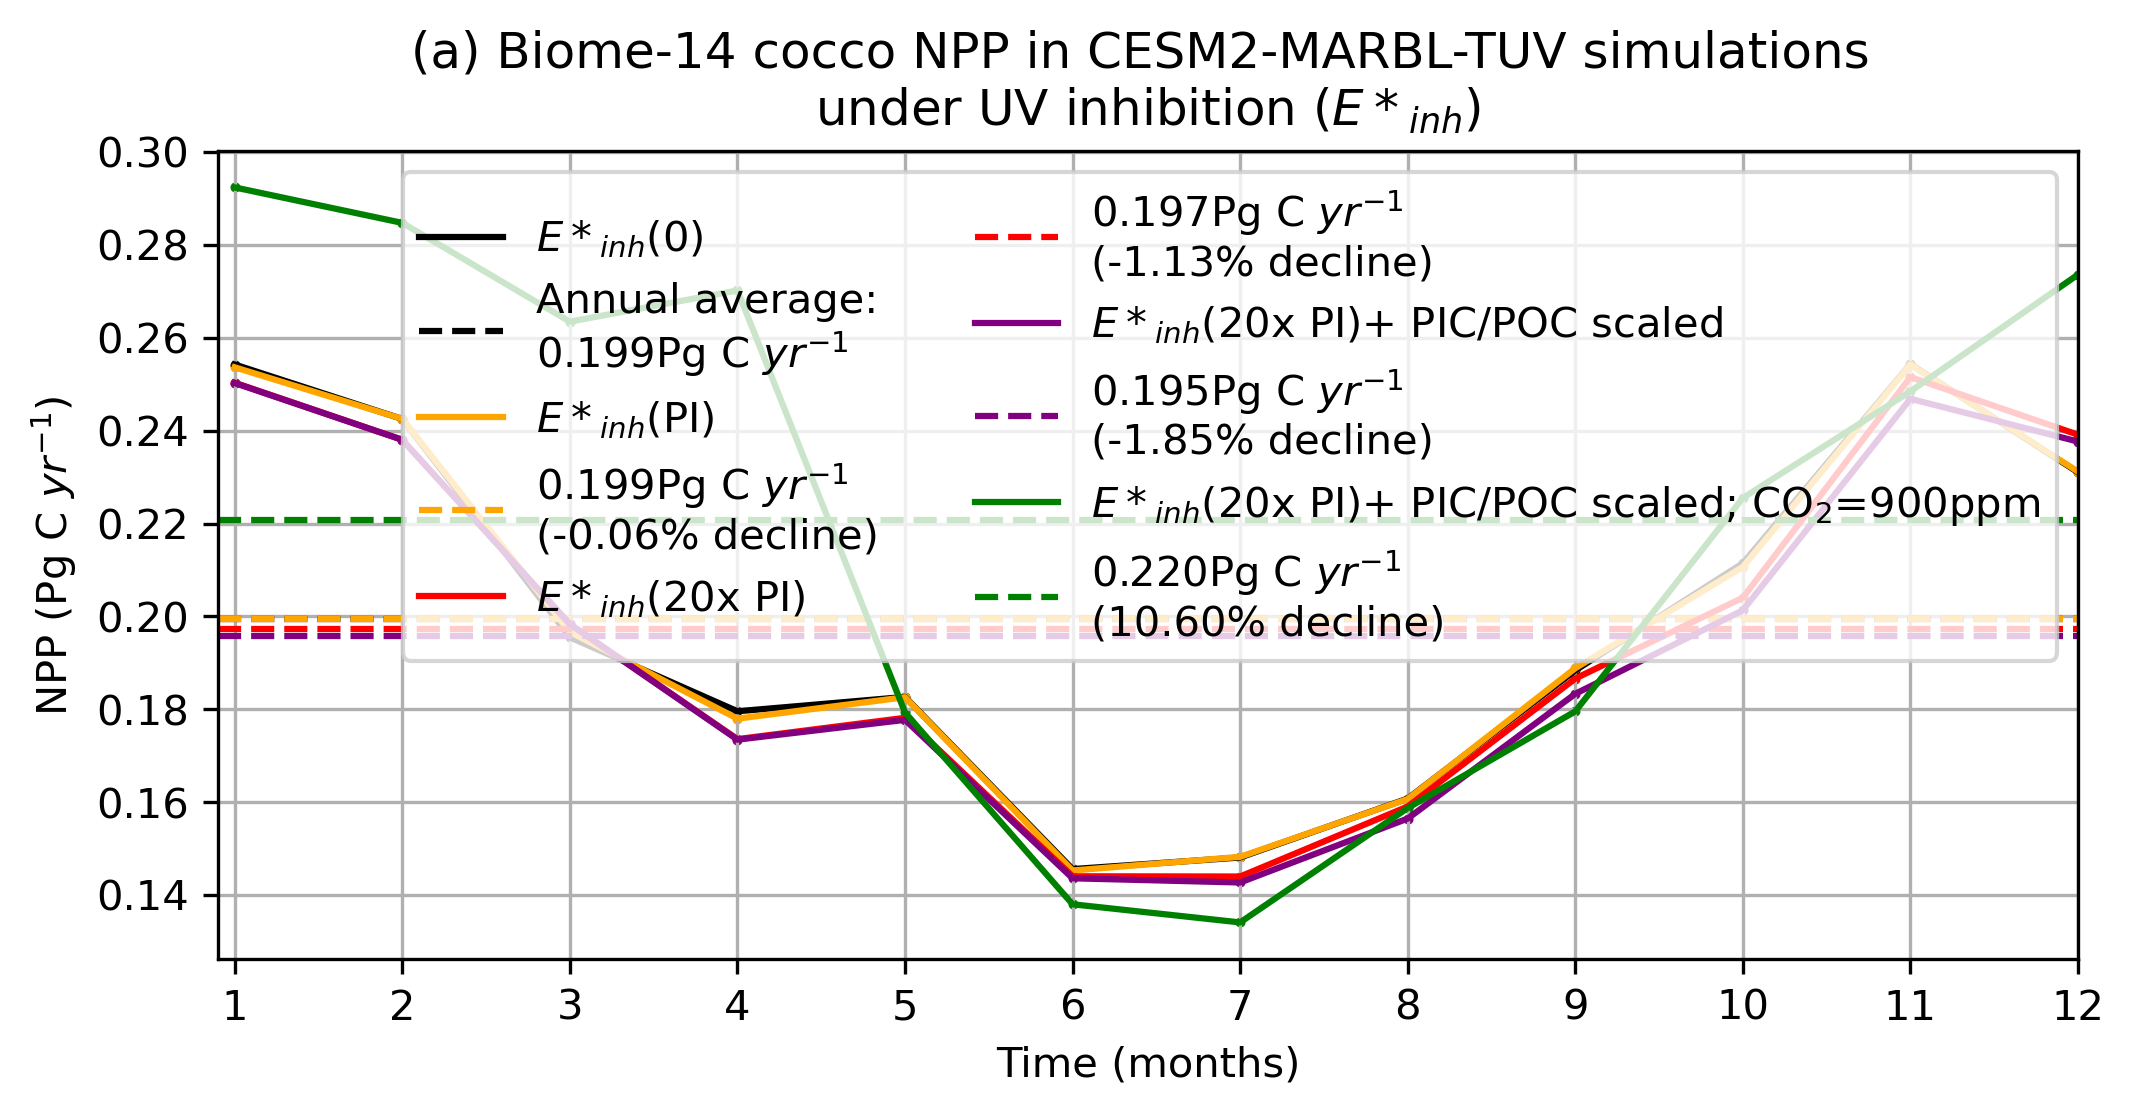

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


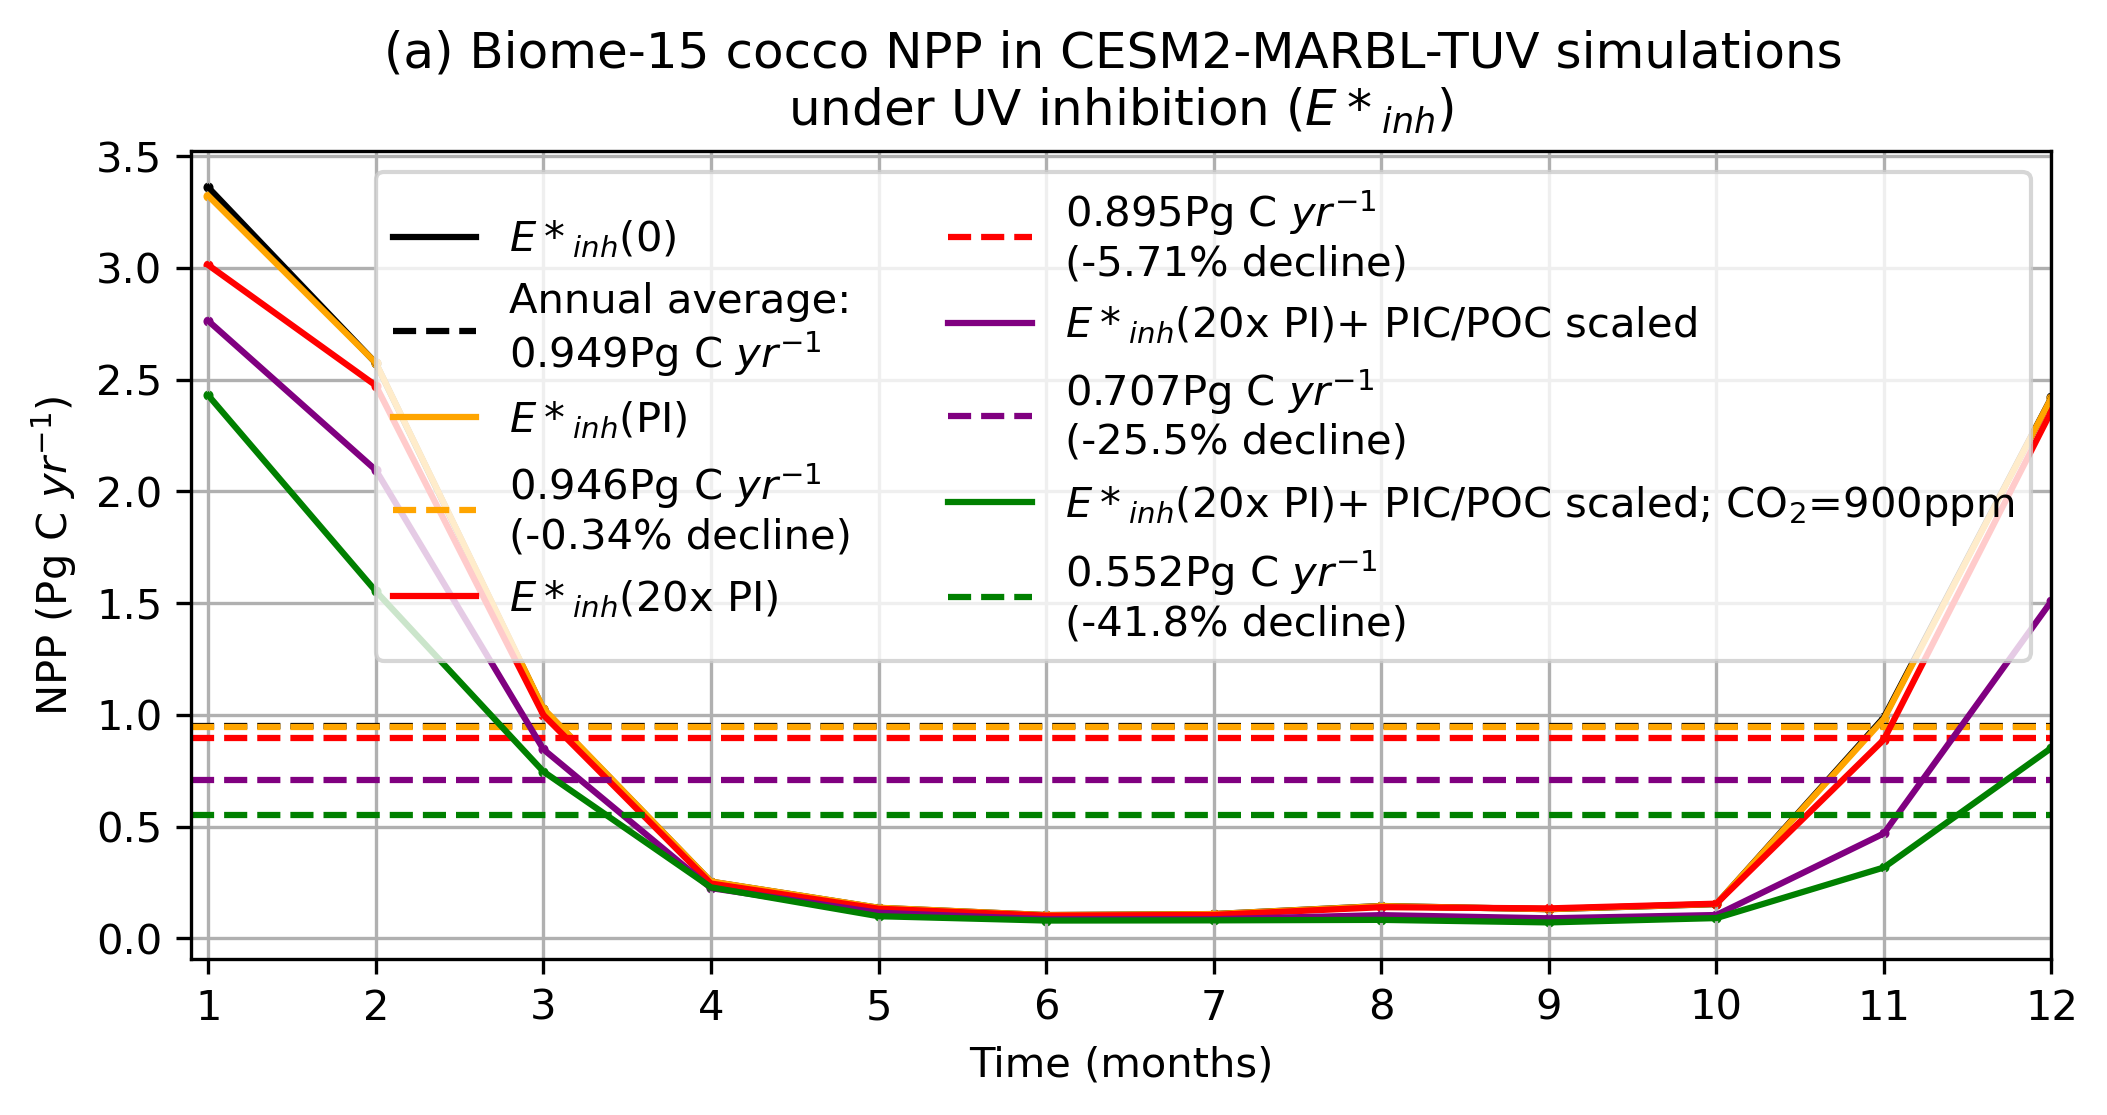

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


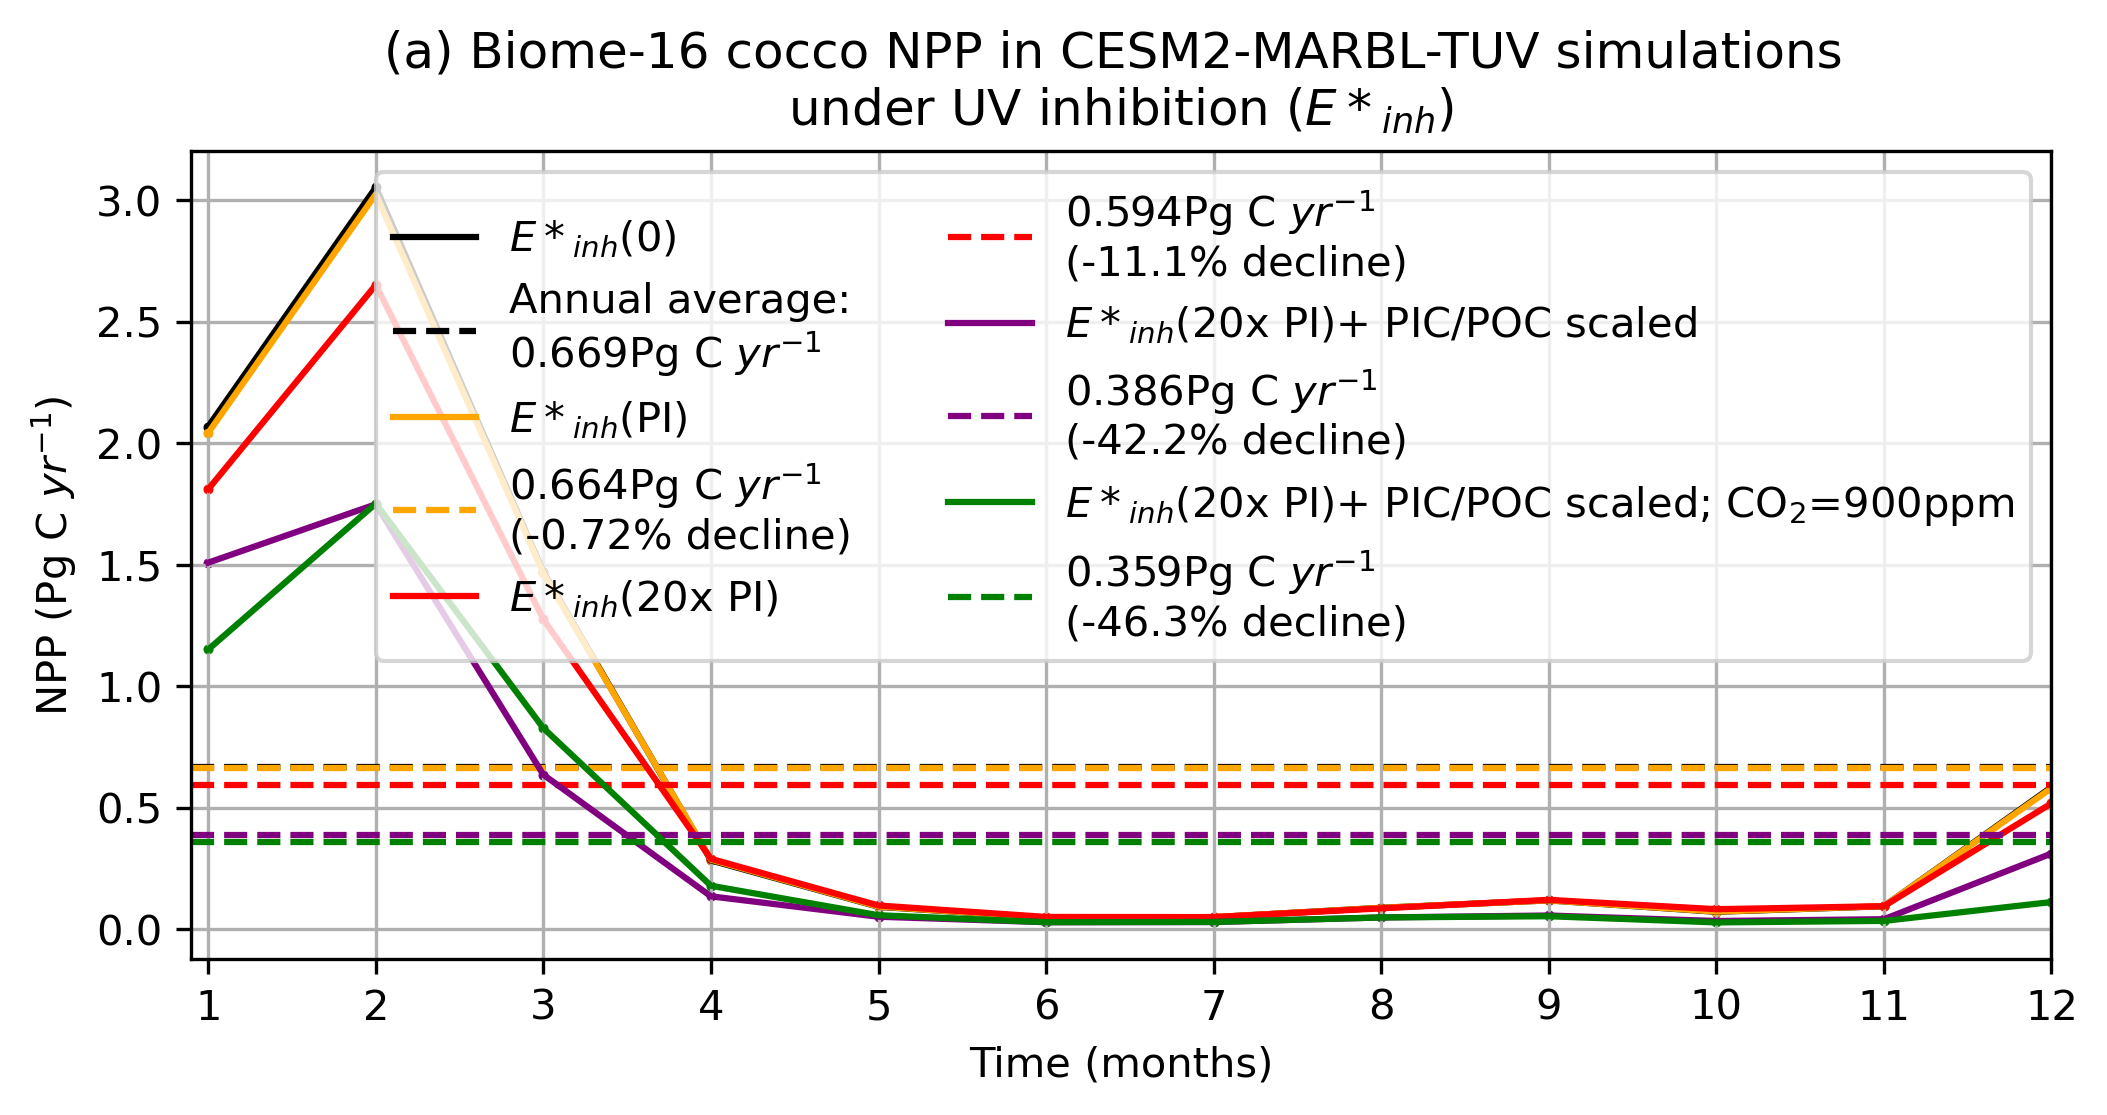

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


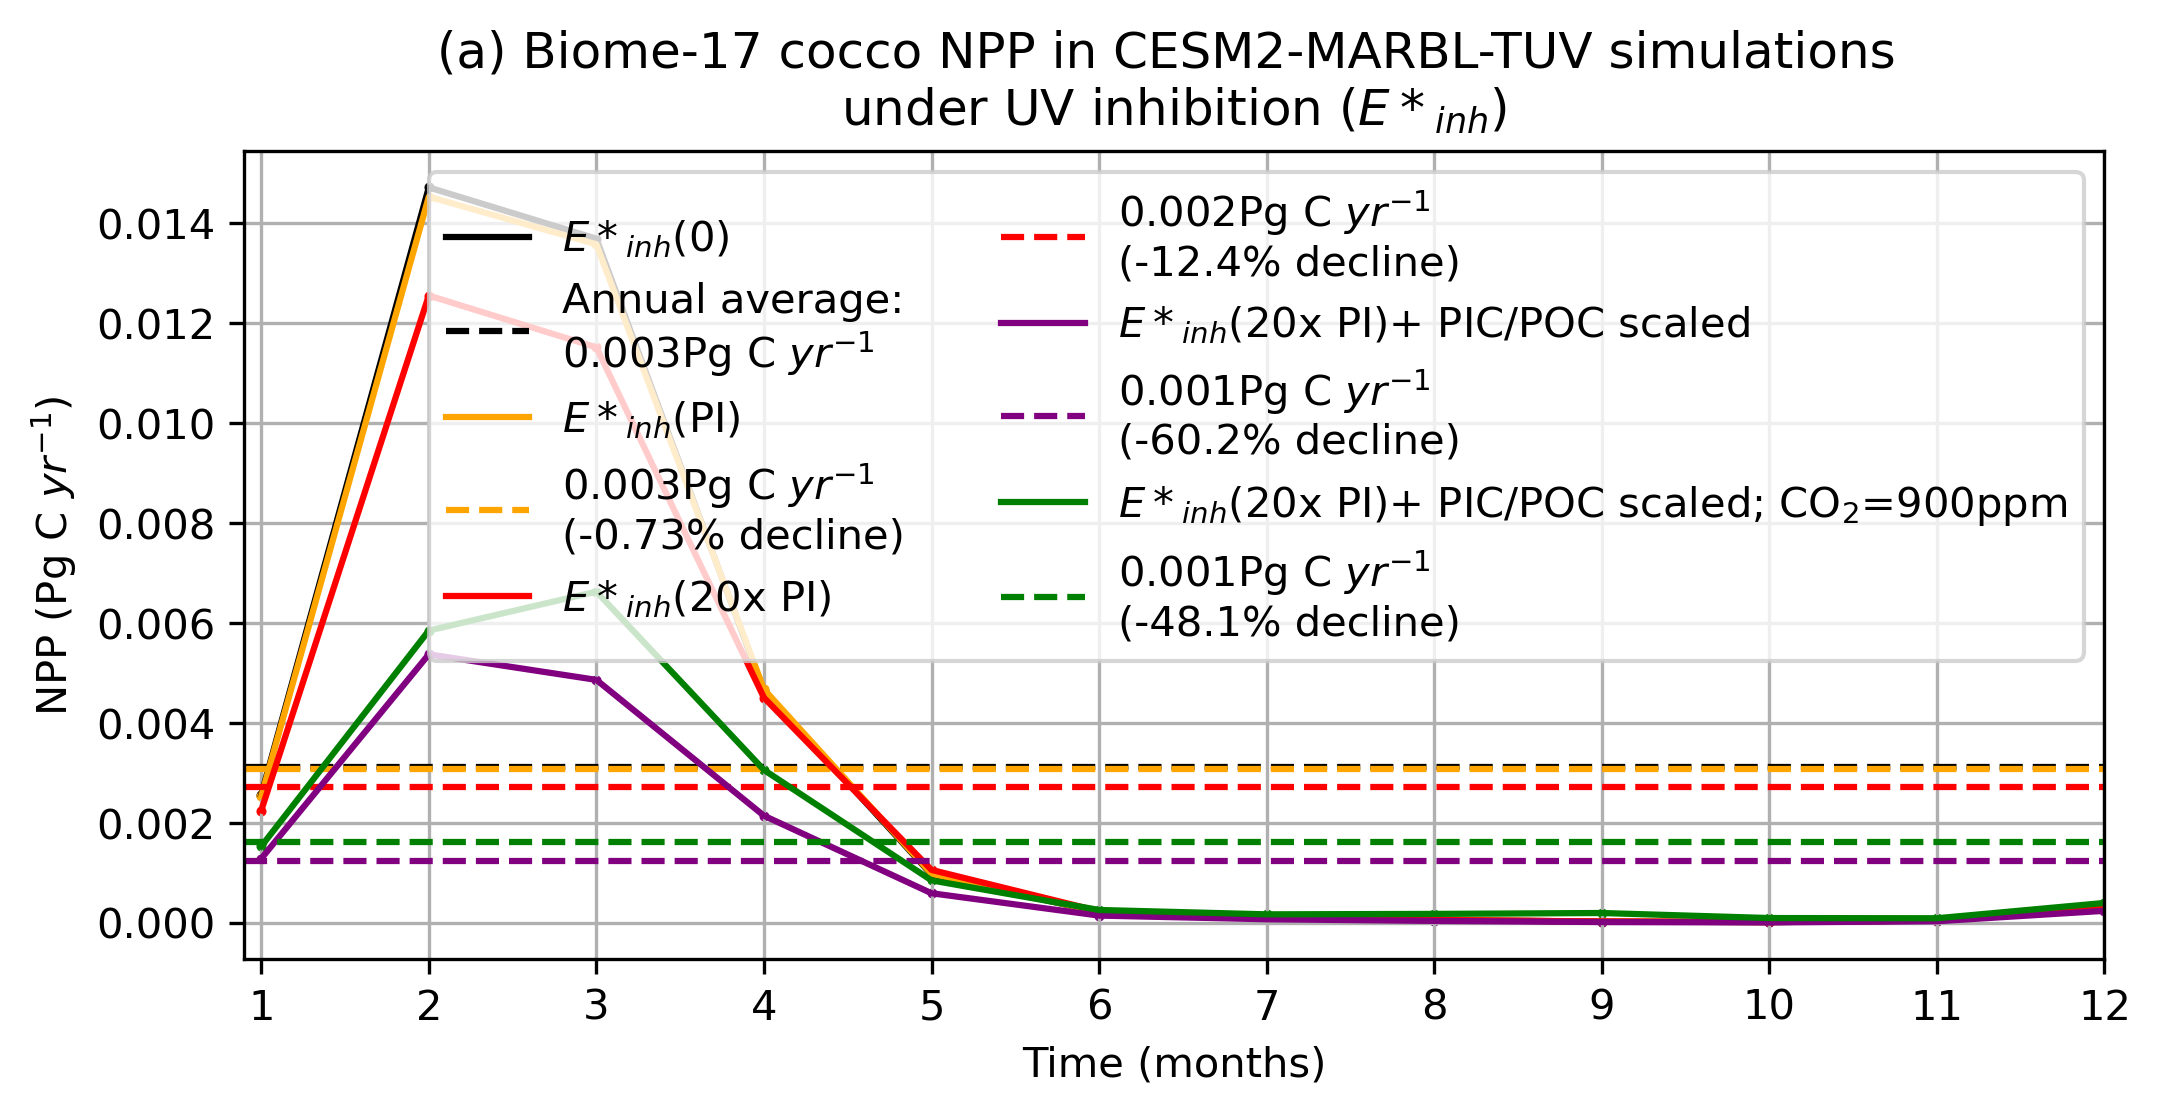

In [83]:

CASES = CASES = [EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z,EINH20x_DATM_CNL_PICPOC04c_4P2Z,EINHX20_DATM_CNL_4P2Z_900PPM]
# calculate cocco NPP
for BIOME_NUMBER in range(14,18):
    extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
    TAREA = extract.variables['TAREA'][:]*(100**-2)
    TAREA_biome = TAREA
    TAREA_biome[meanMask!=BIOME_NUMBER] = 0 # set TAREA equal to 0 outside of the biomes 
    #TAREA_biome[meanMask==BIOME_NUMBER]=1 # set TAREA equal to 1 for everything outside of the biome limits
    #scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
    scale_factor=1e-3*12*1e-15*86400*365*1e-2
    data={}
    for case in CASES:
        var='photoC_cocco_zint'
        data[case]=[]
        print(case)
        if True:
            for fi in files_h0[case][0:12]:
                extract = nc4.Dataset(fi,'r')
                if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                    tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA_biome,axis=2),axis=1)*scale_factor
                for t in range(len(tempdata)):
                    data[case].append(tempdata[t])
    # compare blooms - how are seasonal dynamics being influenced by inhibition of photosynthesis by UV radiation?
    if True:
        plt.figure(figsize=[8,3.5])
        case=EINH0X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(0)'; case_color='k'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        BASELINE= ann_mean
        plt.axhline(ann_mean,color=case_color,linestyle='--',label='Annual average: \n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$')
    
        case=EINHPI_DATM_CNL_4P2Z; case_label='$E*_{inh}$(PI)'; case_color='orange'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')
    
        case=EINH20X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(20x PI)'; case_color='red'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')

        case=EINH20x_DATM_CNL_PICPOC04c_4P2Z; case_label='$E*_{inh}$(20x PI)+ PIC/POC scaled'; case_color='purple'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')

        case=EINHX20_DATM_CNL_4P2Z_900PPM; case_label='$E*_{inh}$(20x PI)+ PIC/POC scaled; CO$_2$=900ppm'; case_color='green'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')
        
        plt.title('(a) Biome-'+str(BIOME_NUMBER)+' cocco NPP in CESM2-MARBL-TUV simulations \nunder UV inhibition ($E*_{inh}$)'); plt.xlabel('Time (months)'); plt.ylabel('NPP (Pg C $yr^{-1}$)')
        props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
        #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
        plt.grid(); #plt.ylim([0,6]); 
        plt.xlim([0.9,12])
        plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
        plt.legend(loc='best',ncol=2); 
        plt.show()


In [4]:
# a supplemental figure 
# analysis of seasonal productivity in different biomes for E*inh=0, E*inh=PI, E*inh = 20x PI

# load in biome mask
# open output file
#extract=nc4.Dataset('/glade/work/olivarez/cant/biomes/Time_Varying_Biomes.nc','r')
extract=nc4.Dataset('/glade/work/jcoupe/misc_files/fay_biomes_POP.nc','r')
meanMask = extract.variables['fay_biomes'][:].T
#mask = maskfile.transpose('lat', 'lon', 'year')
#meanMask = mask.MeanBiomes # use this mask
# biome 14 or 15 appears to be the southern ocean where plentiful coccolithophores exist 
# Cant_14_biome = Cant_2014.where(meanMask == 14)
# load in monthly cocco NPP across biomes for
# 0, pi, 20x pi radiation

# get data

# use these three cases - no PIC/POC scaling
EINHPI_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI'
EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH20X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'

CASES = [EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z]
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
files={}; files_h0={}
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


#OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
#for case in CASES: 
#    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

# add PICPOC scaling only for halogen simulation - because we already verified that PI levels of UV radiation is not having an effect
EINH20x_DATM_CNL_PICPOC04c_4P2Z = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'

CASES = [EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z,EINH20x_DATM_CNL_PICPOC04c_4P2Z]
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
#files={}; files_h0={} 
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

# replace everything above with my new simulations 
EINHPI_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI'
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINH20X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI'

EINH20x_DATM_CNL_PICPOC04c_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'

CASES = [EINH0X_DATM_CNL_4P2Z,EINHPI_DATM_CNL_4P2Z,EINH20X_DATM_CNL_4P2Z,EINH20x_DATM_CNL_PICPOC04c_4P2Z]
OUTPUT_PATH='/glade/derecho/scratch/jcoupe/archive/'
files_h0={}
#files_ocn={}
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))[0:12]


In [ ]:
TAREA_biome[

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI


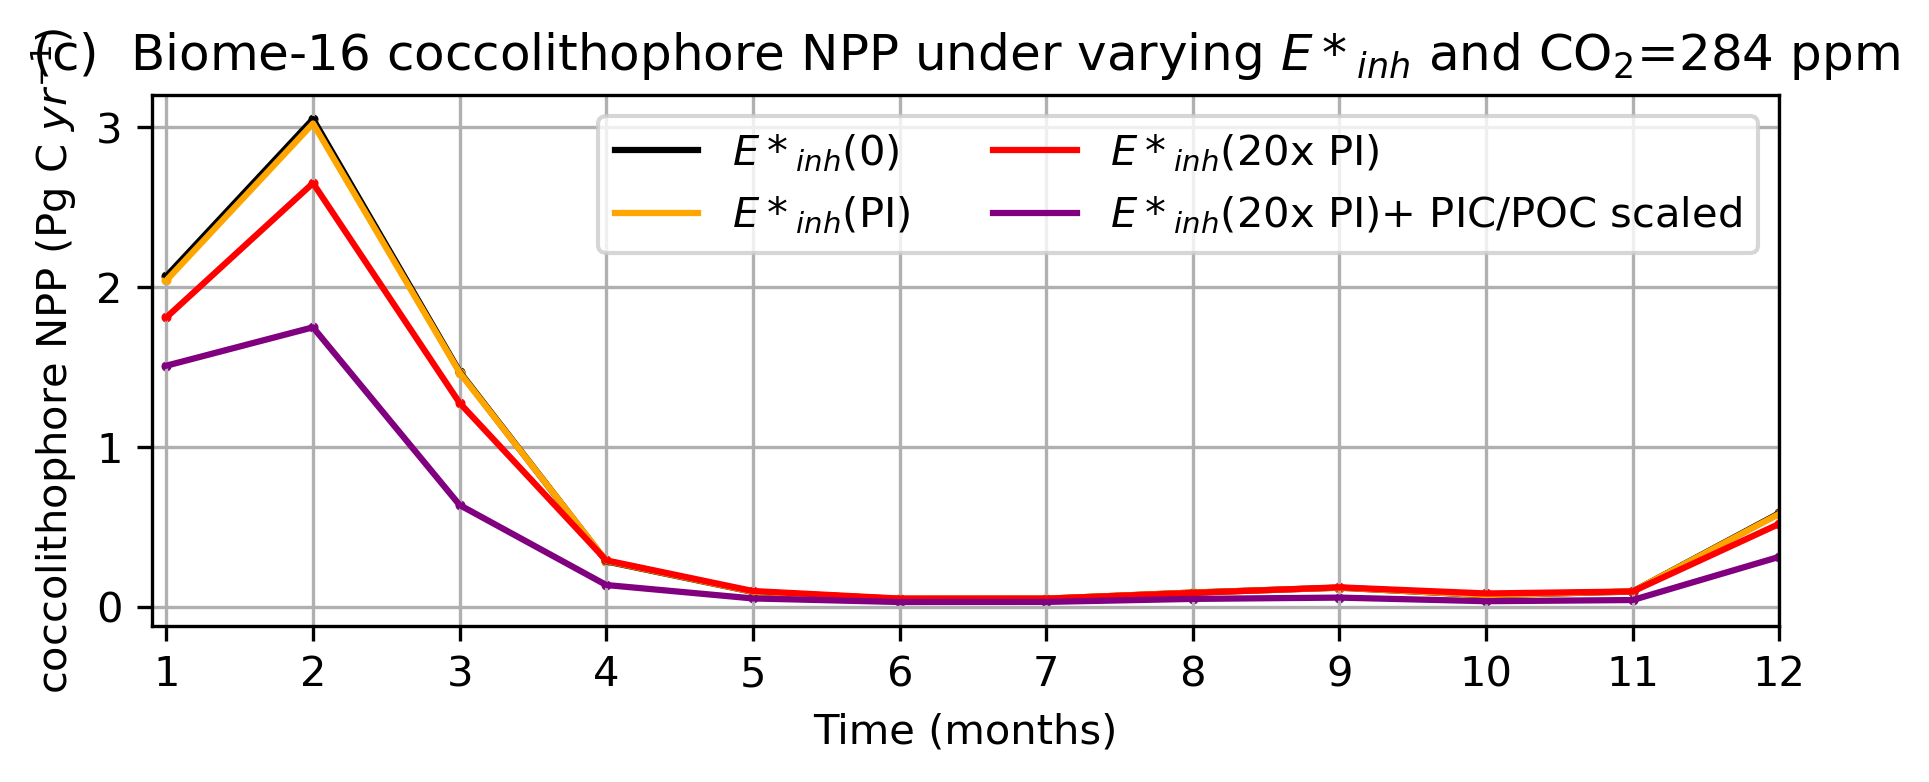

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_EinhPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_noPICPOC_Einh20xPI
CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI


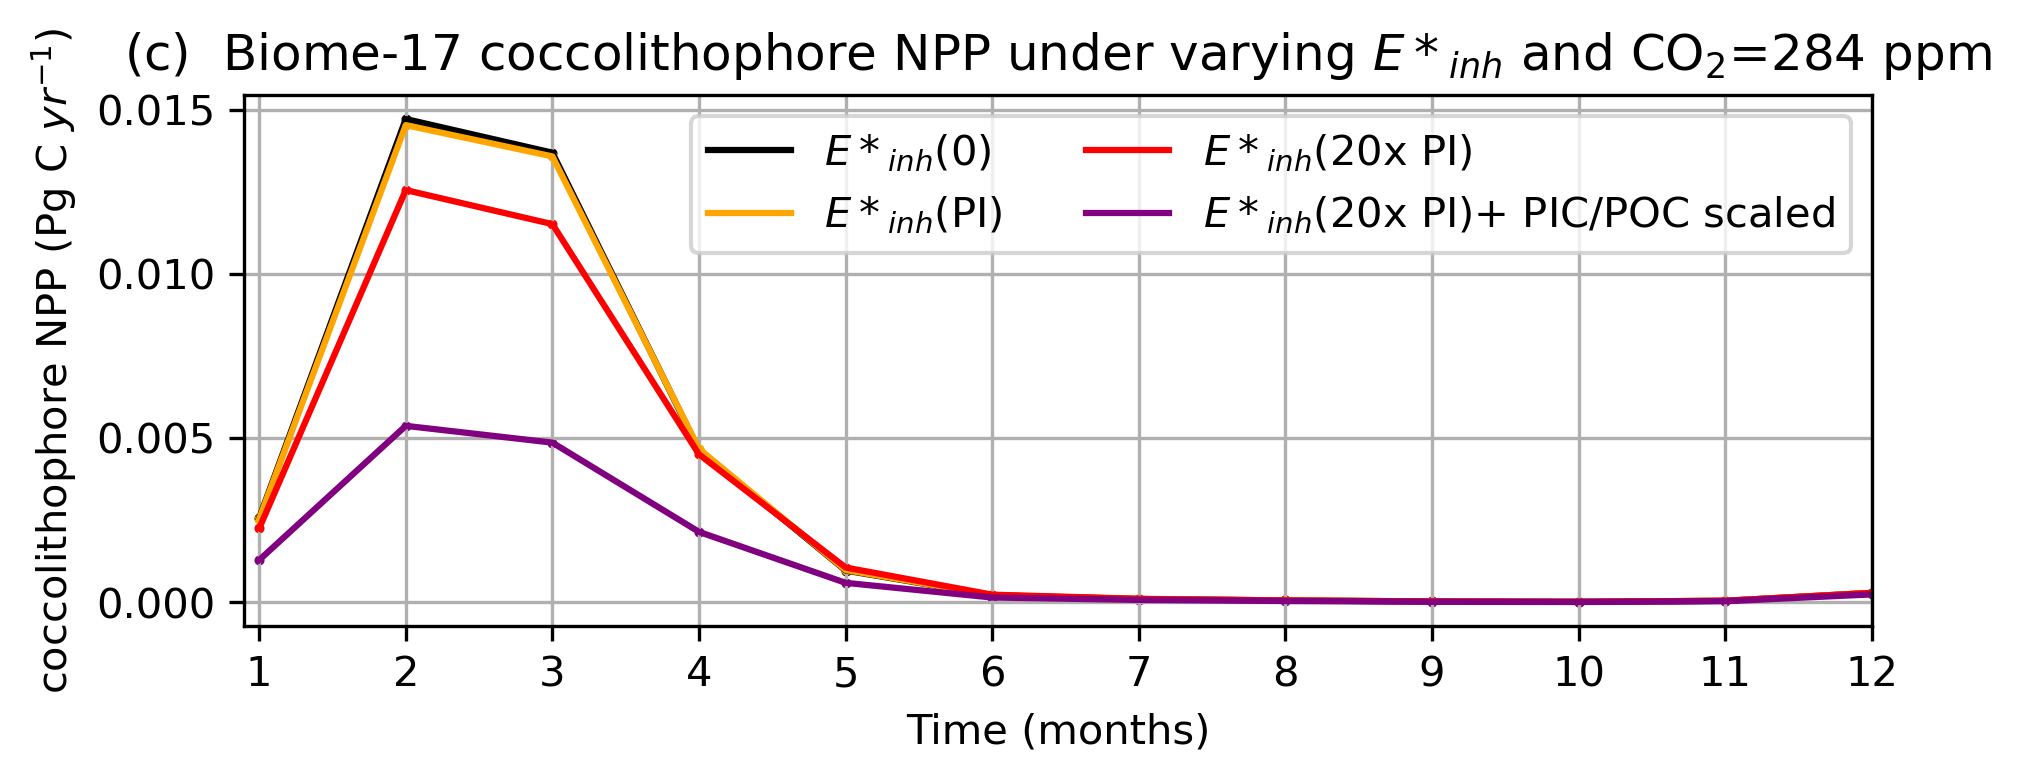

In [25]:
ANNUAL_MEAN_LINES=False
# calculate cocco NPP
for BIOME_NUMBER in range(16,18):
    extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
    TAREA = extract.variables['TAREA'][:]*(100**-2)
    TAREA_biome = TAREA
    TAREA_biome[meanMask!=BIOME_NUMBER] = 0 # set TAREA equal to 0 outside of the biomes 
    #TAREA_biome[meanMask==BIOME_NUMBER]=1 # set TAREA equal to 1 for everything outside of the biome limits
    #scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
    scale_factor=1e-3*12*1e-15*86400*365*1e-2
    data={}
    for case in CASES:
        var='photoC_cocco_zint'
        data[case]=[]
        print(case)
        if True:
            for fi in files_h0[case][0:12]:
                extract = nc4.Dataset(fi,'r')
                if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                    tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA_biome,axis=2),axis=1)*scale_factor
                for t in range(len(tempdata)):
                    data[case].append(tempdata[t])
    # compare blooms - how are seasonal dynamics being influenced by inhibition of photosynthesis by UV radiation?
    if True:
        plt.figure(figsize=[7,2.3])
        case=EINH0X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(0)'; case_color='k'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        BASELINE= ann_mean
        if ANNUAL_MEAN_LINES:
            plt.axhline(ann_mean,color=case_color,linestyle='--',label='Annual average: \n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$')
    
        case=EINHPI_DATM_CNL_4P2Z; case_label='$E*_{inh}$(PI)'; case_color='orange'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        if ANNUAL_MEAN_LINES:
            plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')
    
        case=EINH20X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(20x PI)'; case_color='red'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        if ANNUAL_MEAN_LINES:
            plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')

        case=EINH20x_DATM_CNL_PICPOC04c_4P2Z; case_label='$E*_{inh}$(20x PI)+ PIC/POC scaled'; case_color='purple'
        ts=np.linspace(1,len(data[case][:]),len(data[case][:])); #print(len(ts))
        #ts=[0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30]
        plt.scatter(ts,data[case][:],color=case_color,s=2)
        plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label)
        ann_mean=np.nanmean(data[case][:])
        pct_change = ann_mean - BASELINE
        pct_change = pct_change * (BASELINE**-1)*100.0
        if ANNUAL_MEAN_LINES:
            plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(pct_change)[0:5]+'% decline)')

        case=EINH20x_DATM_CNL_PICPOC04c_4P2Z; case_label='$E*_{inh}$(20x PI)+ PIC/POC scaled'
        plt.title('(c)  Biome-'+str(BIOME_NUMBER)+' coccolithophore NPP under varying $E*_{inh}$ and CO$_2$=284 ppm'); plt.xlabel('Time (months)'); plt.ylabel('coccolithophore NPP (Pg C $yr^{-1}$)')
        props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
        #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
        plt.grid(); #plt.ylim([0,6]); 
        plt.xlim([0.9,12])
        plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
        plt.legend(loc='best',ncol=2); 
        plt.show()


In [ ]:
# put together different CO2 simulations 

In [78]:
EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH0X_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm'  # case still on cheyenne scratch 
EINH0X_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm' 
EINH0X_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm' 
EINH0X_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm'


mkdir /glade/campaign/univ/ucnn0026/UVphyto/
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm/ocn/hist/


mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm/ocn/hist/

mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm/ocn/hist/


EINHPI_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm'  # case still on cheyenne scratch 
EINHPI_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm' 
EINHPI_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm' 
EINHPI_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm'


cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm/ocn/hist/


cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm/ocn/hist/


EINHX20_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
EINHX20_DATM_CNL_4P2Z_600PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm'
EINHX20_DATM_CNL_4P2Z_700PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm'
EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm/ocn/hist/

cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm
mkdir /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm
cd /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm
mkdir ocn
cd ocn
mkdir hist
cp -r /glade/cheyenne/scratch/jcoupe/archive/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm/ocn/hist/


CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
cp -r /glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0/ocn/hist/

CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI
cp -r /glade/derecho/scratch/jcoupe/archive/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI/ocn/hist/* /glade/campaign/univ/ucnn0026/UVphyto/CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI/ocn/hist/




SyntaxError: invalid syntax (3798084363.py, line 9)

In [84]:

CASES=[EINH0X_DATM_CNL_4P2Z,EINHX20_DATM_CNL_4P2Z_284PPM]
OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

    
CASES=[EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM]  # scratch cases 
#OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))


    
CASES=[EINHPI_DATM_CNL_4P2Z_400PPM,EINHPI_DATM_CNL_4P2Z_600PPM,EINHPI_DATM_CNL_4P2Z_700PPM,EINHPI_DATM_CNL_4P2Z_900PPM]
#OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))
    
CASES=[EINHX20_DATM_CNL_4P2Z_400PPM,EINHX20_DATM_CNL_4P2Z_600PPM,EINHX20_DATM_CNL_4P2Z_700PPM,EINHX20_DATM_CNL_4P2Z_900PPM]
#OUTPUT_PATH='/glade/cheyenne/scratch/jcoupe/archive/'
for case in CASES:
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))



In [85]:
# percent change coccolithophore E*inh(20x PI) !!!!

# experiments

EINH0X_DATM_CNL_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0'
EINH0X_DATM_CNL_4P2Z='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0'
EINH0X_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm'  # case still on cheyenne scratch 
EINH0X_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm' 
EINH0X_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm' 
EINH0X_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm'

EINHPI_DATM_CNL_4P2Z_400PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm'  # case still on cheyenne scratch 
EINHPI_DATM_CNL_4P2Z_600PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm' 
EINHPI_DATM_CNL_4P2Z_700PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm' 
EINHPI_DATM_CNL_4P2Z_900PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm'

EINHX20_DATM_CNL_4P2Z_284PPM='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20'
EINHX20_DATM_CNL_4P2Z_284PPM='CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh20xPI'
EINHX20_DATM_CNL_4P2Z_400PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm'
EINHX20_DATM_CNL_4P2Z_600PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm'
EINHX20_DATM_CNL_4P2Z_700PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm'
EINHX20_DATM_CNL_4P2Z_900PPM = 'cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm'


files={}; files_h0={}
CASES=[EINH0X_DATM_CNL_4P2Z,EINHX20_DATM_CNL_4P2Z_284PPM,EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM,EINHPI_DATM_CNL_4P2Z_400PPM,EINHPI_DATM_CNL_4P2Z_600PPM,EINHPI_DATM_CNL_4P2Z_700PPM,EINHPI_DATM_CNL_4P2Z_900PPM,EINHX20_DATM_CNL_4P2Z_400PPM,EINHX20_DATM_CNL_4P2Z_600PPM,EINHX20_DATM_CNL_4P2Z_700PPM,EINHX20_DATM_CNL_4P2Z_900PPM]

OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
for case in CASES:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))



In [86]:
# same plot as above but look at coccoNPP
# calculate NPP
extract = nc4.Dataset(files_h0[EINH0X_DATM_CNL_4P2Z][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)

#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
scale_factor=1e-3*12*1e-15*86400*365*1e-2
data={}
#for case in [EINHPI_DATM_CNL_4P2Z_400PPM]:
CASES=[EINH0X_DATM_CNL_4P2Z,EINH0X_DATM_CNL_4P2Z_400PPM,EINH0X_DATM_CNL_4P2Z_600PPM,EINH0X_DATM_CNL_4P2Z_700PPM,EINH0X_DATM_CNL_4P2Z_900PPM] # BASE 0X cases
CASES.append(EINHPI_DATM_CNL_4P2Z_400PPM) # 400 ppm PI case
CASES.append(EINHX20_DATM_CNL_4P2Z_400PPM) # 400 ppm 20x PI case

CASES.append(EINHPI_DATM_CNL_4P2Z_600PPM) 
CASES.append(EINHX20_DATM_CNL_4P2Z_600PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_700PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_700PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_900PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_900PPM)

for case in CASES:
    var='photoC_cocco_zint'
    data[case]=[]
    print(case)
    if True:
        for fi in files_h0[case]:
            extract = nc4.Dataset(fi,'r')
            if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
                #for var in ['photoC_sp_zint','photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint']:
                #    tempdata = tempdata + np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            else:
                tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #else:
            #    if case ==NW_CNTRL_03:
            #      var='NPP'
            #    if (case==HALOGEN_CASE_3P1Z or case==HALOGEN_ZERO_CASE_3P1Z):
            #      var='photoC_TOT_zint_2'
            #    tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #print(tempdata,' mmol m^-1 cm s^-1')
            for t in range(len(tempdata)):
                data[case].append(tempdata[t])



CESM214_tuvcpl_datm_marbl4p2z_CNL_PICPOC_Einh0
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_600ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_700ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0_900ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_400ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_600ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_600ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_700ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_700ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI_900ppm
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20_900ppm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


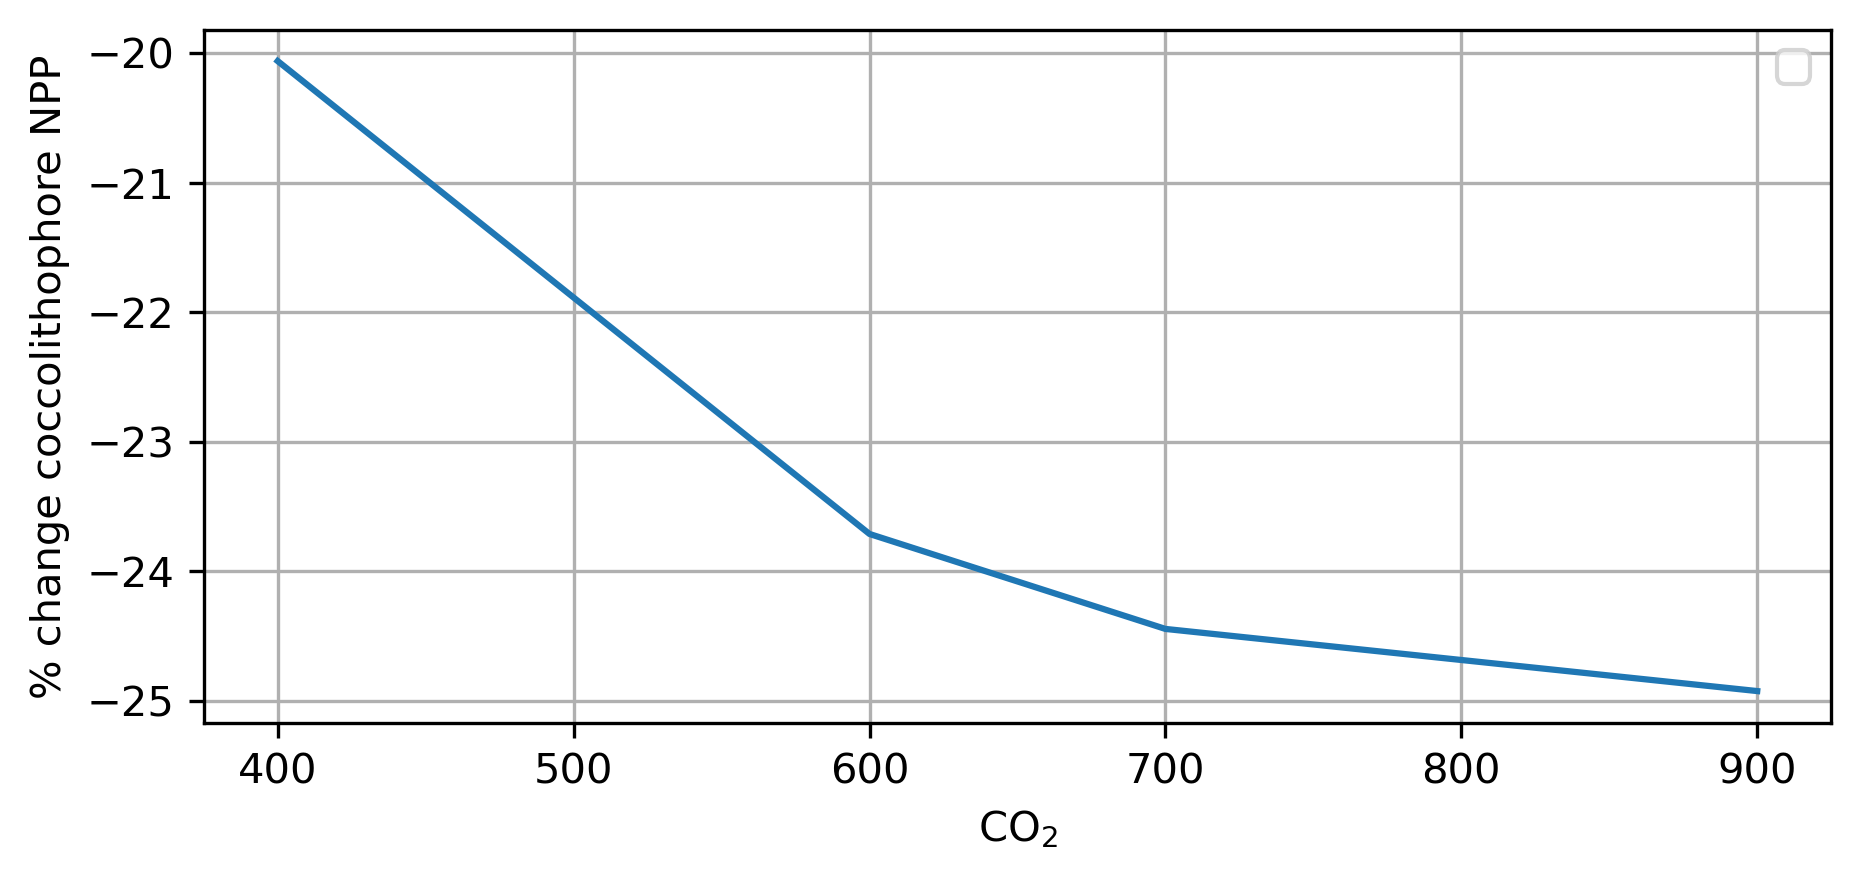

In [87]:
CASES.append(EINHPI_DATM_CNL_4P2Z_400PPM) # 400 ppm PI case
CASES.append(EINHX20_DATM_CNL_4P2Z_400PPM) # 400 ppm 20x PI case

CASES.append(EINHPI_DATM_CNL_4P2Z_600PPM) 
CASES.append(EINHX20_DATM_CNL_4P2Z_600PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_700PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_700PPM)

CASES.append(EINHPI_DATM_CNL_4P2Z_900PPM)
CASES.append(EINHX20_DATM_CNL_4P2Z_900PPM)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
plt.figure(figsize=[7,3])
ANNUAL={}
if True:
    BASELINE = np.array(data[EINHPI_DATM_CNL_4P2Z_400PPM][0:12])
    DATA = np.array(data[EINHX20_DATM_CNL_4P2Z_400PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['400'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='400 ppm')
    
    BASELINE = np.array(data[EINHPI_DATM_CNL_4P2Z_600PPM][0:12])
    DATA = np.array(data[EINHX20_DATM_CNL_4P2Z_600PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['600'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='600 ppm')
        
    BASELINE = np.array(data[EINHPI_DATM_CNL_4P2Z_700PPM][0:12])
    DATA = np.array(data[EINHX20_DATM_CNL_4P2Z_700PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['700'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='700 ppm')

    BASELINE = np.array(data[EINHPI_DATM_CNL_4P2Z_900PPM][0:12])
    DATA = np.array(data[EINHX20_DATM_CNL_4P2Z_900PPM][0:12])
    DATA=DATA-BASELINE; DATA = DATA * BASELINE**-1 * 100
    ANNUAL['900'] = np.nanmean(DATA,axis=0)
    #ts = np.linspace(1,len(DATA),len(DATA))*(1/1)+0
    #plt.plot(ts,DATA,linewidth=0.8,label='900 ppm')

total=[]
ts=[]
for keys in ['400','600','700','900']:
    total.append(ANNUAL[keys])
    ts.append(int(keys))

plt.plot(ts,total)
plt.ylabel('% change coccolithophore NPP')
plt.xlabel('CO$_2$')
#data_rm = running_mean(data,60)
#plt.plot(ts,data_rm,'k',linewidth=1.5,label='decadal mean')
#plt.ylabel('NPP (Pg C yr$^{-1}$'); 
#plt.ylabel('$\Delta$ NPP (% change)')
#plt.xlabel('time (months)') #ts is years but input is monthly data 
#plt.title('Globally integrated coccolithophore $\Delta$NPP: E*$_{inh}$(20)-E*$_{inh}$(PI)\nwith PIC/POC scaling')
#plt.xlim([ts[0],ts[-1]]); #plt.legend(loc='best')
#plt.xlim([ts[0],1.5]) # refine to the first year because we only ran the first 3 months with the updated formulation
#plt.xlim([ts[0],ts[-1]])
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
plt.grid()

plt.legend(loc='best',ncol=2)

In [76]:
#CASE 4: E*INH(PI) PIC/POC SCALING ON CHEYENNE
EINHPI_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI'
#CASE 5: E*INH(20X PI) PIC/POC SCALING ON CHEYENNE
EINH20x_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'
CASES_CAMPAIGN=[EINHPI_DATM_CNL_PICPOC04c_4P2Z,EINH20x_DATM_CNL_PICPOC04c_4P2Z]

OUTPUT_PATH='/glade/campaign/univ/ucnn0026/UVphyto/'
#files={}; files_h0={}
for case in CASES_CAMPAIGN:
    #files[case] = sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.ecosys.nday1.*.nc'))
    files_h0[case]=sorted(glob.glob(OUTPUT_PATH+case+'/ocn/hist/'+case+'.pop.h.0*.nc'))

In [77]:
# generate the above figure but with coccos
# calculate NPP

# use PIC/POC scaling cases instead ????
#CASE 4: E*INH(PI) PIC/POC SCALING ON CHEYENNE
EINHPI_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI'
#CASE 5: E*INH(20X PI) PIC/POC SCALING ON CHEYENNE
EINH20x_DATM_CNL_PICPOC04c_4P2Z='cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20'


extract = nc4.Dataset(files_h0[CASES[0]][0],'r')
TAREA = extract.variables['TAREA'][:]*(100**-2)

#scale_factor=86400.0*12.0*(1/1000.0)*(1/100.0)*(1e-15)*365
scale_factor=1e-3*12*1e-15*86400*365*1e-2
data={}
for case in CASES+CASES_CAMPAIGN:
    var='photoC_cocco_zint'
    data[case]=[]
    print(case)
    if True:
        for fi in files_h0[case]:
            extract = nc4.Dataset(fi,'r')
            if True:#case in [CONTROL_4P2Z,EINH_4P2Z,HALOGEN_CASE_4P2Z]: # assume all have coccolithophores 
                tempdata=np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
                #for var in ['photoC_sp_zint','photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint']:
                #    tempdata = tempdata + np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            else:
                tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #else:
            #    if case ==NW_CNTRL_03:
            #      var='NPP'
            #    if (case==HALOGEN_CASE_3P1Z or case==HALOGEN_ZERO_CASE_3P1Z):
            #      var='photoC_TOT_zint_2'
            #    tempdata = np.nansum(np.nansum(extract.variables[var][:]*TAREA,axis=2),axis=1)*scale_factor
            #print(tempdata,' mmol m^-1 cm s^-1')
            for t in range(len(tempdata)):
                data[case].append(tempdata[t])


cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einh0
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_EinhPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzo_Einhx20
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_EinhPI
cw4_nw_cntrl_tuvcpl_datm_4p2z_CullenNealeLorenzoPICPOC04c_Einhx20


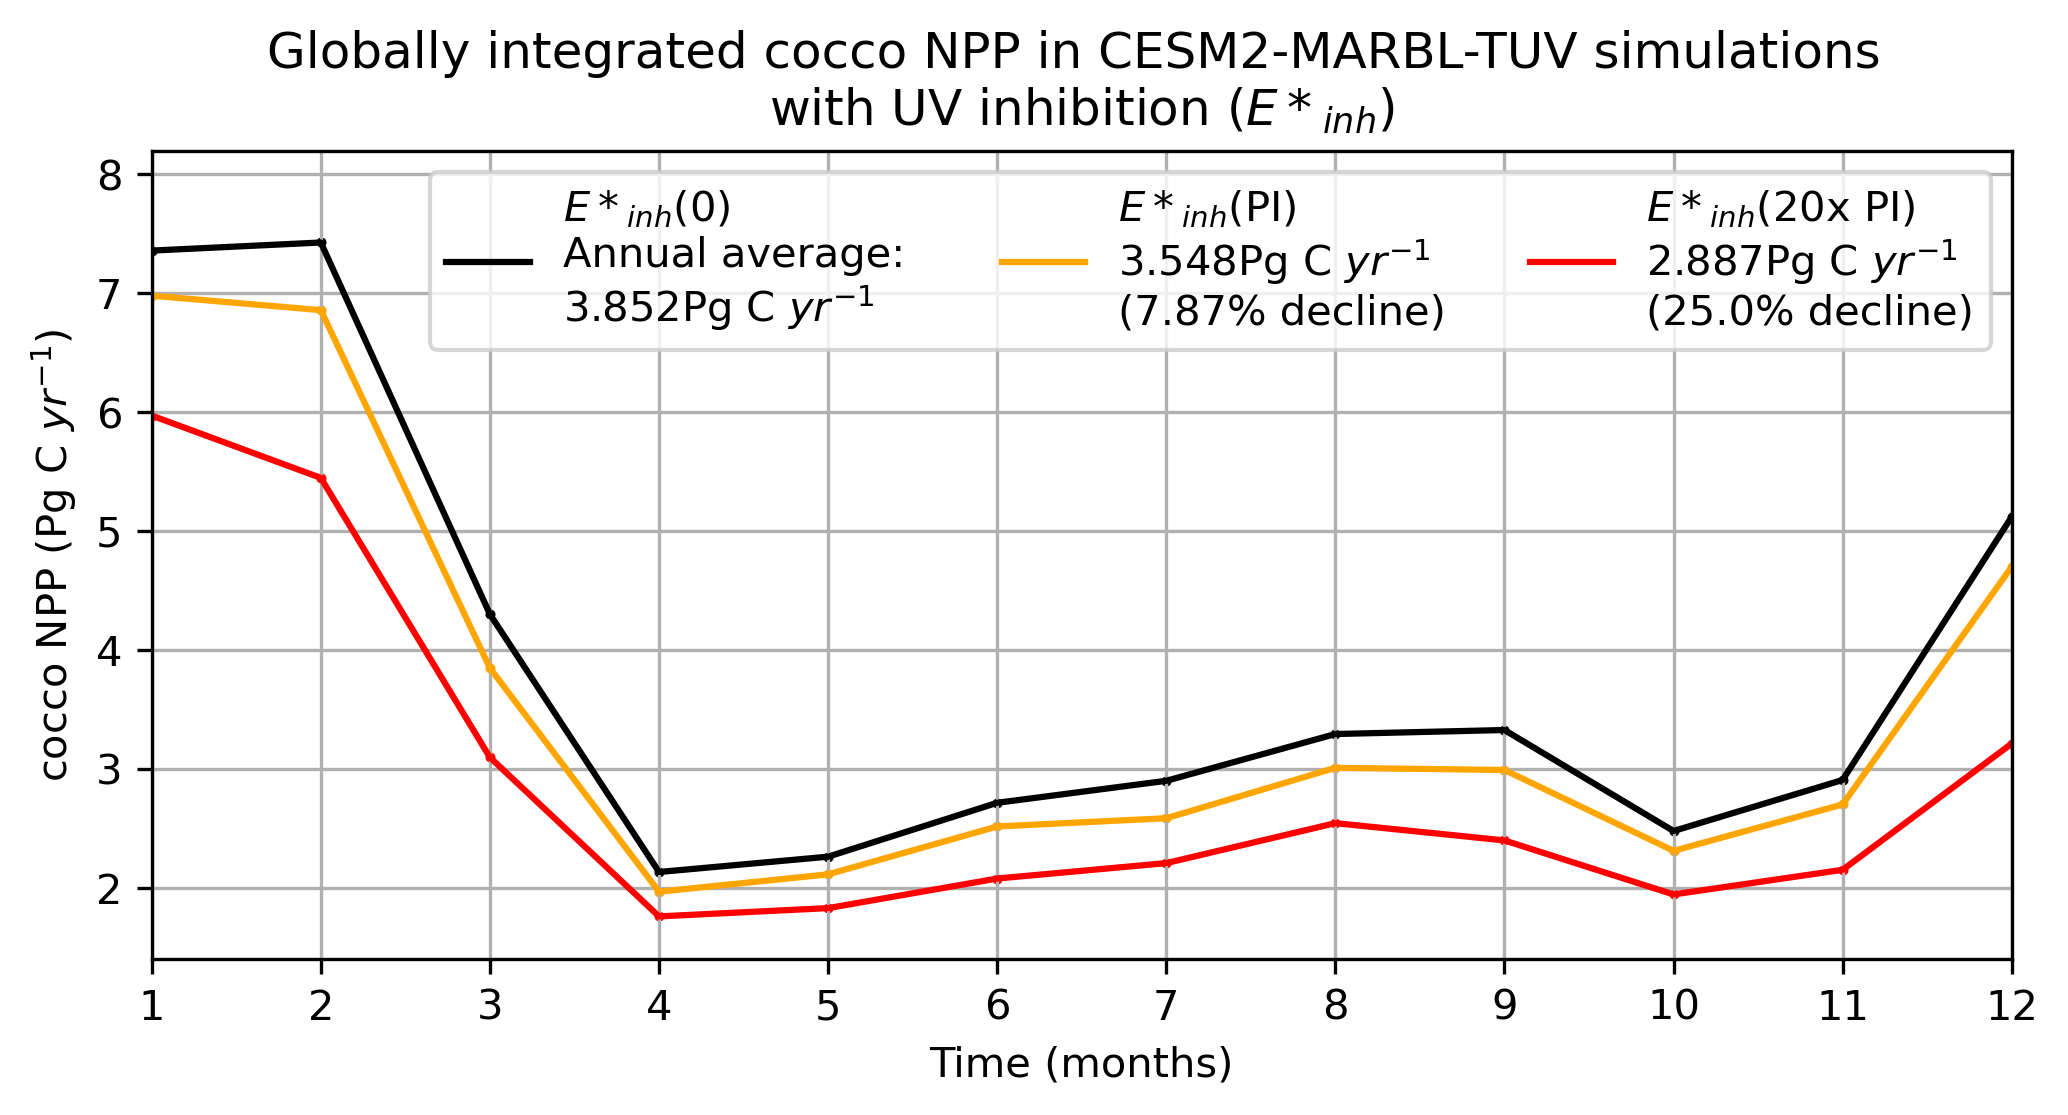

In [55]:

if True:
    plt.figure(figsize=[8,3.5])
    case=EINH0X_DATM_CNL_4P2Z; case_label='$E*_{inh}$(0)'; case_color='k'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); 
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    ann_mean=np.nanmean(data[case][0:12])
    plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label+'\nAnnual average: \n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$')
    BASELINE = ann_mean
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--',label='Annual average: \n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$')
    
    case=EINHPI_DATM_CNL_4P2Z; 
    case=EINHPI_DATM_CNL_PICPOC04c_4P2Z; case_label='$E*_{inh}$(PI)'; case_color='orange'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); 
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    ann_mean=np.nanmean(data[case][0:12])
    PCT_CHANGE = BASELINE - ann_mean; PCT_CHANGE = abs(PCT_CHANGE * BASELINE**-1 * 100)
    plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label+'\n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(PCT_CHANGE)[0:4]+'% decline)')
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n(0.4% decline)')
    
    case=EINH20X_DATM_CNL_4P2Z; 
    case=EINH20x_DATM_CNL_PICPOC04c_4P2Z; case_label='$E*_{inh}$(20x PI)'; case_color='red'
    ts=np.linspace(1,len(data[case][:]),len(data[case][:])); 
    ann_mean=np.nanmean(data[case][0:12])
    PCT_CHANGE = BASELINE - ann_mean; PCT_CHANGE = abs(PCT_CHANGE * BASELINE**-1 * 100)
    plt.scatter(ts,data[case][:],color=case_color,s=2)
    plt.plot(ts,data[case][:],case_color,linestyle='-',label=case_label+'\n'+str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n('+str(PCT_CHANGE)[0:4]+'% decline)')
    #ann_mean=np.nanmean(data[case][:])
    #plt.axhline(ann_mean,color=case_color,linestyle='--',label=str(ann_mean)[0:5]+'Pg C $yr^{-1}$\n(8.6% decline)')

    plt.title('Globally integrated cocco NPP in CESM2-MARBL-TUV simulations \nwith UV inhibition ($E*_{inh}$)'); plt.xlabel('Time (months)'); plt.ylabel('cocco NPP (Pg C $yr^{-1}$)')
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    #ax.text(0.53,0.65,'UV inhibition\n     added',fontsize=14,verticalalignment='top',bbox=props)
    plt.grid(); plt.ylim([1.4,8.2]); plt.xlim([1,12])
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],('1','2','3','4','5','6','7','8','9','10','11','12'))
    plt.legend(loc='upper right',ncol=3); 
    plt.show()

In [ ]:
# figure showing that we have settled on a PIC/POC scaling method 